# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from pandas.plotting import autocorrelation_plot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6

In [2]:
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [3]:
data_dir = 'data' # 'data/Volcano'
_files = os.listdir(data_dir)
_files

['.DS_Store',
 'datapoints.csv',
 'datatypes.csv',
 'nodes.csv',
 'sensors.csv',
 'volcanos.csv']

In [4]:
# Import all csv data
df_datapoints = pd.read_csv('data/datapoints.csv', sep=',')
df_datatypes = pd.read_csv('data/datatypes.csv', sep=',')
df_sensors = pd.read_csv('data/sensors.csv', sep=',')
df_nodes = pd.read_csv('data/nodes.csv', sep=',')
df_volcanos = pd.read_csv('data/volcanos.csv', sep=',')

##### Exploratory Data Analysis

In [5]:
print(df_datapoints.shape)
df_datapoints.rename(columns = {'id': 'data_point_id'}, inplace=True)
df_datapoints.head(10)

(176534, 4)


data_point_id      value               timestamp  \
0  764c5e60-8679-11e6-a353-2f6c041e2491     98.000  2016-08-03 04:39:25+00   
1  764c5e61-8679-11e6-a353-2f6c041e2491     33.198  2016-08-03 04:39:25+00   
2  764dbdf0-8679-11e6-a353-2f6c041e2491     29.300  2016-08-03 04:39:25+00   
3  764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110  2016-08-03 04:39:25+00   
4  764dbdf2-8679-11e6-a353-2f6c041e2491    459.736  2016-08-03 04:39:25+00   
5  76507d10-8679-11e6-a353-2f6c041e2491     64.900  2016-08-03 04:39:25+00   
6  76514060-8679-11e6-a353-2f6c041e2491     29.940  2016-08-03 04:47:41+00   
7  76514061-8679-11e6-a353-2f6c041e2491    459.344  2016-08-03 04:47:41+00   
8  76514062-8679-11e6-a353-2f6c041e2491      3.922  2016-08-03 04:47:41+00   
9  765251d0-8679-11e6-a353-2f6c041e2491     98.000  2016-08-03 04:47:41+00   

                              sensor_id  
0  7635c920-8679-11e6-a353-2f6c041e2491  
1  763b9580-8679-11e6-a353-2f6c041e2491  
2  763ca6f0-8679-11e6-a353-2f6c041e2491  
3  763d9150-8679-11e6-a353-2f6c041e2491  
4  763701a1-8679-11e6-a353-2f6c041e2491  
5  764161e0-8679-11e6-a353-2f6c041e2491  
6  763ca6f0-8679-11e6-a353-2f6c041e2491  
7  763701a1-8679-11e6-a353-2f6c041e2491  
8  763b9580-8679-11e6-a353-2f6c041e2491  
9  7635c920-8679-11e6-a353-2f6c041e2491

In [6]:
print(df_datatypes.shape)
df_datatypes.rename(columns = {'id': 'data_type_id'}, inplace=True)
df_datatypes.head(10)

(7, 4)


data_type_id                            type  \
0  35dcb3c0-8679-11e6-bda3-ef77801087ee                     temperature   
1  35dcb3c1-8679-11e6-bda3-ef77801087ee                        pressure   
2  35dcb3c2-8679-11e6-bda3-ef77801087ee                        humidity   
3  35dcdad0-8679-11e6-bda3-ef77801087ee    carbon dioxide concentration   
4  35dcdad1-8679-11e6-bda3-ef77801087ee  hydrogen sulfide concentration   
5  35dcdad2-8679-11e6-bda3-ef77801087ee                         battery   
6  ed5edee0-e701-11e6-83c1-01ce06e6d17f                            RSAM   

             si_unit type_id  
0            celcius     TCA  
1             pascal      PA  
2  relative humidity    HUMA  
3                ppm  GP_CO2  
4                ppm  GP_H2S  
5         percentage     BAT  
6             counts    RSAM

In [7]:
print(df_sensors.shape)
df_sensors.rename(columns = {'id': 'sensor_id'}, inplace=True)
df_sensors.head(10)

(61, 8)


sensor_id description  data_frequency   status  \
0  c15a6370-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1  7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
2  763b9580-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
3  763ca6f0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
4  763d9150-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
5  7636da90-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
6  76413ad0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
7  764161e0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
8  c5e685d0-867a-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
9  c5e9ba20-867a-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   

               created_at                  updated_at  \
0  2016-08-07 00:51:40+00  2016-09-29 19:41:07.066+00   
1  2016-08-03 04:39:25+00  2016-09-29 20:13:52.793+00   
2  2016-08-03 04:39:25+00  2016-09-29 20:13:52.797+00   
3  2016-08-03 04:39:25+00  2016-09-29 20:13:52.803+00   
4  2016-08-03 04:39:25+00  2016-09-29 20:13:52.811+00   
5  2016-08-03 21:50:32+00  2016-09-30 18:12:04.577+00   
6  2016-08-03 22:09:40+00  2016-09-29 20:13:52.818+00   
7  2016-08-03 04:39:25+00   2016-09-29 20:13:52.82+00   
8  2016-08-17 01:06:49+00  2016-09-29 20:13:52.822+00   
9  2016-08-17 01:06:49+00  2016-09-29 20:13:52.824+00   

                           data_type_id                               node_id  
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491  
1  35dcdad2-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
2  35dcdad1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
3  35dcb3c0-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
4  35dcb3c1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
5  35dcdad0-8679-11e6-bda3-ef77801087ee  762c5340-8679-11e6-a353-2f6c041e2491  
6  35dcdad2-8679-11e6-bda3-ef77801087ee  76309900-8679-11e6-a353-2f6c041e2491  
7  35dcb3c2-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
8  35dcdad2-8679-11e6-bda3-ef77801087ee  c5e39fa0-867a-11e6-a353-2f6c041e2491  
9  35dcb3c2-8679-11e6-bda3-ef77801087ee  c5e39fa0-867a-11e6-a353-2f6c041e2491

In [8]:
print(df_nodes.shape)
df_nodes.rename(columns = {'id': 'node_id'}, inplace=True)
df_nodes.head(10)

(11, 8)


node_id  name description location   status  \
0  c5e39fa0-867a-11e6-a353-2f6c041e2491    N1          \N       \N  OFFLINE   
1  c147ece0-8679-11e6-a353-2f6c041e2491    N9          \N       \N  OFFLINE   
2  76309900-8679-11e6-a353-2f6c041e2491    N8          \N       \N  OFFLINE   
3  762b8ff0-8679-11e6-a353-2f6c041e2491   N10          \N       \N  OFFLINE   
4  c14ccee0-8679-11e6-a353-2f6c041e2491    N2          \N       \N  OFFLINE   
5  d3cbc350-8679-11e6-a353-2f6c041e2491    N3          \N       \N  OFFLINE   
6  762c5340-8679-11e6-a353-2f6c041e2491    N7          \N       \N  OFFLINE   
7  d3ca3cb0-8679-11e6-a353-2f6c041e2491    N4          \N       \N  OFFLINE   
8  d3cb7530-8679-11e6-a353-2f6c041e2491    N5          \N       \N  OFFLINE   
9  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM          \N       \N  OFFLINE   

                   created_at                  updated_at  \
0      2016-08-17 01:06:49+00  2016-09-29 19:28:05.932+00   
1      2016-08-07 00:51:40+00  2016-09-29 19:41:07.065+00   
2      2016-08-03 22:09:40+00  2016-09-29 19:20:17.417+00   
3      2016-08-03 04:39:25+00  2016-09-29 19:20:17.431+00   
4      2016-08-10 04:20:22+00  2016-09-29 19:20:17.523+00   
5      2016-08-15 06:10:39+00  2016-10-05 12:42:18.953+00   
6      2016-08-03 21:50:32+00  2016-10-07 07:43:05.001+00   
7      2016-08-15 05:22:31+00  2016-10-07 07:43:05.001+00   
8      2016-08-15 05:31:29+00  2016-10-07 07:43:05.002+00   
9  1970-01-17 23:35:31.231+00  2017-01-30 16:24:05.867+00   

                             volcano_id  
0  35dc3e90-8679-11e6-bda3-ef77801087ee  
1  35dc3e90-8679-11e6-bda3-ef77801087ee  
2  35dc3e90-8679-11e6-bda3-ef77801087ee  
3  35dc3e90-8679-11e6-bda3-ef77801087ee  
4  35dc3e90-8679-11e6-bda3-ef77801087ee  
5  35dc3e90-8679-11e6-bda3-ef77801087ee  
6  35dc3e90-8679-11e6-bda3-ef77801087ee  
7  35dc3e90-8679-11e6-bda3-ef77801087ee  
8  35dc3e90-8679-11e6-bda3-ef77801087ee  
9  35dc3e90-8679-11e6-bda3-ef77801087ee

In [9]:
print(df_volcanos.shape)
df_volcanos.rename(columns = {'id': 'volcano_id'}, inplace=True)
df_volcanos.head(10)

(1, 7)


volcano_id    name  \
0  35dc3e90-8679-11e6-bda3-ef77801087ee  Masaya   

                                         description  \
0  This is the world's biggest, baddest, most evi...   

                                   location   status  \
0  {11.985318299999999,-86.178342900000004}  OFFLINE   

                   created_at                  updated_at  
0  2016-09-29 19:16:23.419+00  2016-10-07 07:43:05.015+00

##### Convert all Data frame time stamps into date-time format

In [10]:
# Convert timestamp to datetime in datapoints data
df_datapoints['timestamp'] = pd.to_datetime(df_datapoints['timestamp'])

# Convert created_at and updated_at to datetime in sensors data
df_sensors['created_at'] = pd.to_datetime(df_sensors['created_at'])
df_sensors['updated_at'] = pd.to_datetime(df_sensors['updated_at'])

# Convert created_at and updated_at to datetime in nodes data
df_nodes['created_at'] = pd.to_datetime(df_nodes['created_at'])
df_nodes['updated_at'] = pd.to_datetime(df_nodes['updated_at'])

# Convert created_at and updated_at to datetime in volcano data
df_volcanos['created_at'] = pd.to_datetime(df_volcanos['created_at'])
df_volcanos['updated_at'] = pd.to_datetime(df_volcanos['updated_at'])

In [11]:
# Let us check the columns type of datapoints:
df_datapoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176534 entries, 0 to 176533
Data columns (total 4 columns):
data_point_id    176534 non-null object
value            63456 non-null float64
timestamp        176534 non-null datetime64[ns, UTC]
sensor_id        176534 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 5.4+ MB


In [12]:
# Let us check the columns type of datatypes:
df_datatypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
data_type_id    7 non-null object
type            7 non-null object
si_unit         7 non-null object
type_id         7 non-null object
dtypes: object(4)
memory usage: 352.0+ bytes


In [13]:
# Let us check the columns type of sensors:
df_sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
sensor_id         61 non-null object
description       61 non-null object
data_frequency    61 non-null int64
status            61 non-null object
created_at        61 non-null datetime64[ns, UTC]
updated_at        61 non-null datetime64[ns, UTC]
data_type_id      61 non-null object
node_id           61 non-null object
dtypes: datetime64[ns, UTC](2), int64(1), object(5)
memory usage: 3.9+ KB


In [14]:
# Let us check the columns type of nodes:
df_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
node_id        11 non-null object
name           11 non-null object
description    11 non-null object
location       11 non-null object
status         11 non-null object
created_at     11 non-null datetime64[ns, UTC]
updated_at     11 non-null datetime64[ns, UTC]
volcano_id     11 non-null object
dtypes: datetime64[ns, UTC](2), object(6)
memory usage: 832.0+ bytes


In [15]:
# Let us check the columns type of volcanos:
df_volcanos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
volcano_id     1 non-null object
name           1 non-null object
description    1 non-null object
location       1 non-null object
status         1 non-null object
created_at     1 non-null datetime64[ns, UTC]
updated_at     1 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), object(5)
memory usage: 184.0+ bytes


In [16]:
# Let us count the number of different sensor:
df_datapoints['sensor_id'].nunique()

61

In [17]:
df_datapoints['sensor_id'].unique()

array(['7635c920-8679-11e6-a353-2f6c041e2491',
       '763b9580-8679-11e6-a353-2f6c041e2491',
       '763ca6f0-8679-11e6-a353-2f6c041e2491',
       '763d9150-8679-11e6-a353-2f6c041e2491',
       '763701a1-8679-11e6-a353-2f6c041e2491',
       '764161e0-8679-11e6-a353-2f6c041e2491',
       '7635f030-8679-11e6-a353-2f6c041e2491',
       '763d6a40-8679-11e6-a353-2f6c041e2491',
       '763701a0-8679-11e6-a353-2f6c041e2491',
       '7636da90-8679-11e6-a353-2f6c041e2491',
       '763bbc90-8679-11e6-a353-2f6c041e2491',
       '76402960-8679-11e6-a353-2f6c041e2491',
       '76413ad0-8679-11e6-a353-2f6c041e2491',
       '7644bd40-8679-11e6-a353-2f6c041e2491',
       '76427350-8679-11e6-a353-2f6c041e2491',
       '76427351-8679-11e6-a353-2f6c041e2491',
       '7645ceb0-8679-11e6-a353-2f6c041e2491',
       '7645ceb1-8679-11e6-a353-2f6c041e2491',
       'c159c730-8679-11e6-a353-2f6c041e2491',
       'c15c5f40-8679-11e6-a353-2f6c041e2491',
       'c15fbaa0-8679-11e6-a353-2f6c041e2491',
       'c15a6

### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Store each one in a separate file.

**What (if anything) can we tell about the various sensors from the plots?**


1. There are sensors with no data that might be because it is not functioning. 
2. There is another sensor with fixed data for a long period of time and then no data. That might because it was not functioning well, and then it has stopped working. 
3. There are sensors that shows values evolution for a duration and then has stopped working and has restarted again: That might be justified saying that the sensor has been broken down and then been repaired or has been submitted to a maintenance programme.
4. Some sensors show the peak value in data that they have delivered. This might be outliers.
5. Some sensors show that data has been delivered at a periodic frequency. This might be in the ideal condition because in those same sensors, we can notice at certain point of time that values are stable. 

In [18]:
#Group datapoints by sensor_id
group_df_datapoint = df_datapoints.groupby('sensor_id')
group_df_datapoint.first()

data_point_id  \
sensor_id                                                                    
1248ff60-e707-11e6-89c8-314aa4f67f8c  12ac7c20-e707-11e6-89c8-314aa4f67f8c   
7635c920-8679-11e6-a353-2f6c041e2491  764c5e60-8679-11e6-a353-2f6c041e2491   
7635f030-8679-11e6-a353-2f6c041e2491  76676070-8679-11e6-a353-2f6c041e2491   
7636da90-8679-11e6-a353-2f6c041e2491  76690e21-8679-11e6-a353-2f6c041e2491   
763701a0-8679-11e6-a353-2f6c041e2491  76690e20-8679-11e6-a353-2f6c041e2491   
...                                                                    ...   
e6678e90-8679-11e6-a353-2f6c041e2491  e6774600-8679-11e6-a353-2f6c041e2491   
e6678e91-8679-11e6-a353-2f6c041e2491  e68a7fe1-8679-11e6-a353-2f6c041e2491   
e66851e0-8679-11e6-a353-2f6c041e2491  e6ac11a0-8679-11e6-a353-2f6c041e2491   
e66851e1-8679-11e6-a353-2f6c041e2491  e6aa15d0-8679-11e6-a353-2f6c041e2491   
e6691530-8679-11e6-a353-2f6c041e2491  e69c3320-8679-11e6-a353-2f6c041e2491   

                                          value                 timestamp  
sensor_id                                                                  
1248ff60-e707-11e6-89c8-314aa4f67f8c    455.000 2016-07-01 00:00:31+00:00  
7635c920-8679-11e6-a353-2f6c041e2491     98.000 2016-08-03 04:39:25+00:00  
7635f030-8679-11e6-a353-2f6c041e2491     96.000 2016-08-03 21:50:32+00:00  
7636da90-8679-11e6-a353-2f6c041e2491    745.542 2016-08-03 21:50:32+00:00  
763701a0-8679-11e6-a353-2f6c041e2491     32.258 2016-08-03 21:50:32+00:00  
...                                         ...                       ...  
e6678e90-8679-11e6-a353-2f6c041e2491     32.687 2016-08-15 08:46:05+00:00  
e6678e91-8679-11e6-a353-2f6c041e2491     30.650 2016-08-15 09:16:04+00:00  
e66851e0-8679-11e6-a353-2f6c041e2491  98757.920 2016-08-15 10:16:01+00:00  
e66851e1-8679-11e6-a353-2f6c041e2491        NaN 2016-08-15 10:16:01+00:00  
e6691530-8679-11e6-a353-2f6c041e2491     78.600 2016-08-15 09:46:03+00:00  

[61 rows x 3 columns]

In [19]:
# Let us create a function for the plots
def get_sensor(sensor_id):
    sensor = group_df_datapoint.get_group(sensor_id)
    sensorIndex = sensor.set_index('timestamp', inplace=True)
    return sensor

#Daily Sample data:
def sensor_daily_sample(sensor):
    sensor_daily = sensor.resample('D').mean()
    return sensor_daily

"""Ref : Creating custom plotting functions with matplotlib"""
def custom_plot(x,y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
        #ax = sns.barplot()
    ax.set_ylabel('Value')
    ax.set_xlabel('timestamp')
    ax.plot(x,y, **plt_kwargs) 
    return(ax)

### Sensor 7635c920

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7635c920-Sensor')

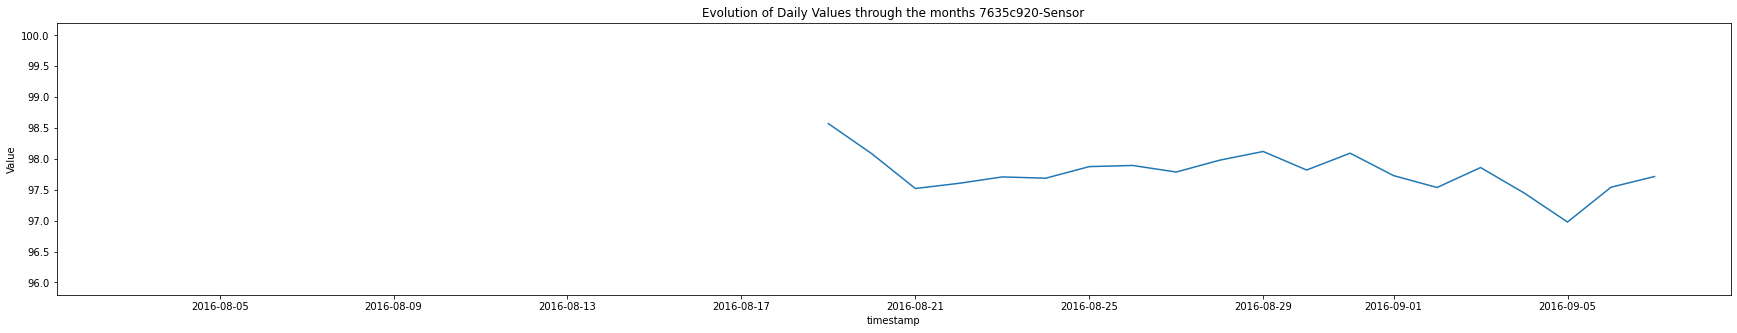

In [20]:
sensor1 = get_sensor('7635c920-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor1)
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7635c920-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7635c920-Sensor')

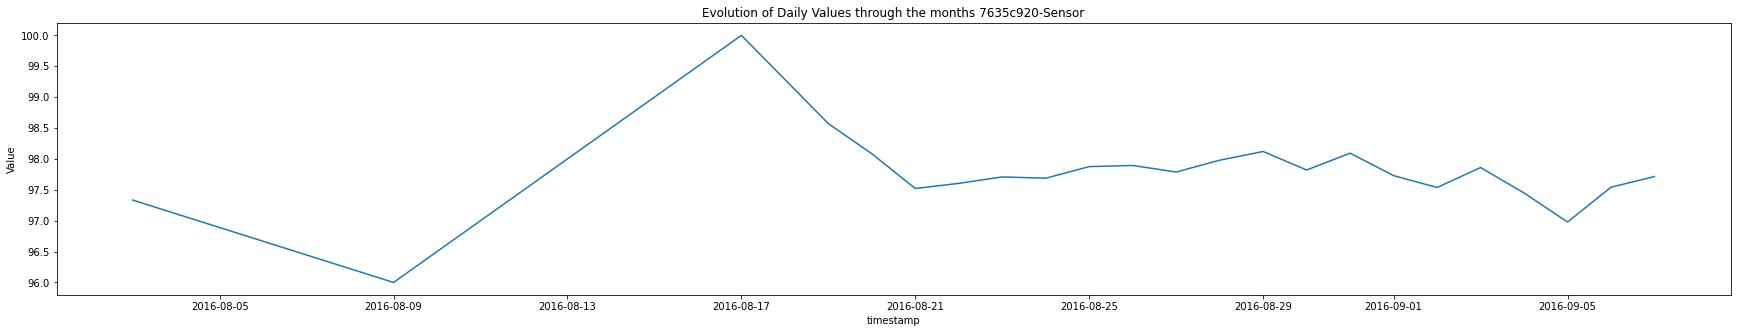

In [21]:
sensor1 = get_sensor('7635c920-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor1)
sensor.dropna(inplace=True)
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7635c920-Sensor')

### Sensor 763b9580

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763b9580-Sensor')

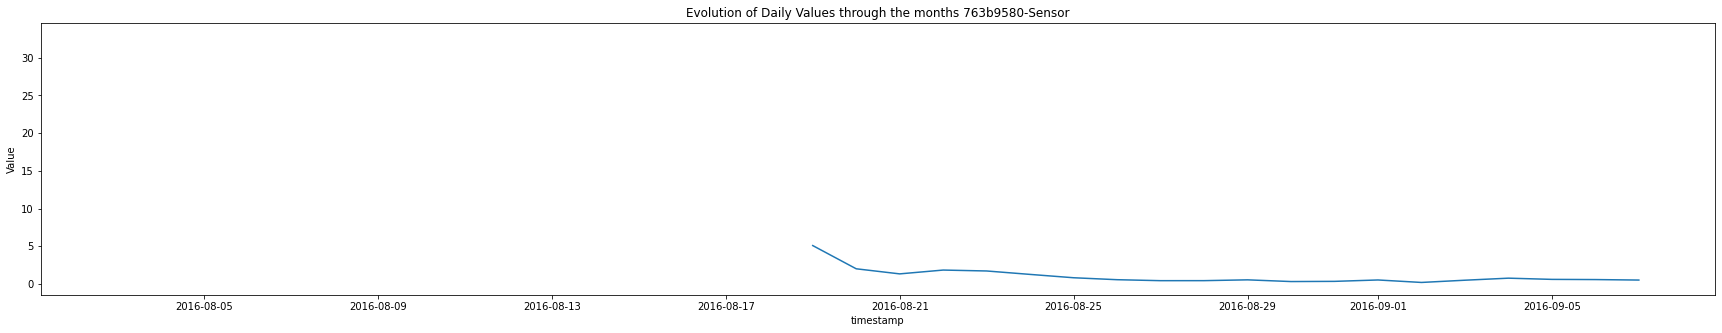

In [22]:
sensor1 = get_sensor('763b9580-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor1)
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763b9580-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763b9580-Sensor')

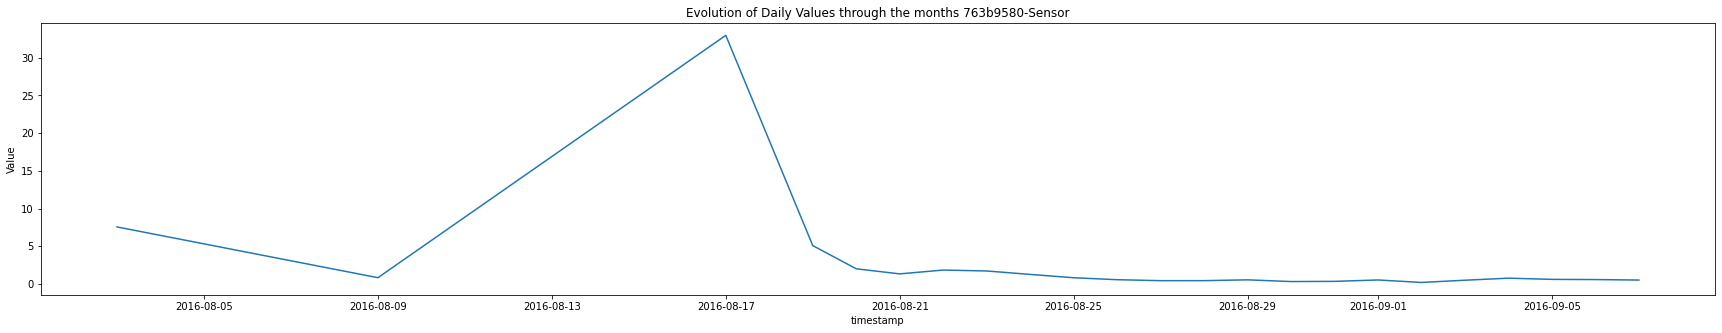

In [23]:
sensor1 = get_sensor('763b9580-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor1)
sensor.dropna(inplace=True)
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763b9580-Sensor')

### sensor 763d9150

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763d9150-Sensor')

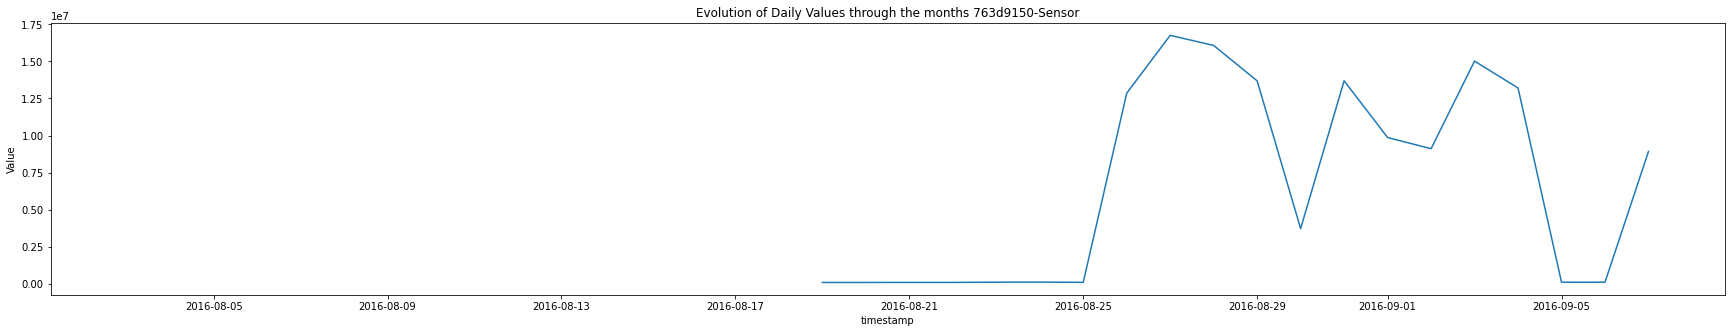

In [24]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763d9150-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763d9150-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763d9150-Sensor')

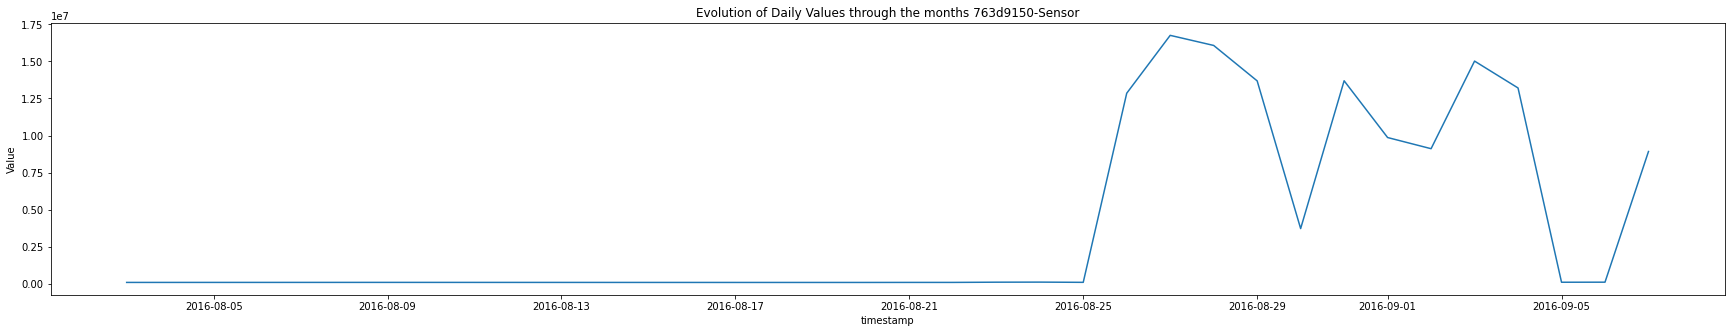

In [25]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763d9150-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763d9150-Sensor')

### sensor 763ca6f0

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763ca6f0-Sensor')

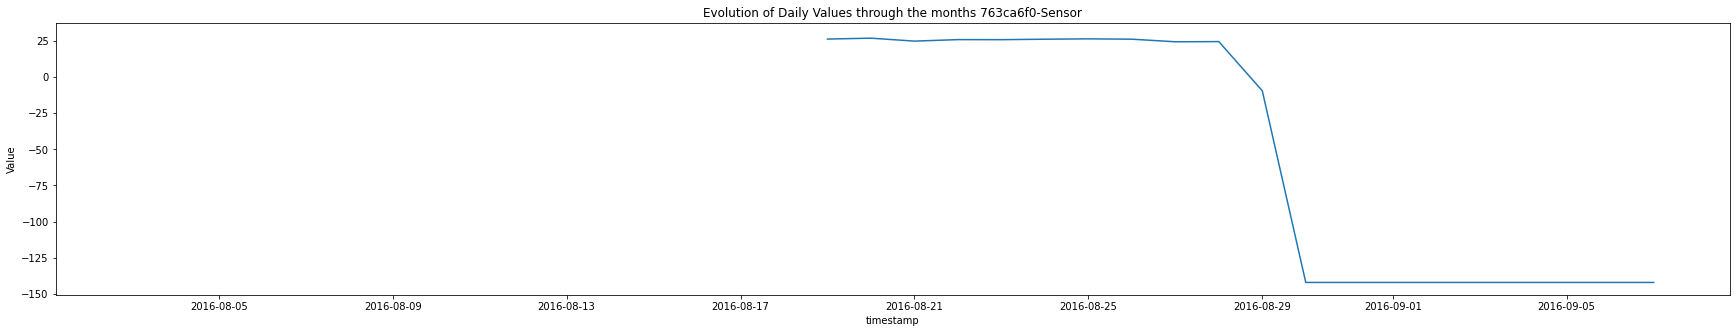

In [26]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763ca6f0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763ca6f0-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763ca6f0-Sensor')

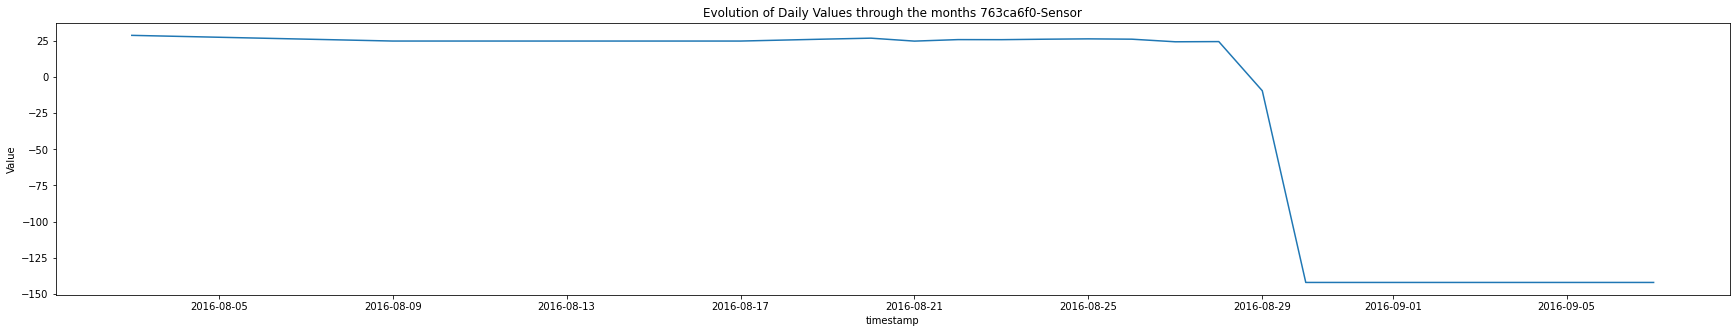

In [27]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763ca6f0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763ca6f0-Sensor')

### sensor 763701a1

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763701a1-Sensor')

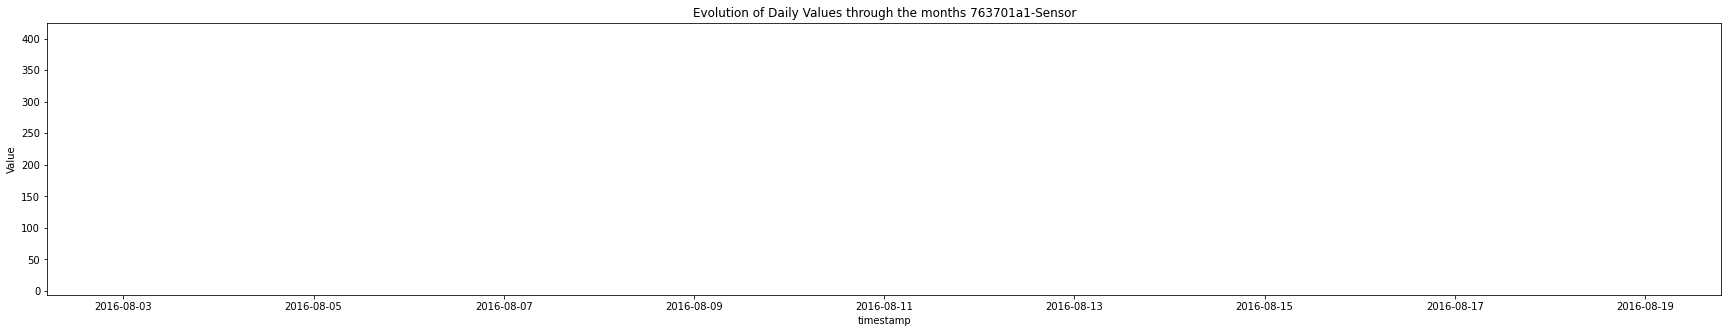

In [28]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763701a1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763701a1-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763701a1-Sensor')

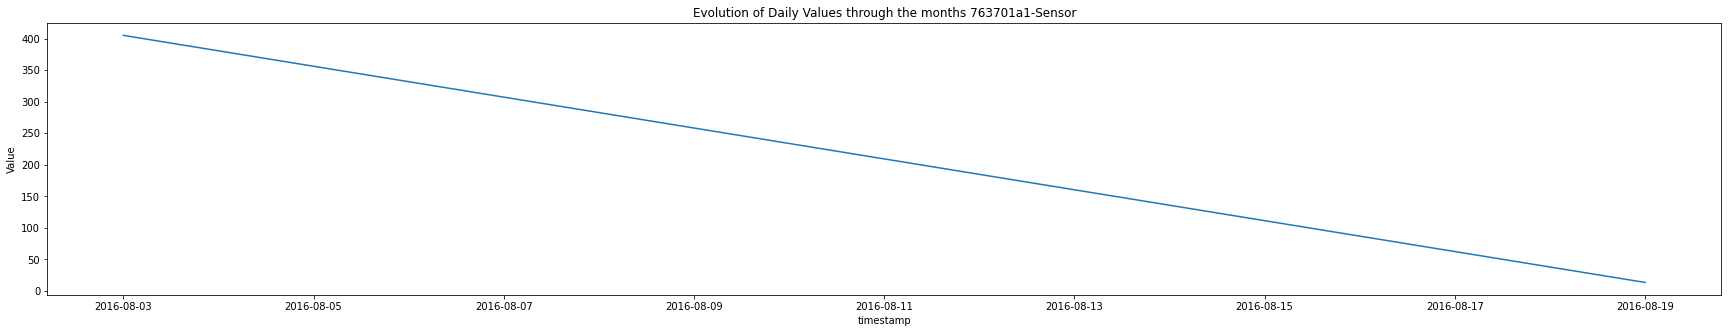

In [29]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763701a1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763701a1-Sensor')

### sensor 764161e0

Text(0.5, 1.0, 'Evolution of Daily Values through the months 764161e0-Sensor')

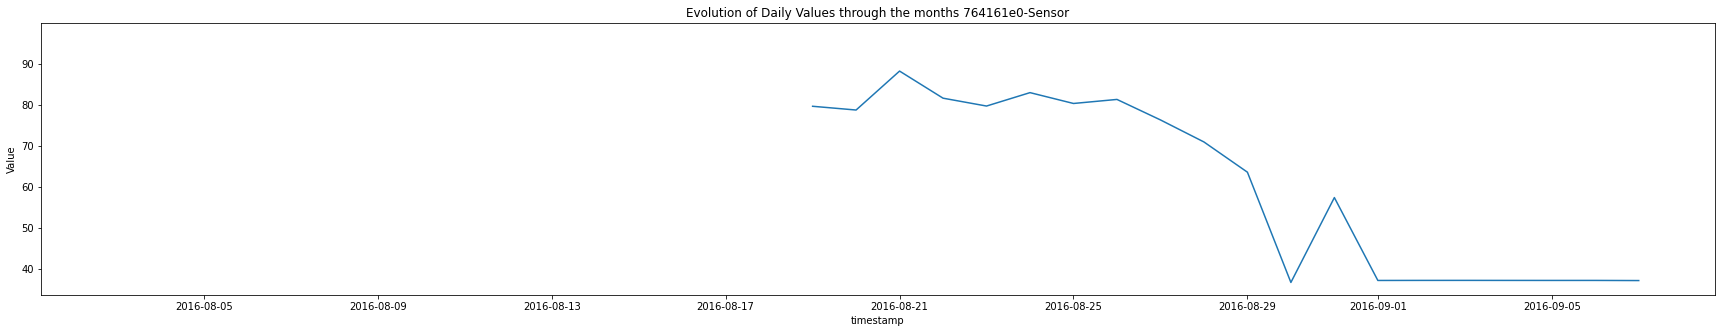

In [30]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor2 = get_sensor('764161e0-8679-11e6-a353-2f6c041e2491')
sensor2 = sensor_daily_sample(sensor2)
custom_plot(x = sensor2.index, y= sensor2['value'])
plt.title('Evolution of Daily Values through the months 764161e0-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 764161e0-Sensor')

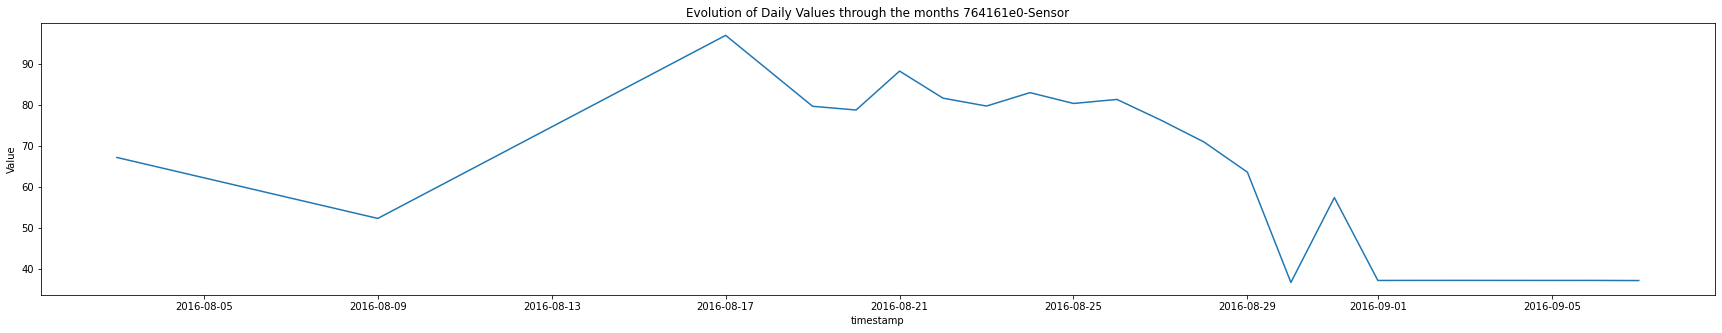

In [31]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor2 = get_sensor('764161e0-8679-11e6-a353-2f6c041e2491')
sensor2 = sensor_daily_sample(sensor2)
sensor2.dropna(inplace=True)
custom_plot(x = sensor2.index, y= sensor2['value'])
plt.title('Evolution of Daily Values through the months 764161e0-Sensor')

### sensor 7635f030

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7635f030-Sensor')

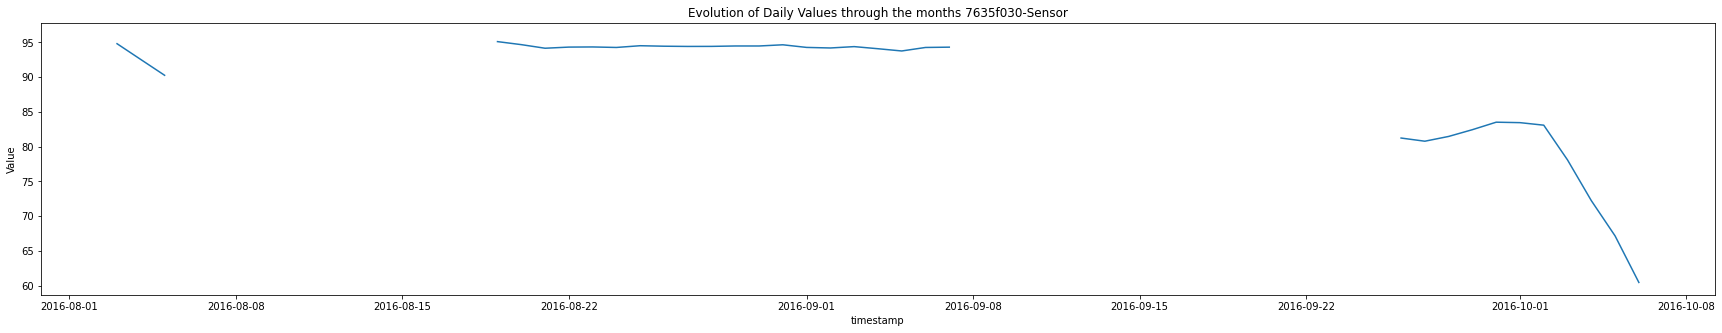

In [32]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('7635f030-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7635f030-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7635f030-Sensor')

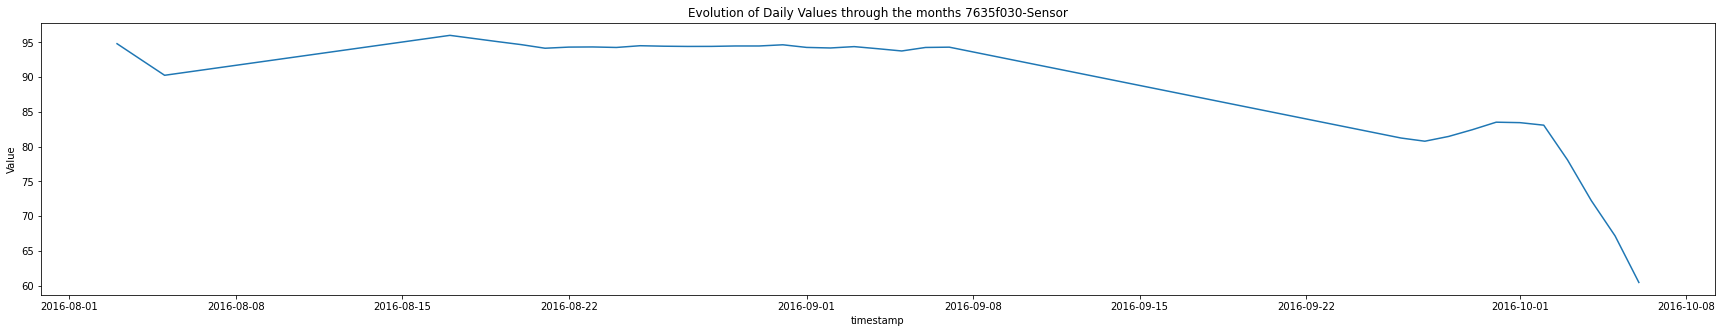

In [33]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('7635f030-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7635f030-Sensor')

### sensor 763d6a40

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763d6a40-Sensor')

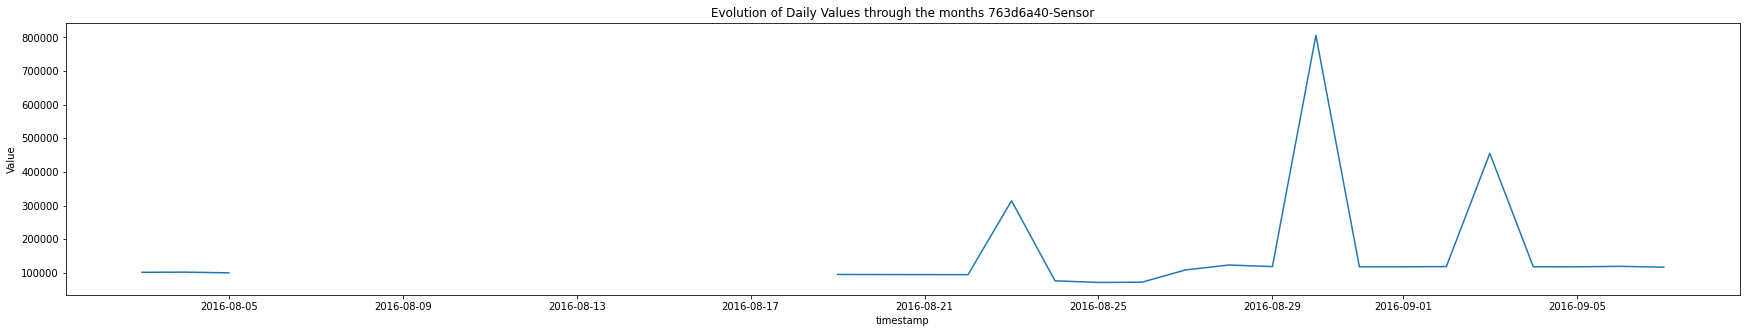

In [34]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763d6a40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763d6a40-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763d6a40-Sensor')

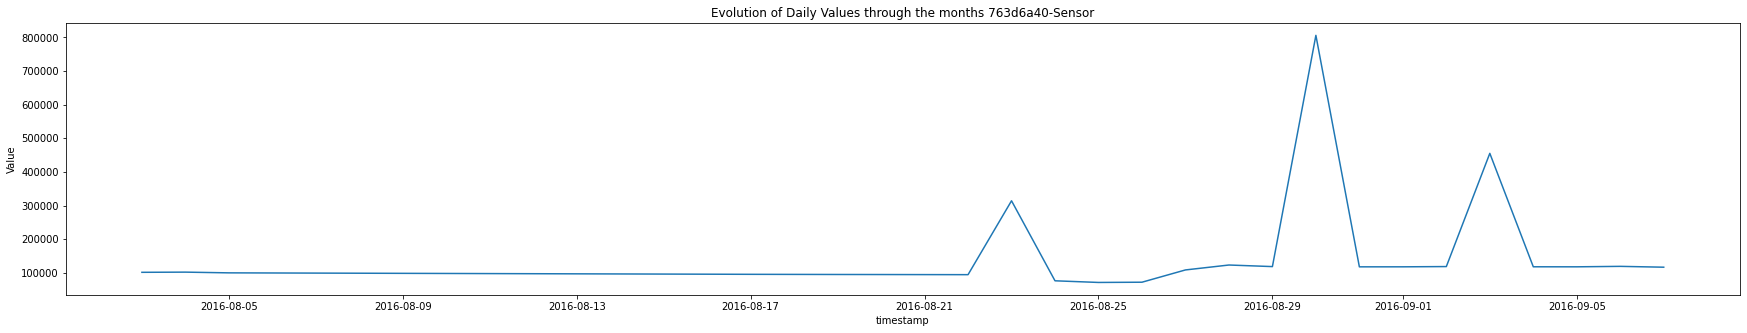

In [35]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763d6a40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763d6a40-Sensor')

### sensor 763701a0

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763701a0-Sensor')

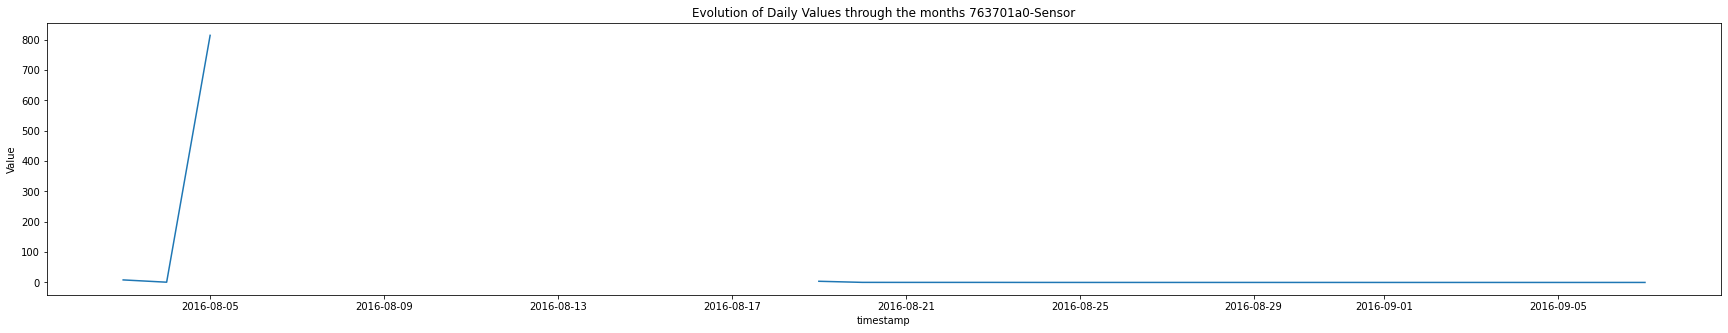

In [36]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763701a0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763701a0-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763701a0-Sensor')

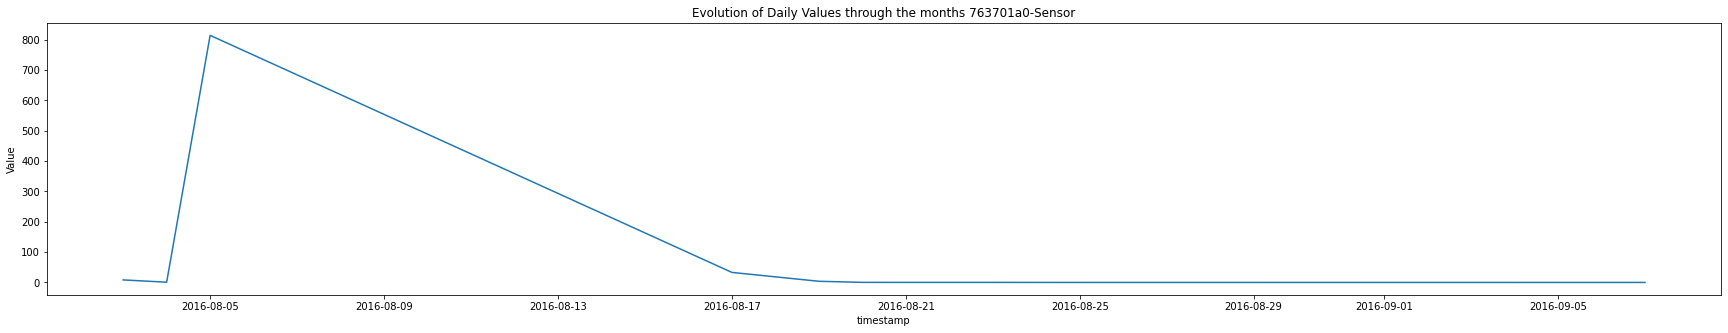

In [37]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763701a0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763701a0-Sensor')

### sensor 7636da90

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7636da90-Sensor')

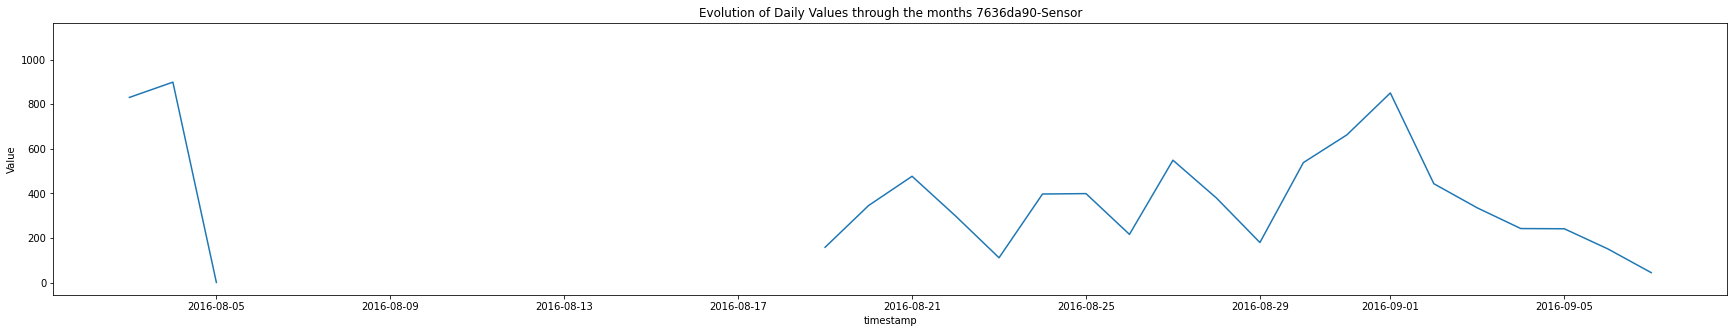

In [38]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('7636da90-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7636da90-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7636da90-Sensor')

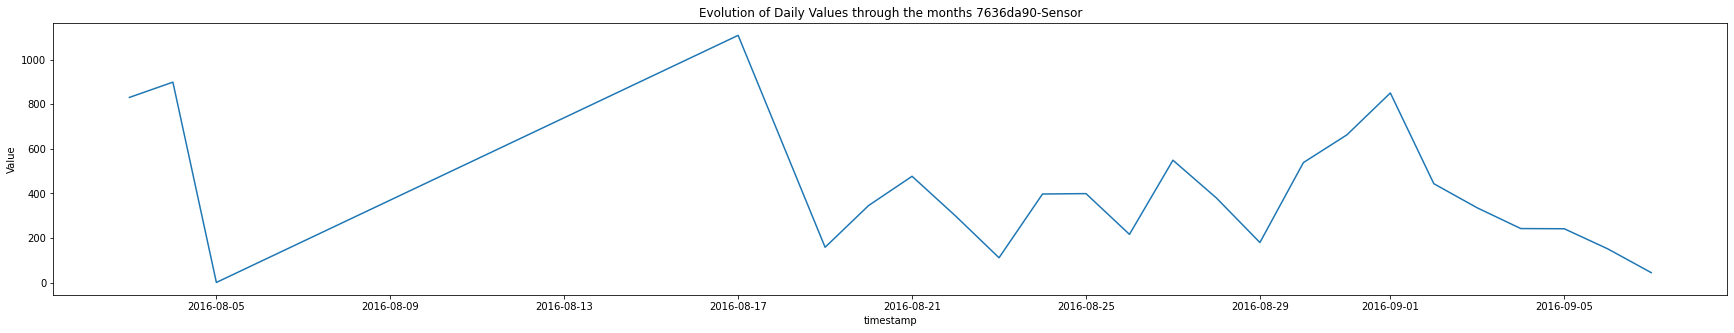

In [39]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('7636da90-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7636da90-Sensor')

### sensor 763bbc90

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763bbc90-Sensor')

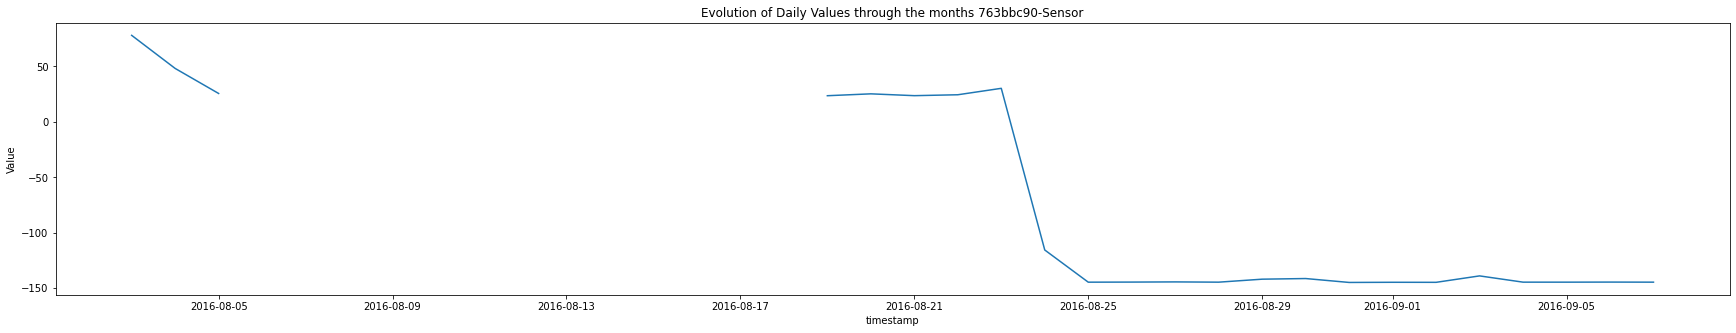

In [40]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763bbc90-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763bbc90-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 763bbc90-Sensor')

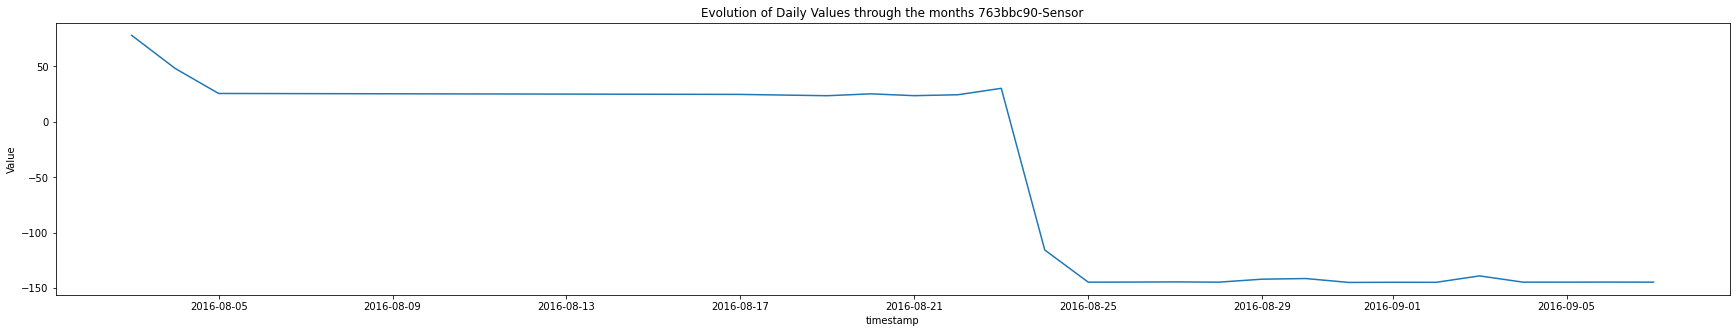

In [41]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('763bbc90-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 763bbc90-Sensor')

### sensor  76402960

Text(0.5, 1.0, 'Evolution of Daily Values through the months 76402960-Sensor')

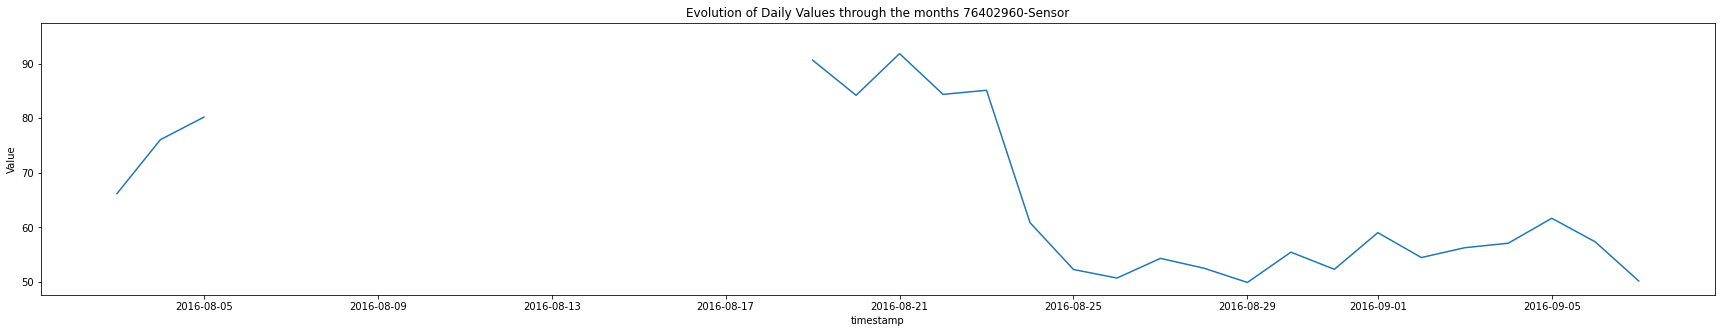

In [42]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('76402960-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 76402960-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 76402960-Sensor')

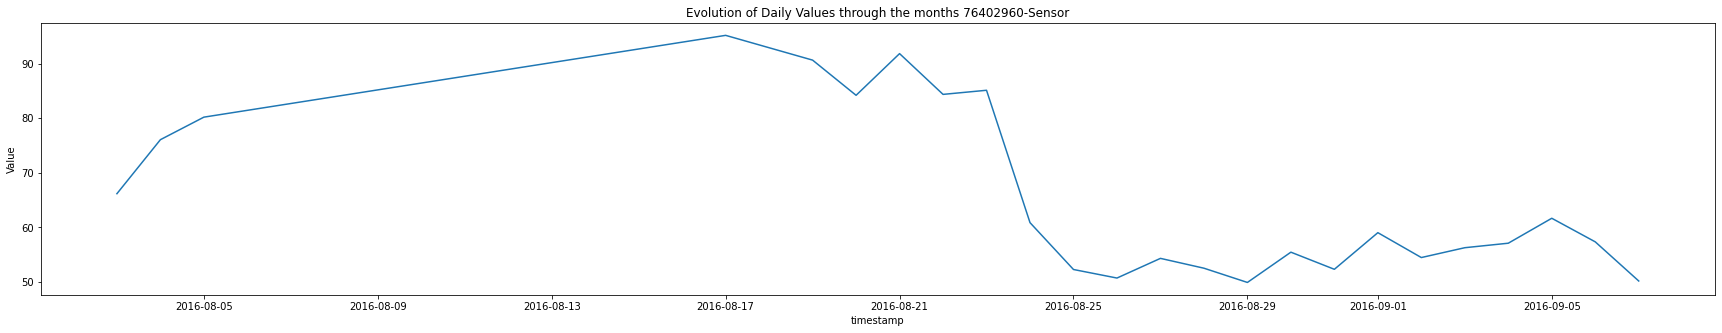

In [43]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('76402960-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 76402960-Sensor')

### sensor 76413ad0

Text(0.5, 1.0, 'Evolution of Daily Values through the months 76413ad0-Sensor')

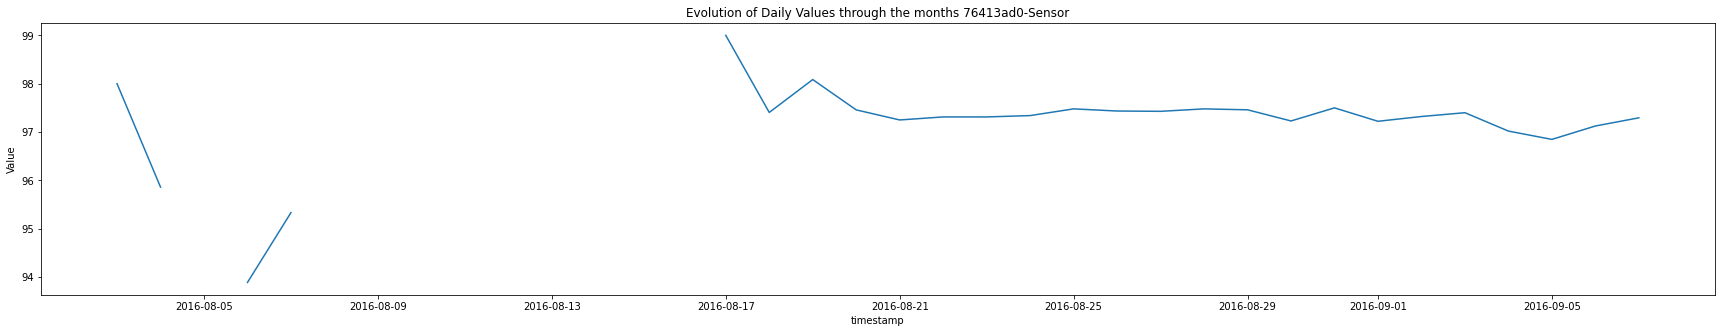

In [44]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('76413ad0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 76413ad0-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 76413ad0-Sensor')

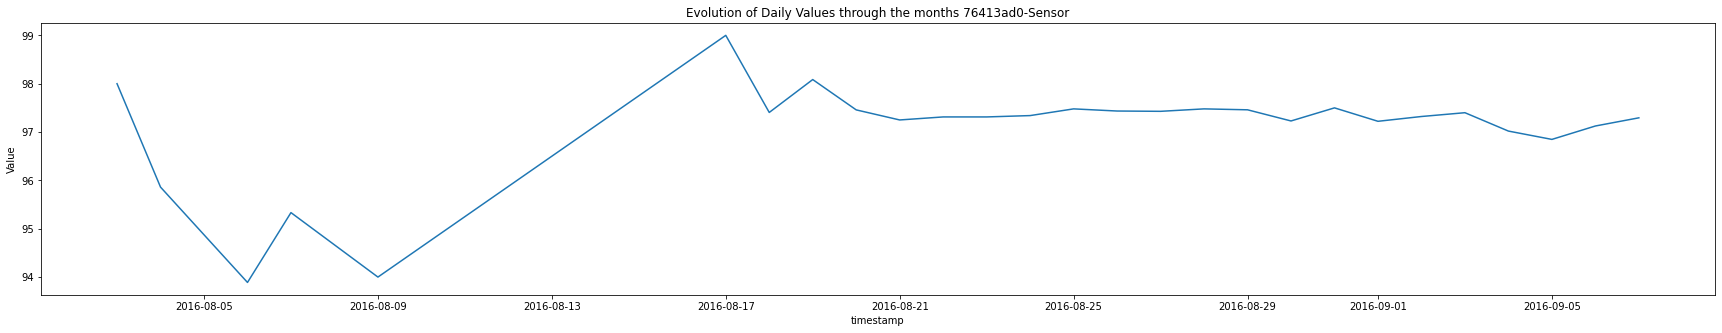

In [45]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('76413ad0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 76413ad0-Sensor')

### sensor 7644bd40

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7644bd40-Sensor')

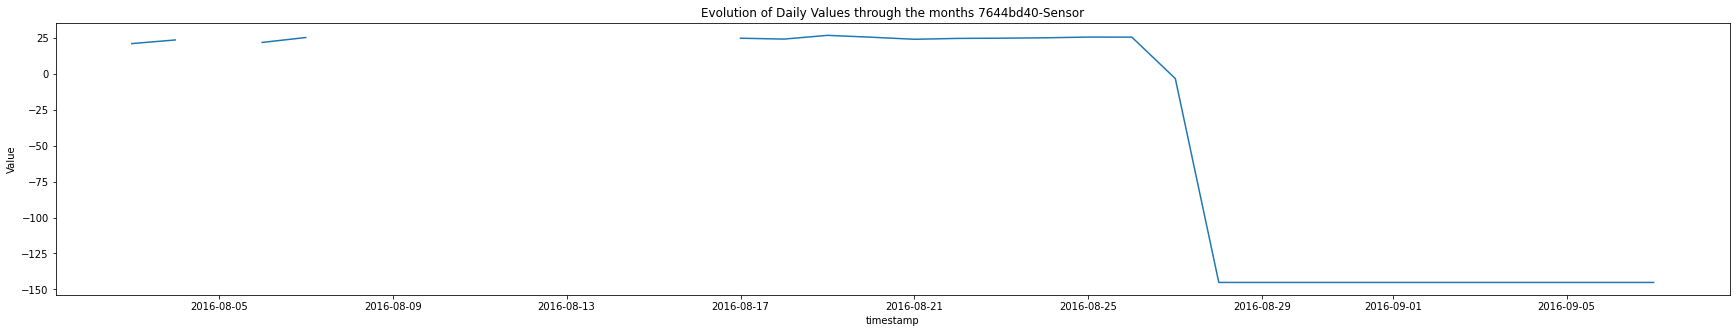

In [46]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('7644bd40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7644bd40-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7644bd40-Sensor')

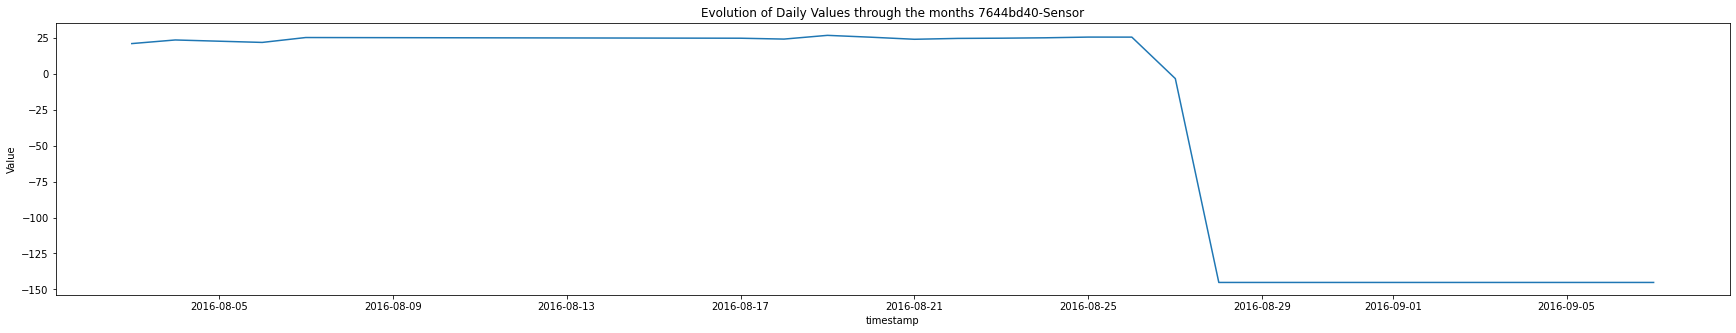

In [47]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('7644bd40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7644bd40-Sensor')

### sensor 76427350

Text(0.5, 1.0, 'Evolution of Daily Values through the months 76427350-Sensor')

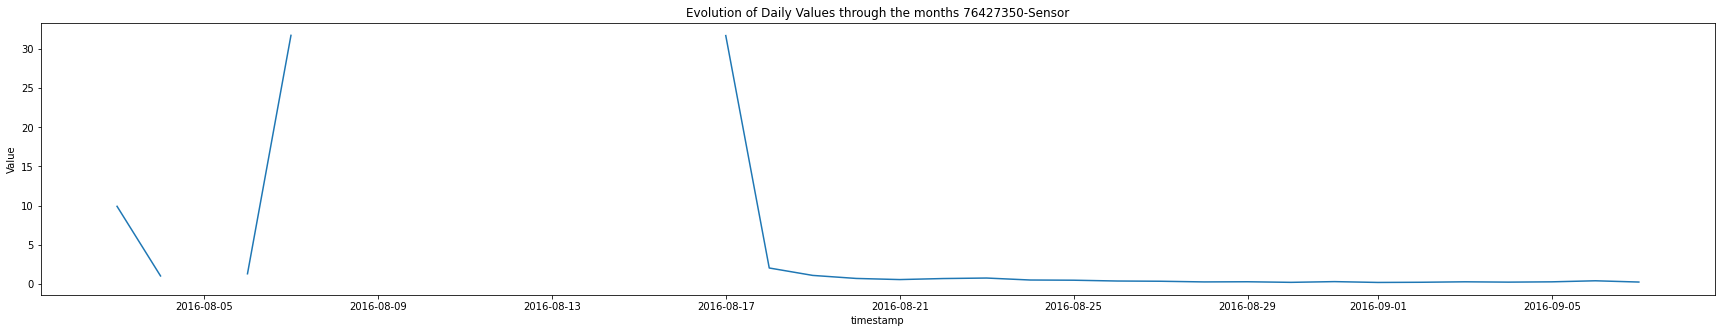

In [48]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('76427350-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 76427350-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 76427350-Sensor')

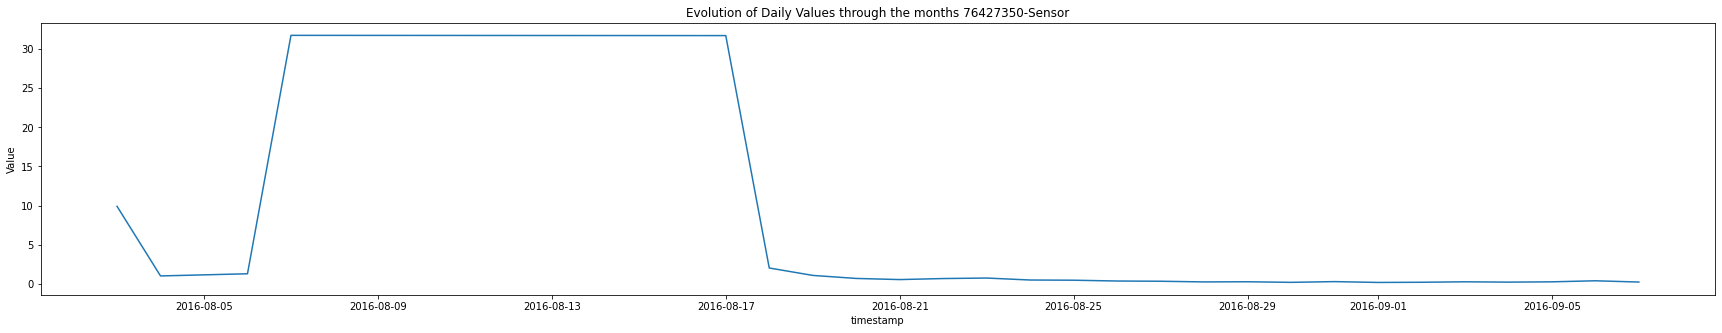

In [49]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('76427350-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 76427350-Sensor')

### sensor 76427351

Text(0.5, 1.0, 'Evolution of Daily Values through the months 76427351-Sensor')

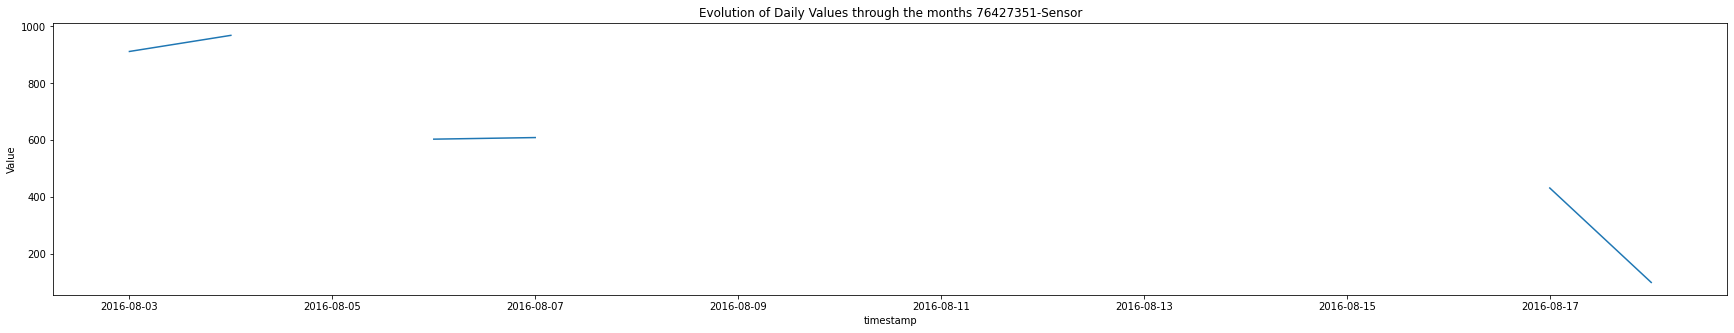

In [50]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('76427351-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 76427351-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 76427351-Sensor')

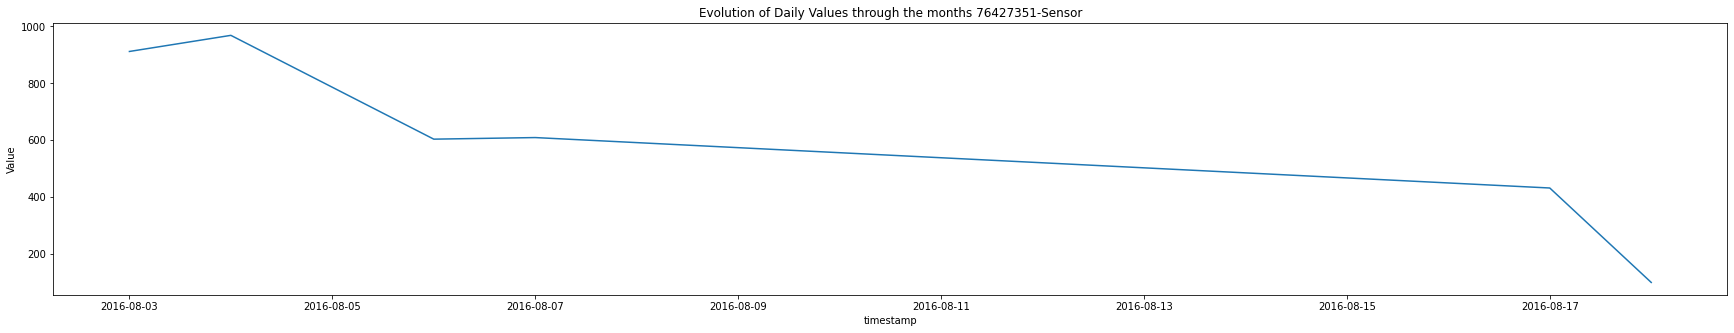

In [51]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('76427351-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 76427351-Sensor')

### sensor 7645ceb0

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7645ceb0-Sensor')

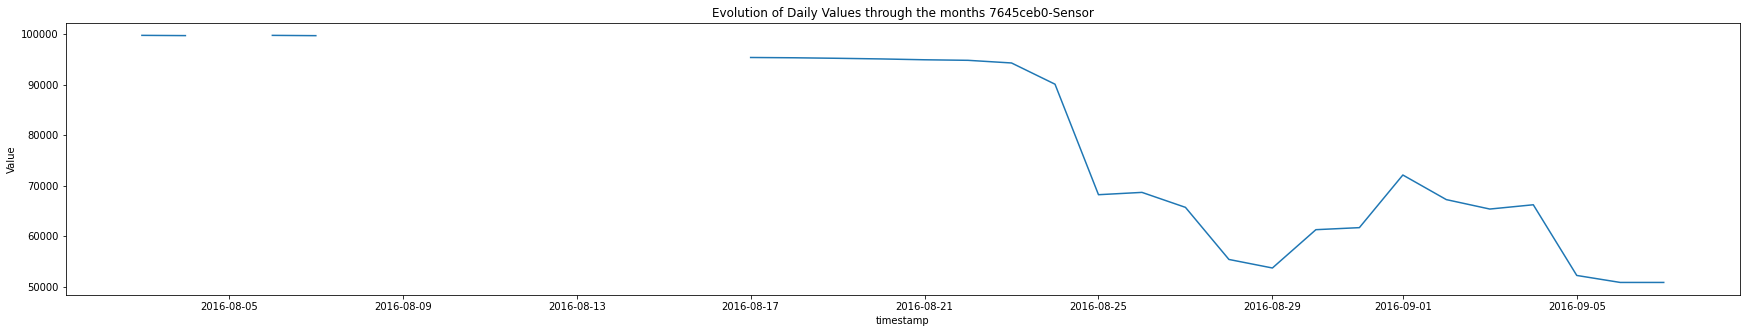

In [52]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('7645ceb0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7645ceb0-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7645ceb0-Sensor')

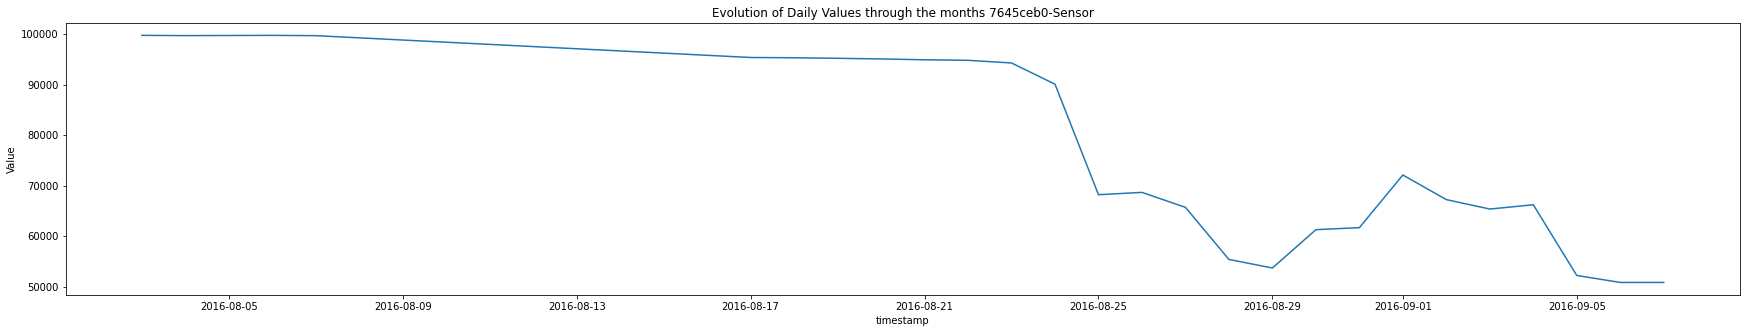

In [53]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('7645ceb0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7645ceb0-Sensor')

### sensor 7645ceb1

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7645ceb1-Sensor')

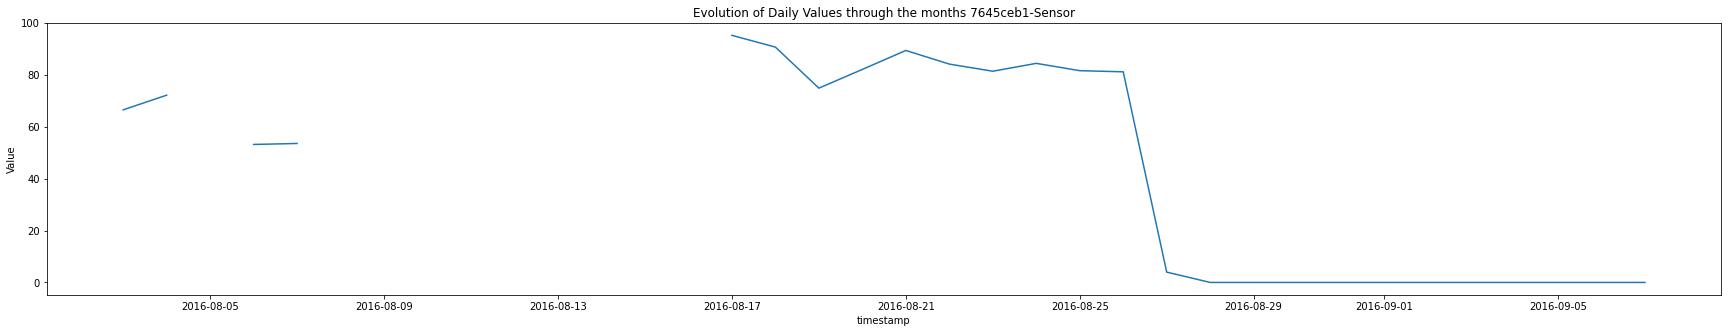

In [54]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('7645ceb1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7645ceb1-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months 7645ceb1-Sensor')

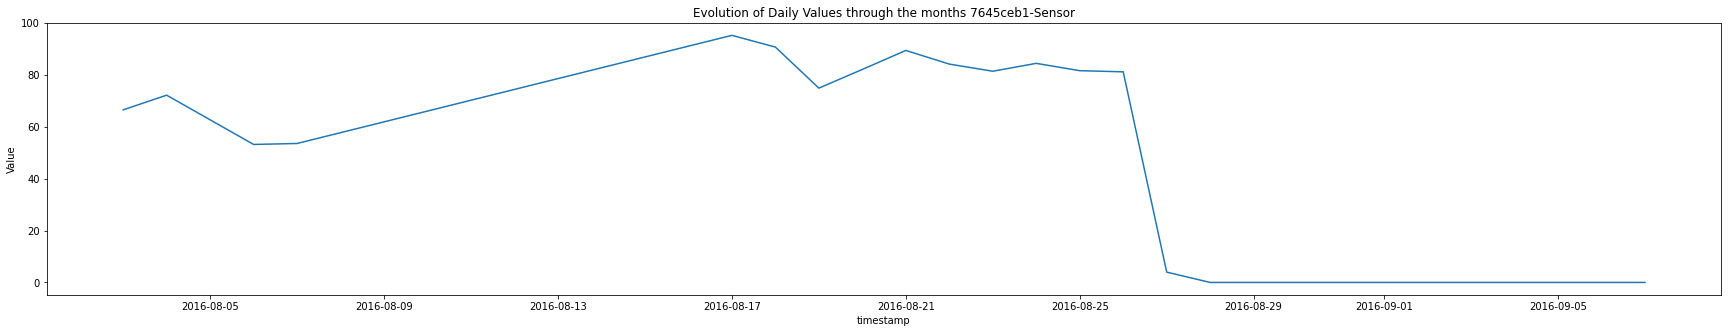

In [55]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('7645ceb1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 7645ceb1-Sensor')

### sensor c159c730

Text(0.5, 1.0, 'Evolution of Daily Values through the months c159c730-Sensor')

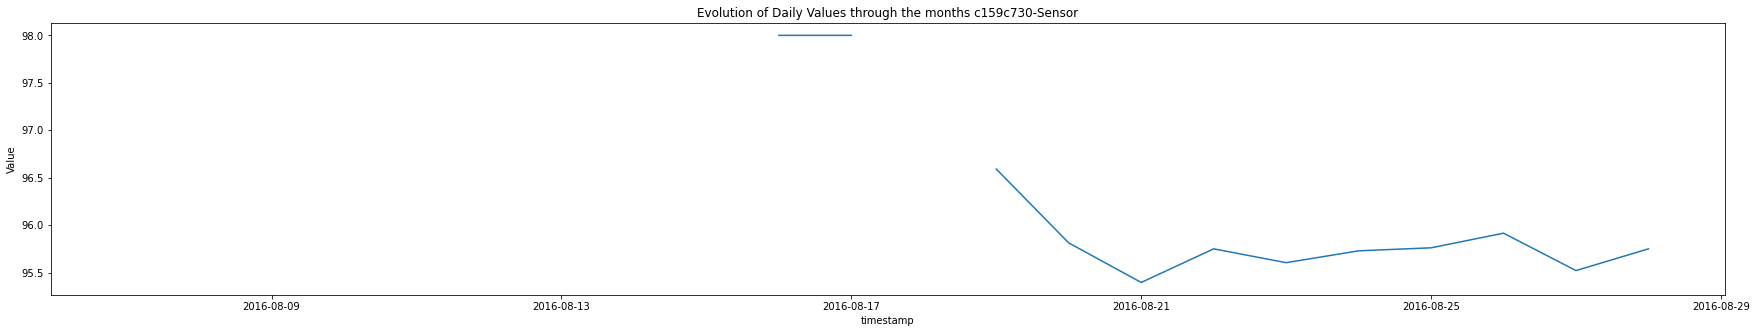

In [56]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c159c730-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c159c730-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months c159c730-Sensor')

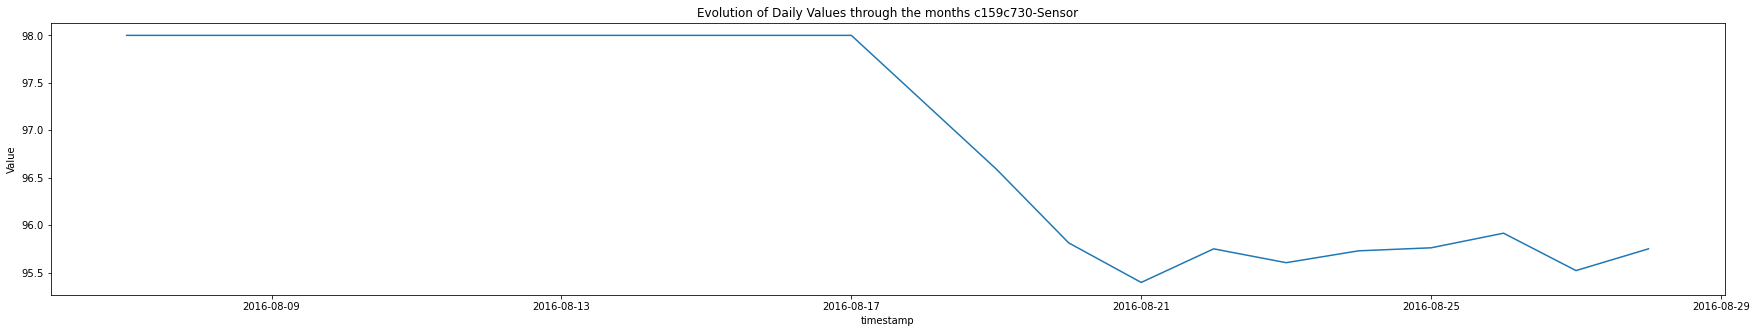

In [57]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c159c730-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c159c730-Sensor')


### sensor c15c5f40

Text(0.5, 1.0, 'Evolution of Daily Values through the months c15c5f40-Sensor')

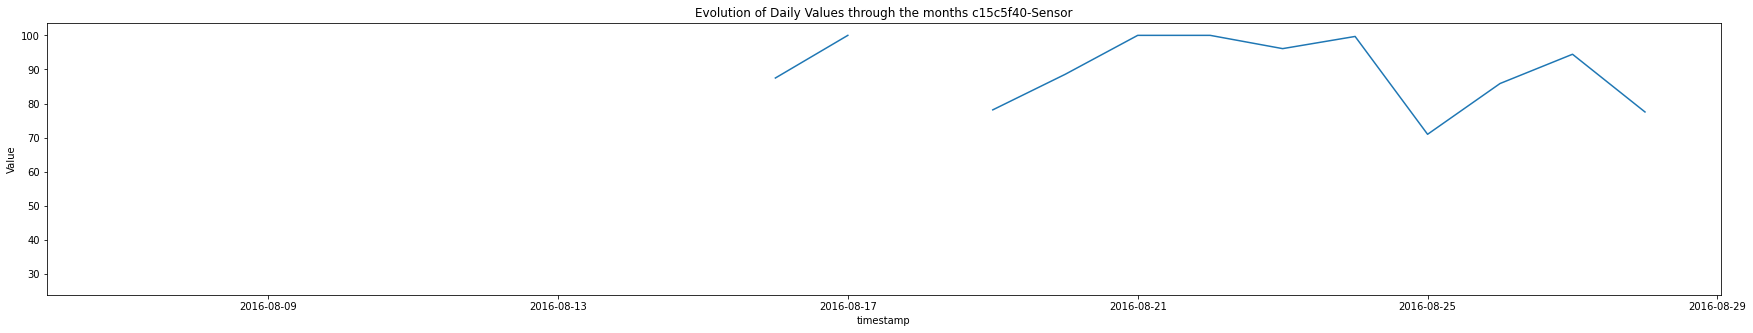

In [58]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c15c5f40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c15c5f40-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months c15c5f40-Sensor')

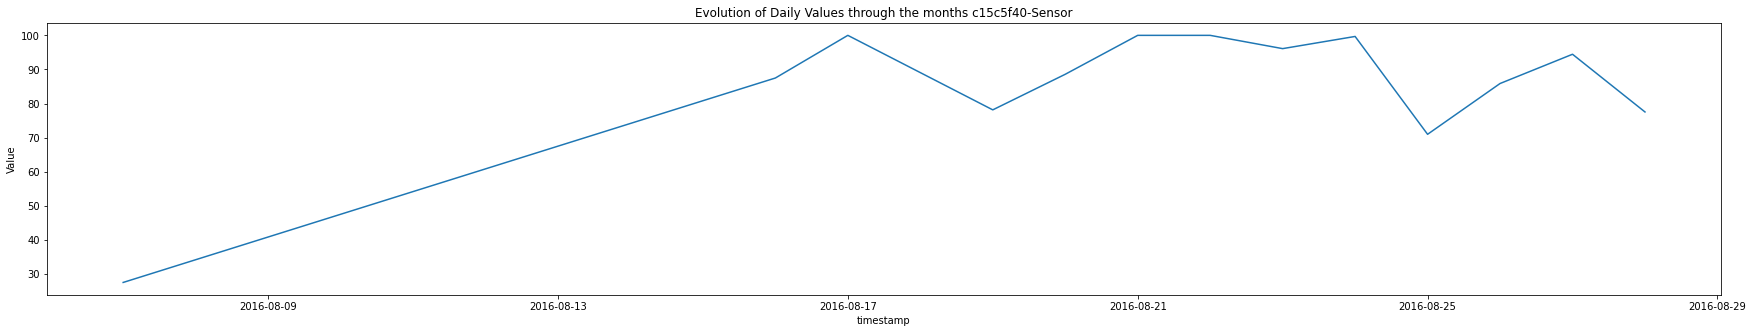

In [59]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c15c5f40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c15c5f40-Sensor')

### sensor c15fbaa0

Text(0.5, 1.0, 'Evolution of Daily Values through the months c15fbaa0-Sensor')

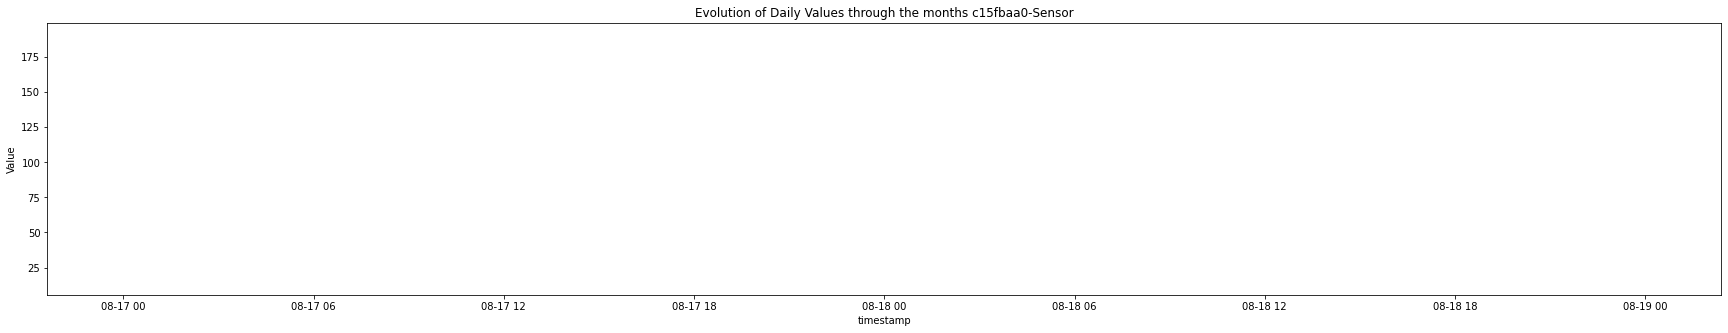

In [60]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c15fbaa0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c15fbaa0-Sensor')

### sensor c15a6370

Text(0.5, 1.0, 'Evolution of Daily Values through the months c15a6370-Sensor')

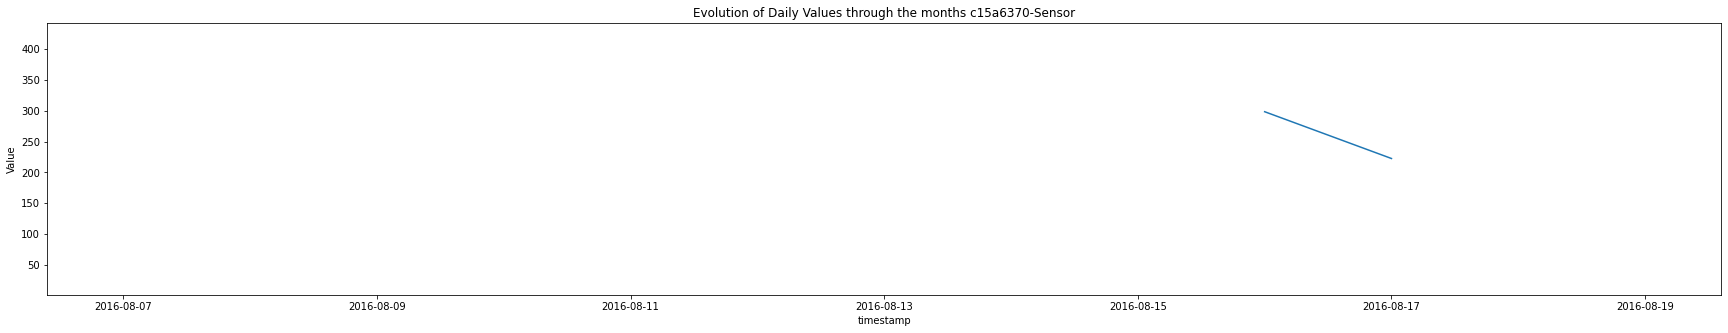

In [61]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c15a6370-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c15a6370-Sensor')

### sensor c15fbaa1

Text(0.5, 1.0, 'Evolution of Daily Values through the months c15fbaa1-Sensor')

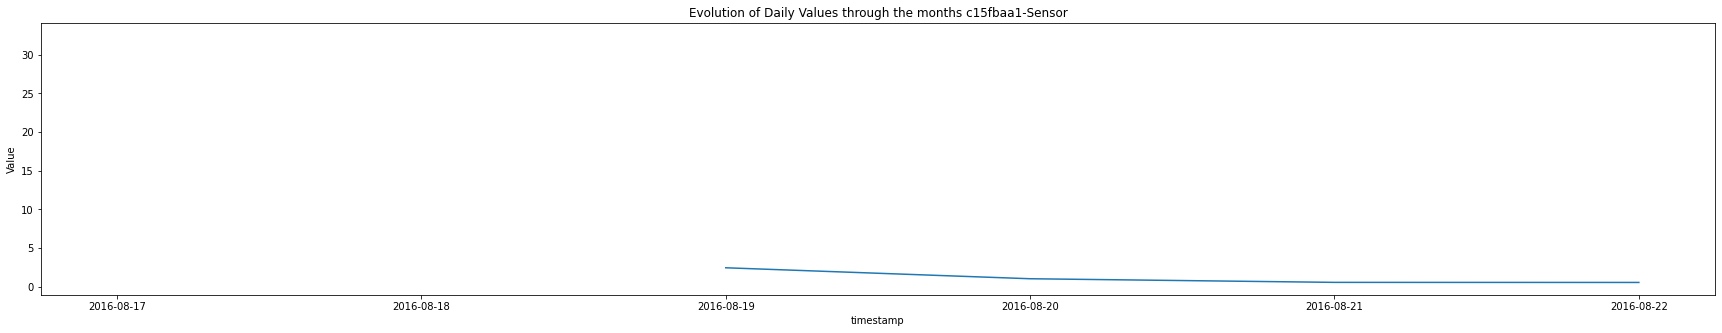

In [62]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c15fbaa1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c15fbaa1-Sensor')

### sensor c15a6372

Text(0.5, 1.0, 'Evolution of Daily Values through the months c15a6372-Sensor')

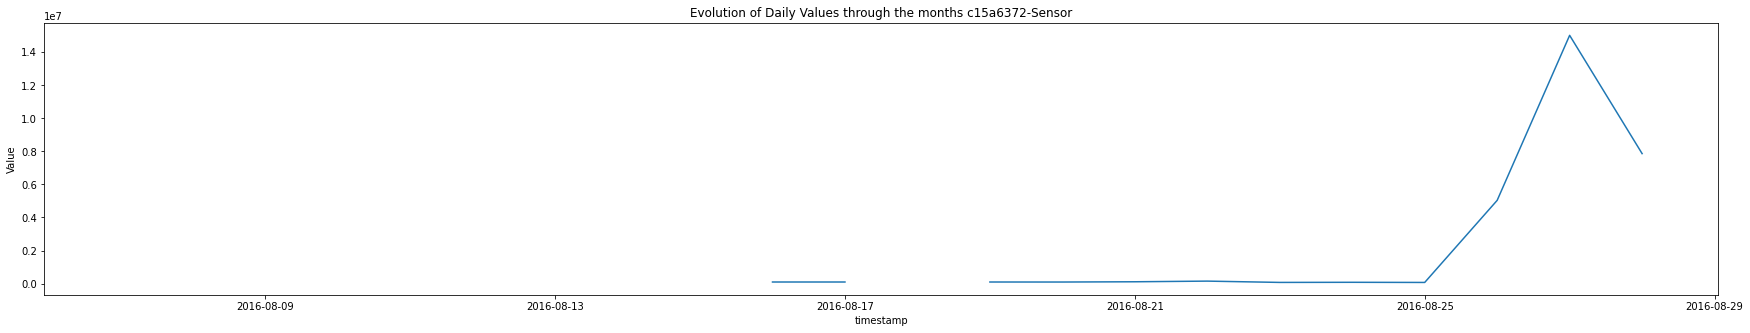

In [63]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c15a6372-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c15a6372-Sensor')

### sensor c15ef750

Text(0.5, 1.0, 'Evolution of Daily Values through the months c15ef750-Sensor')

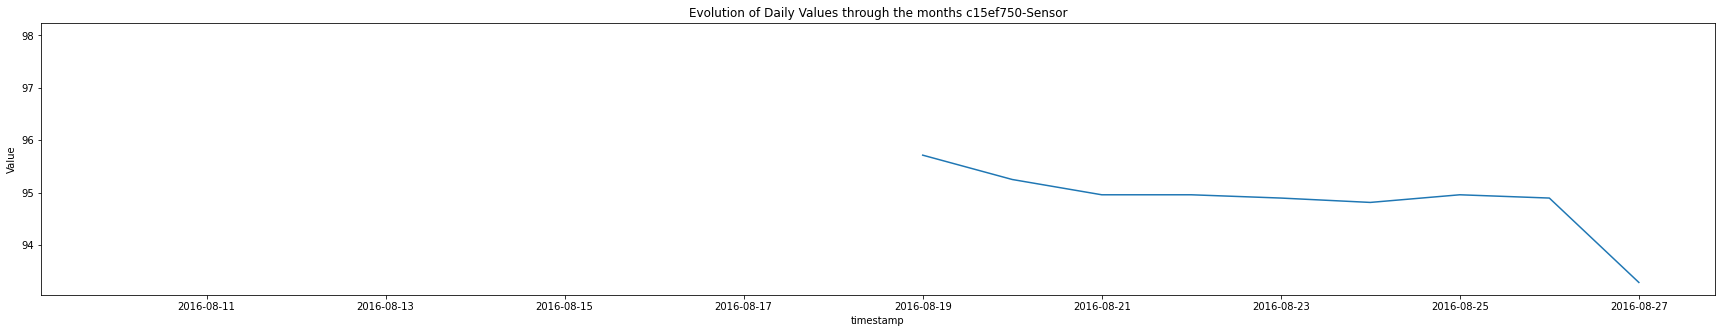

In [64]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c15ef750-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c15ef750-Sensor')

### sensor c15f9390

Text(0.5, 1.0, 'Evolution of Daily Values through the months c15f9390-Sensor')

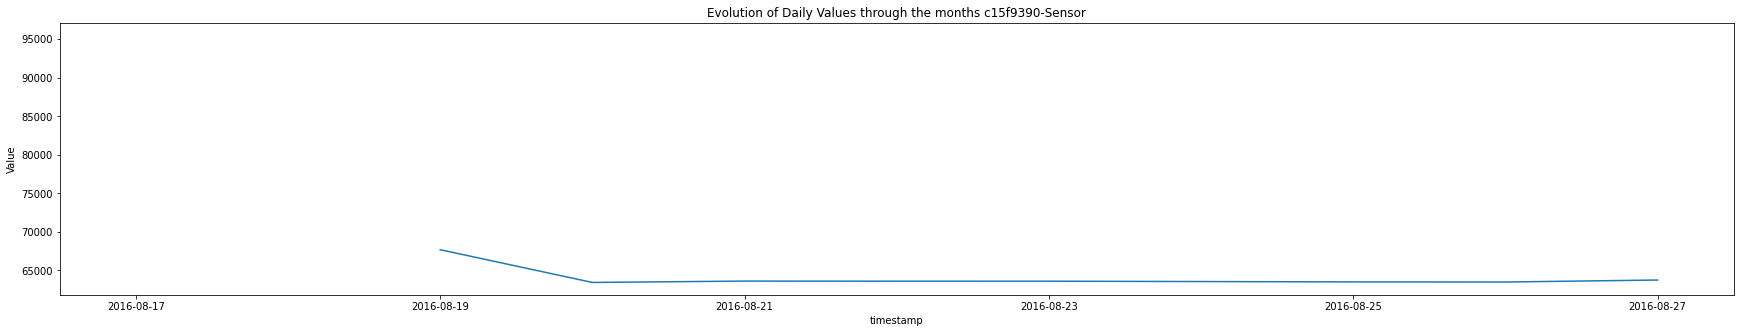

In [65]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c15f9390-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c15f9390-Sensor')

### sensor c15a6371

Text(0.5, 1.0, 'Evolution of Daily Values through the months c15a6371-Sensor')

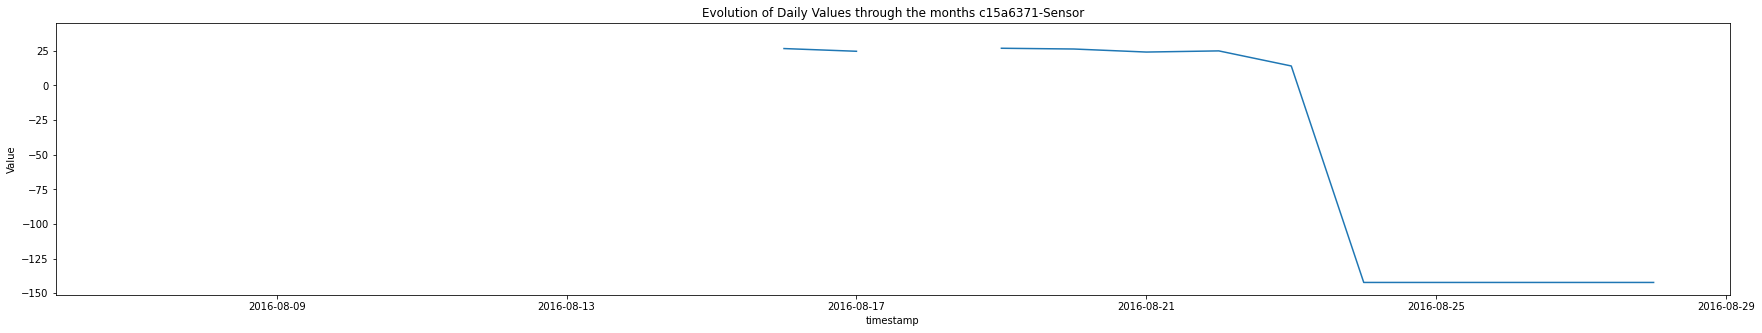

In [66]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c15a6371-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c15a6371-Sensor')

### sensor c15f9391

Text(0.5, 1.0, 'Evolution of Daily Values through the months c15f9391-Sensor')

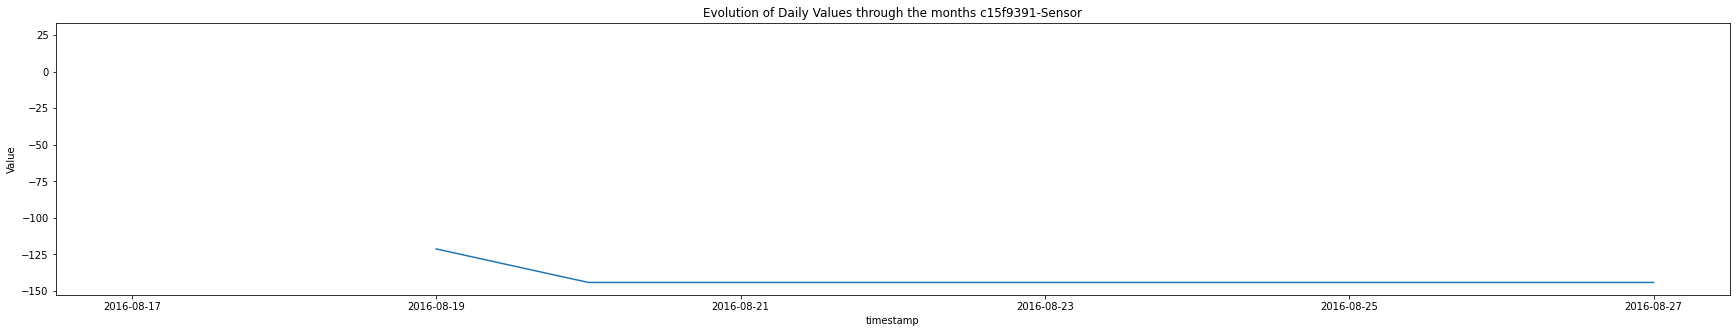

In [67]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c15f9391-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c15f9391-Sensor')

### sensor c159ee40

Text(0.5, 1.0, 'Evolution of Daily Values through the months c159ee40-Sensor')

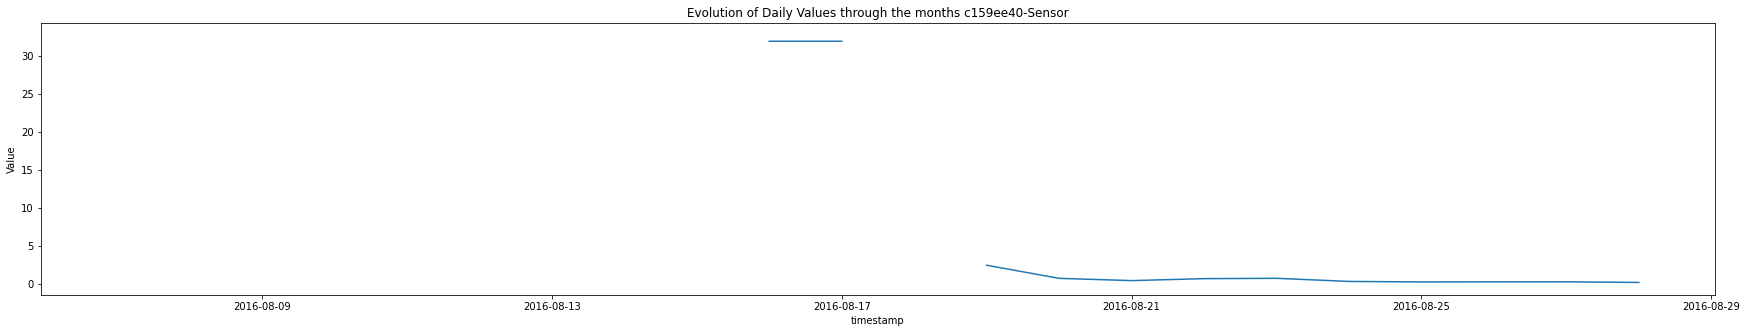

In [68]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c159ee40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c159ee40-Sensor')

### sensor c162c7e0

Text(0.5, 1.0, 'Evolution of Daily Values through the months c162c7e0-Sensor')

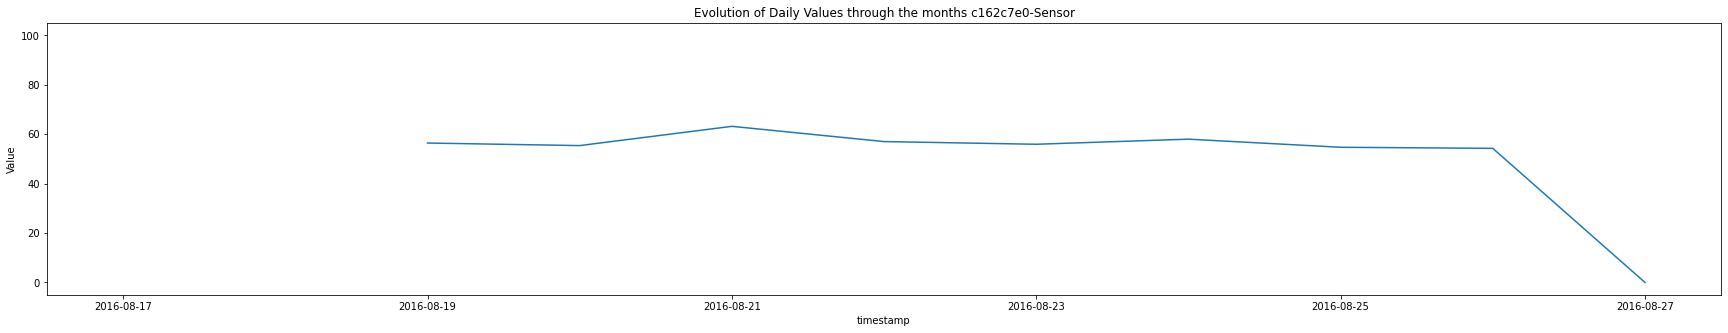

In [69]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('c162c7e0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c162c7e0-Sensor')

### sensor d3cf45c0

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3cf45c0-Sensor')

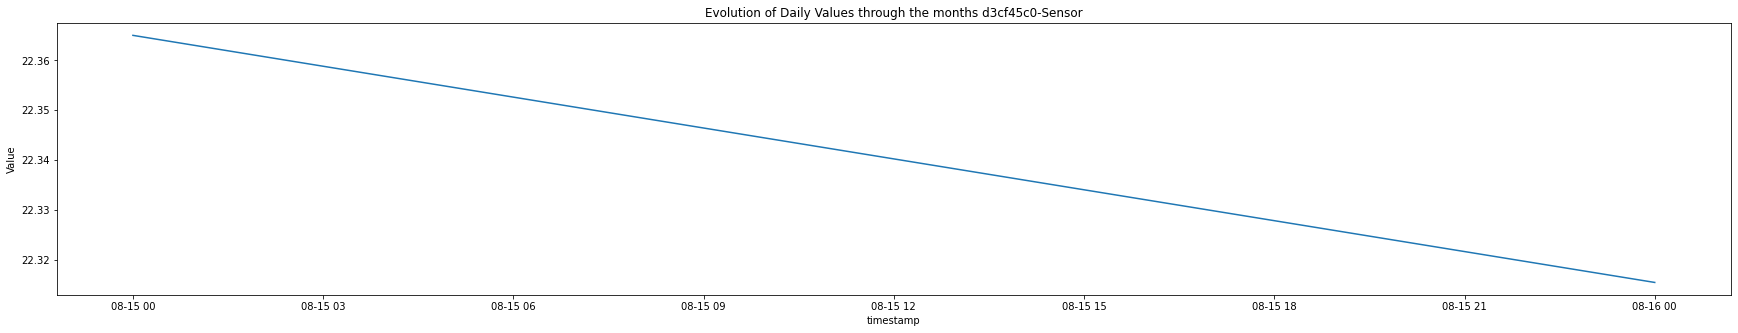

In [70]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('d3cf45c0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3cf45c0-Sensor')

### sensor d3cf6cd0

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3cf6cd0-Sensor')

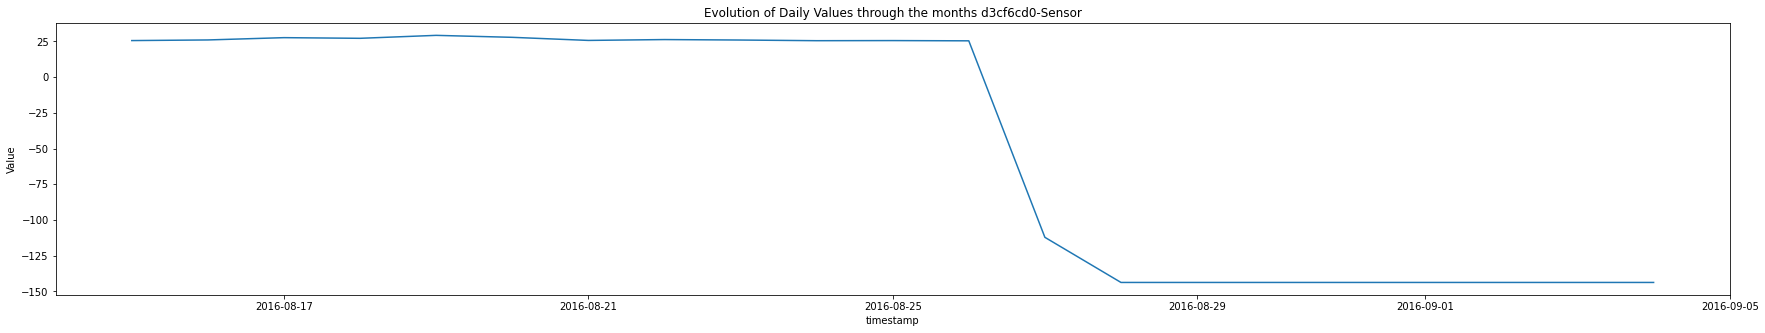

In [71]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('d3cf6cd0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3cf6cd0-Sensor')

### sensor d3cd7100

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3cd7100-Sensor')

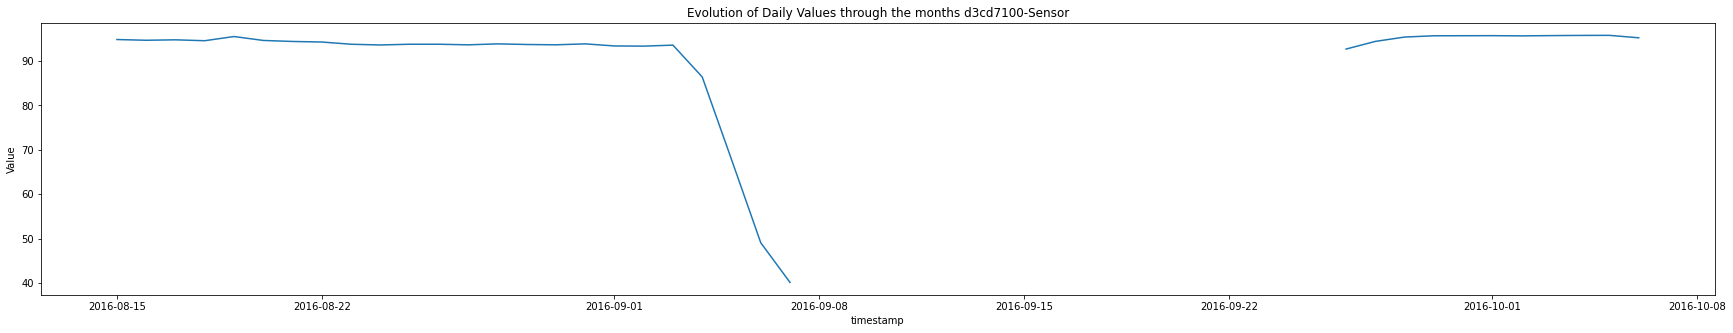

In [72]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('d3cd7100-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3cd7100-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3cd7100-Sensor')

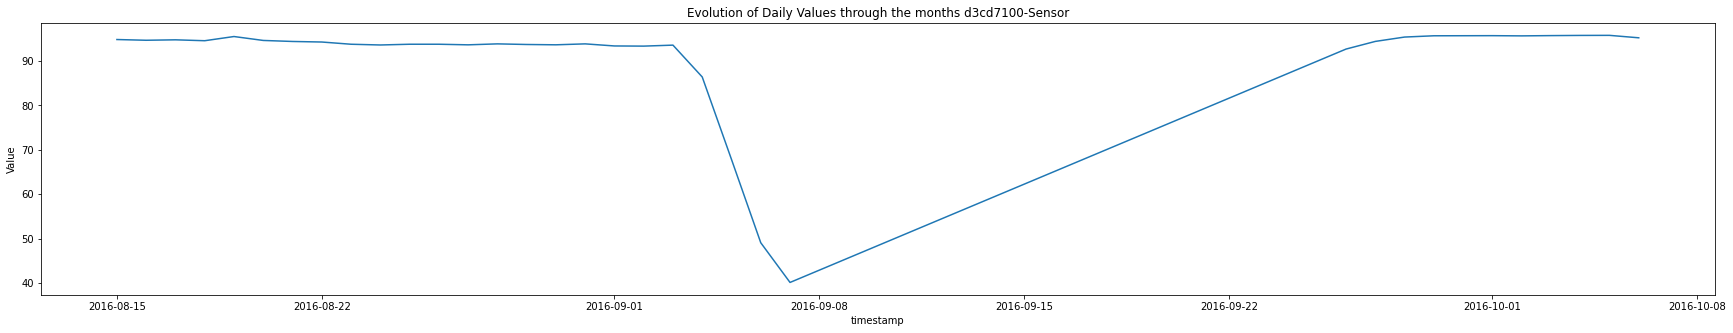

In [73]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('d3cd7100-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3cd7100-Sensor')

### sensor d3cea980

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3cea980-Sensor')

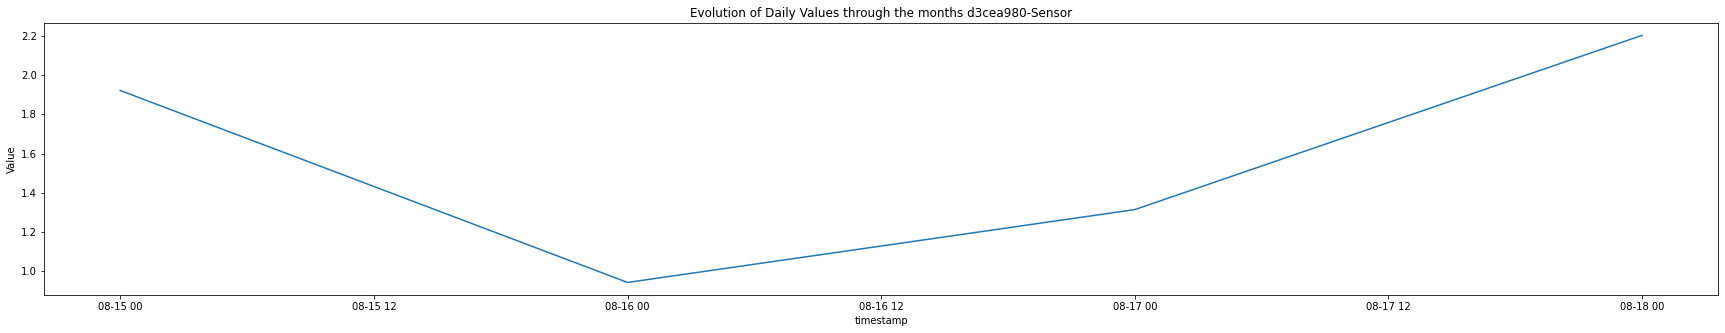

In [74]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('d3cea980-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3cea980-Sensor')

### sensor d3d0cc60

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d0cc60-Sensor')

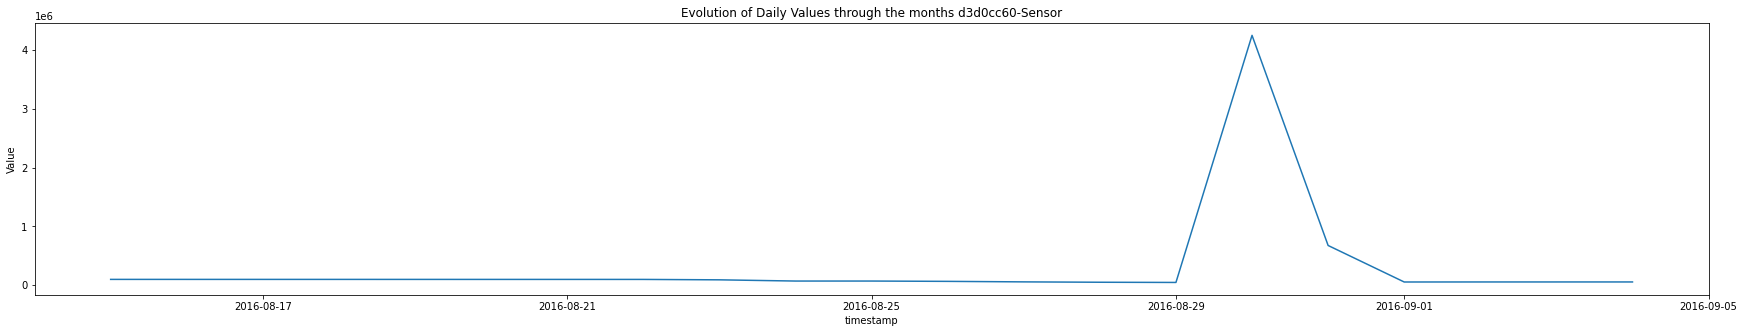

In [75]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('d3d0cc60-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d0cc60-Sensor')

### sensor d3d3b291

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d3b291-Sensor')

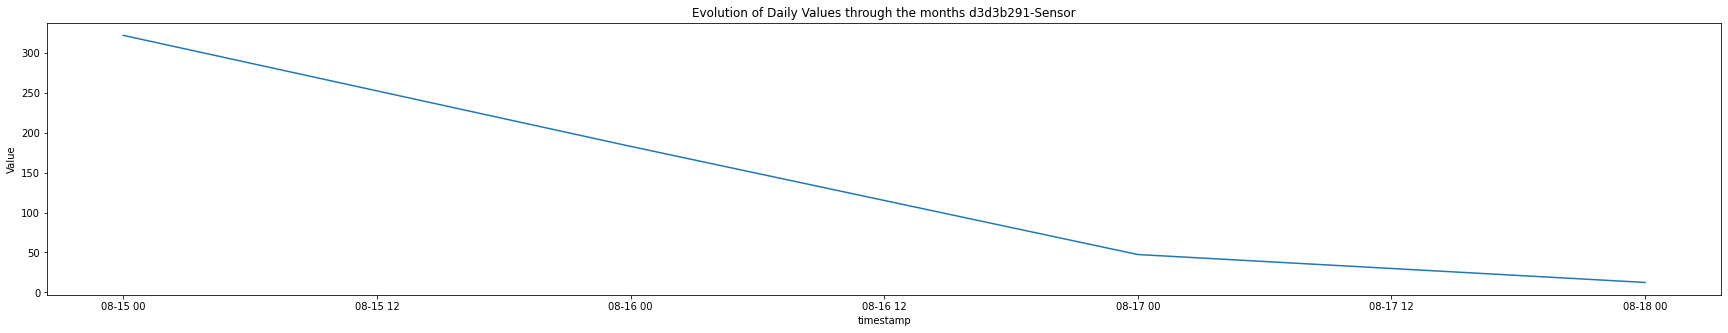

In [76]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('d3d3b291-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d3b291-Sensor')

### sensor d3d168a0

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d168a0-Sensor')

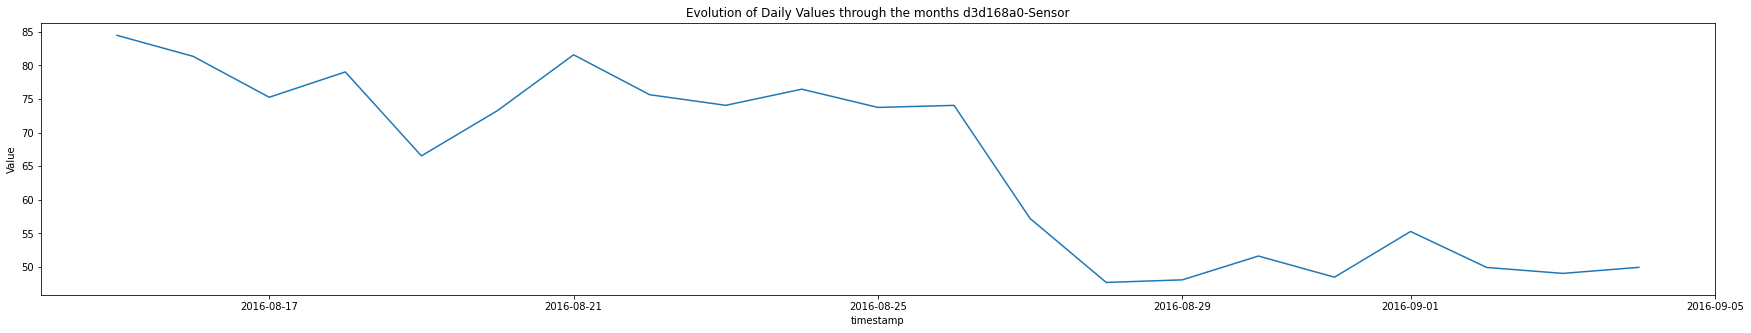

In [77]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('d3d168a0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d168a0-Sensor')

### sensor d3d33d60

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d33d60-Sensor')

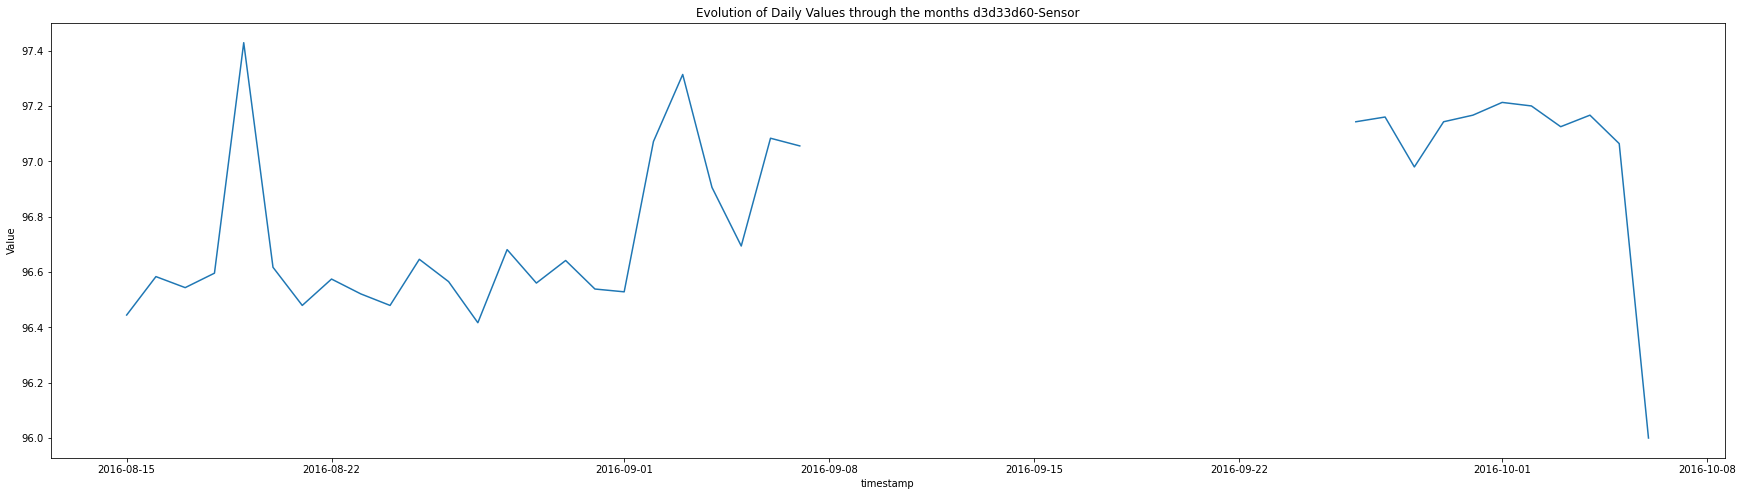

In [78]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d33d60-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d33d60-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d33d60-Sensor')

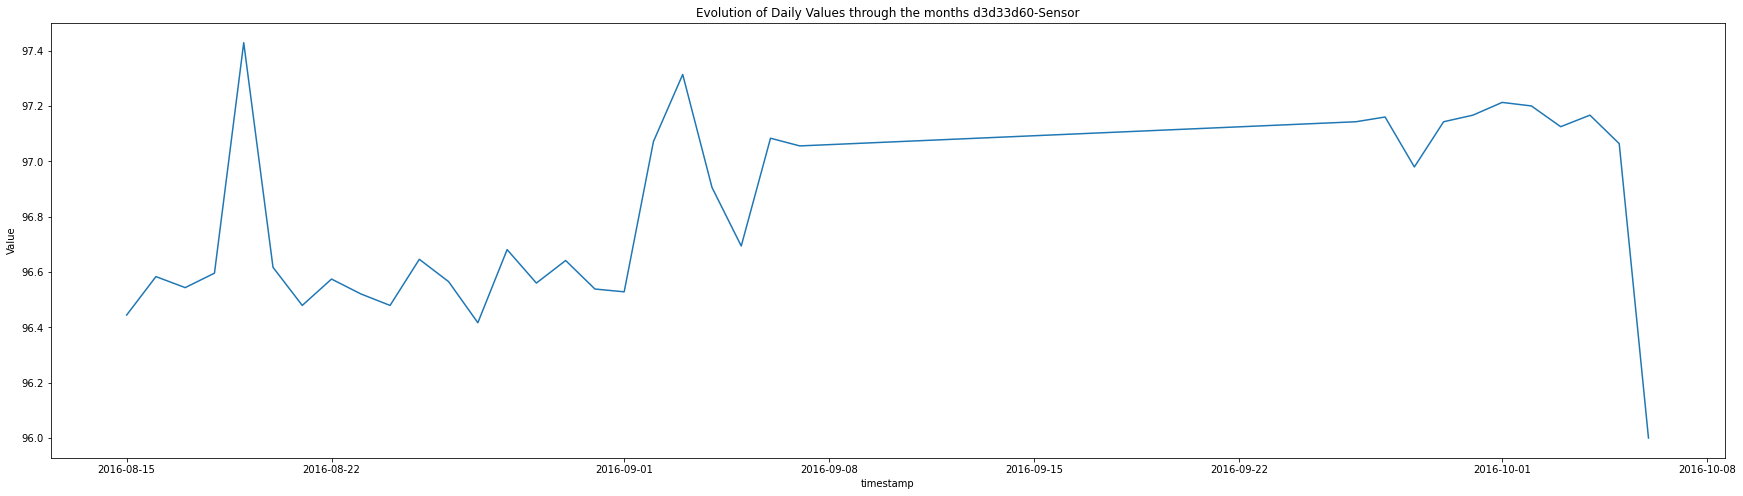

In [79]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d33d60-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d33d60-Sensor')

### sensor d3d3b290

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d3b290-Sensor')

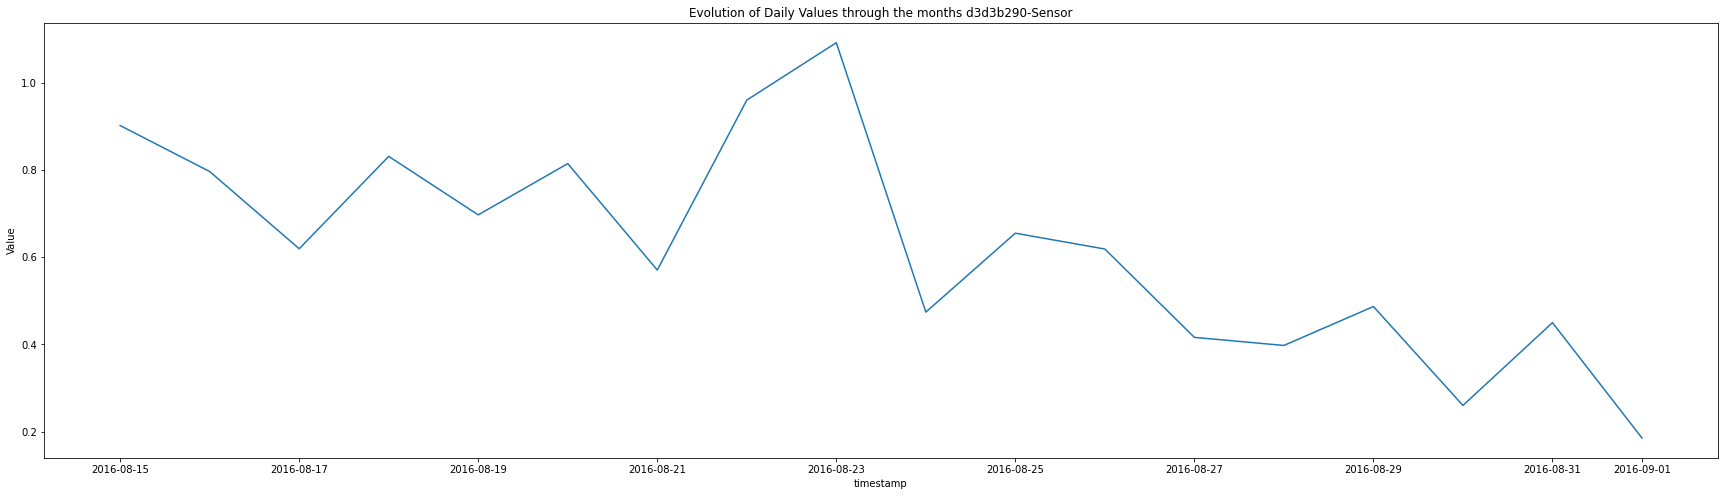

In [80]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d3b290-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d3b290-Sensor')

### sensor d3d3b290

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d3b290-Sensor')

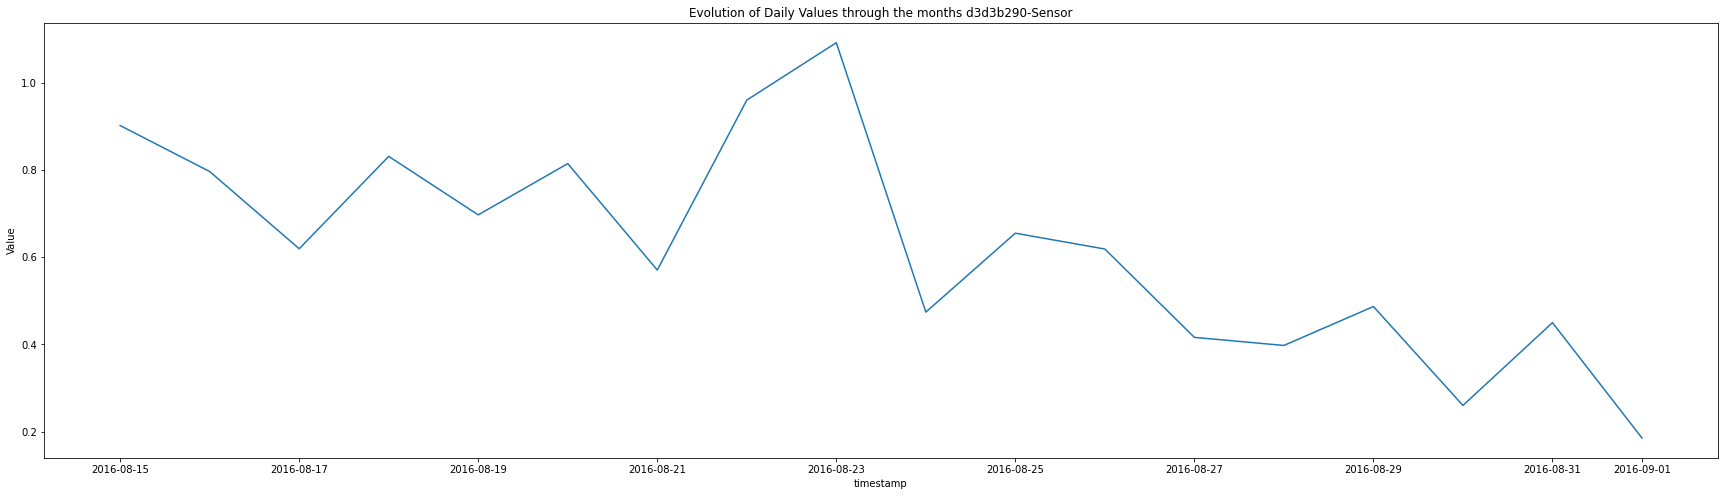

In [81]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d3b290-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d3b290-Sensor')

### sensor d3d53930

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d53930-Sensor')

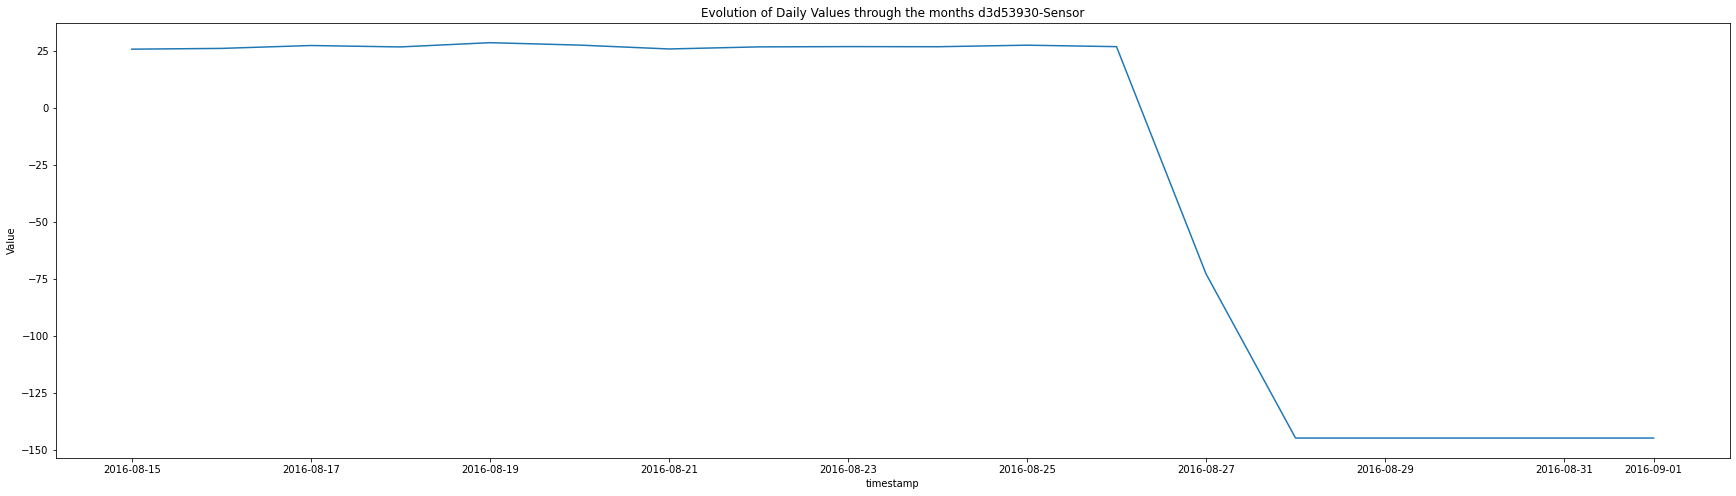

In [82]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d53930-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d53930-Sensor')

### sensor d3d56040

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d56040-Sensor')

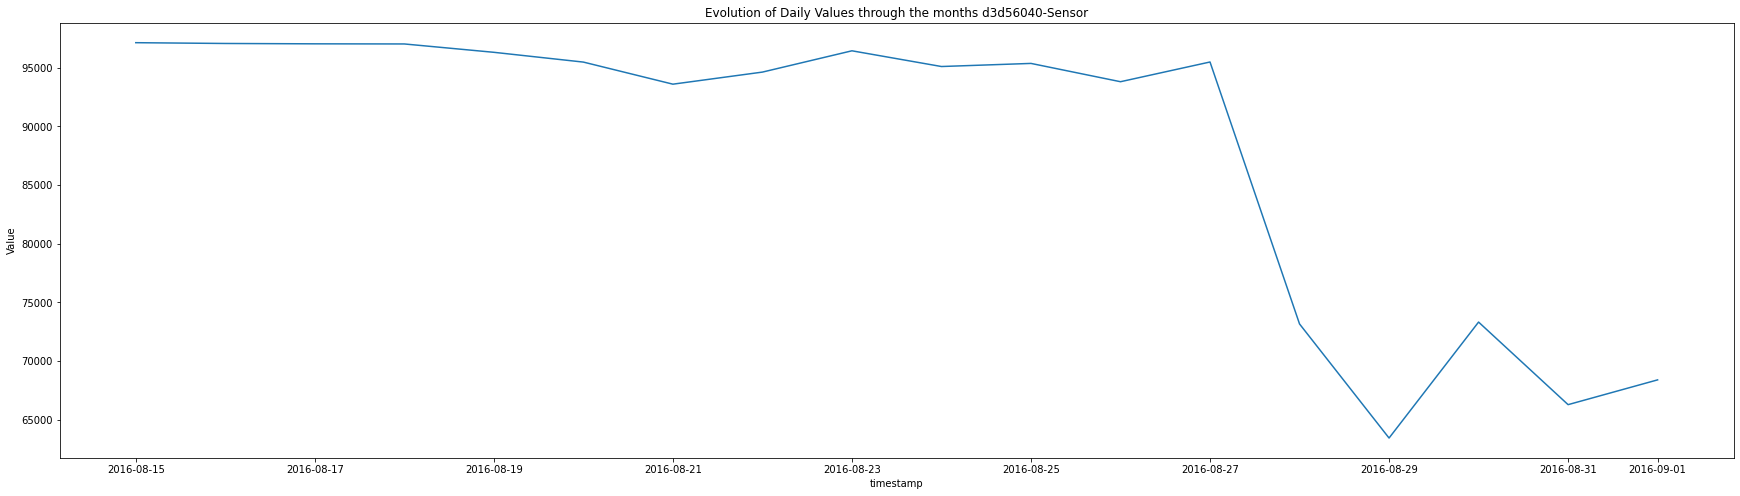

In [83]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d56040-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d56040-Sensor')

### sensor d3d698c0

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d698c0-Sensor')

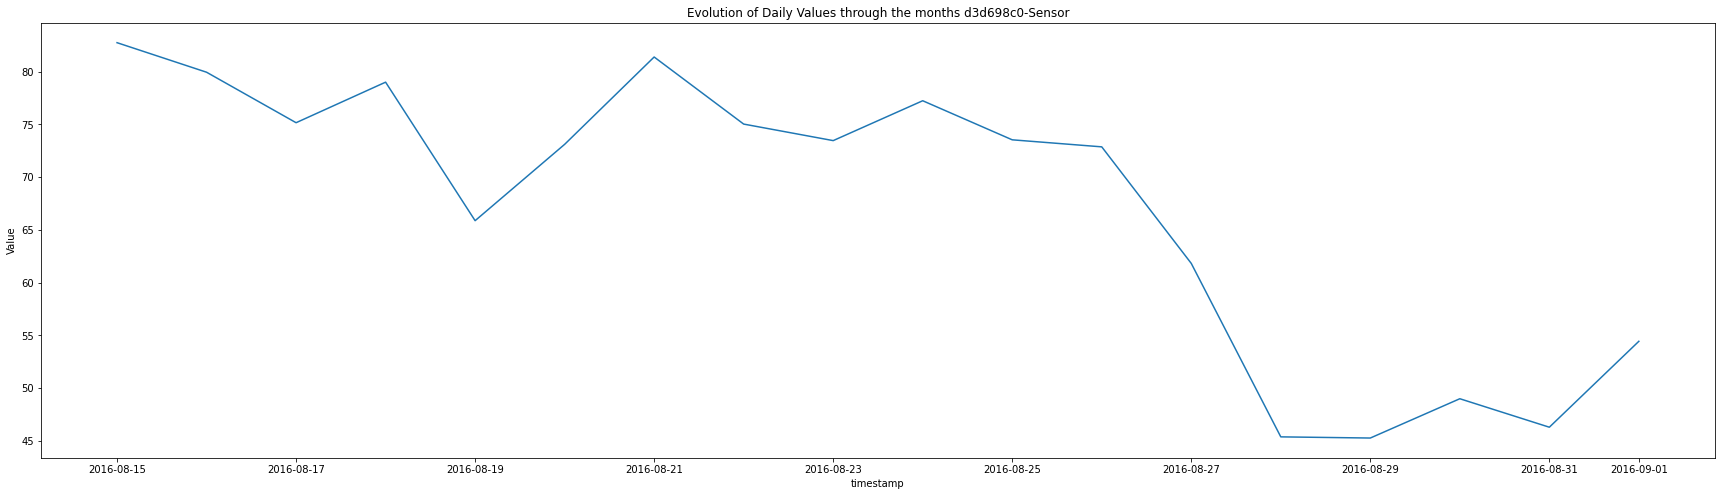

In [84]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d698c0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d698c0-Sensor')

### sensor d3d73500

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d73500-Sensor')

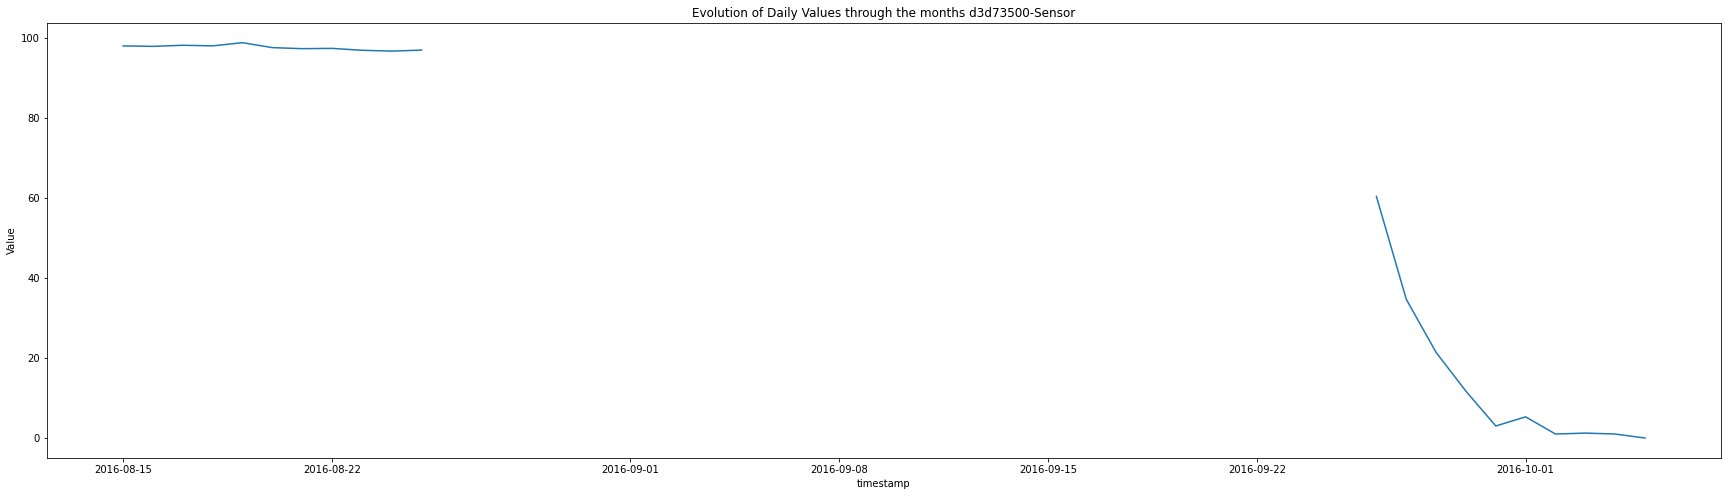

In [85]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d73500-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d73500-Sensor')

##### Plot without missing values

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d73500-Sensor')

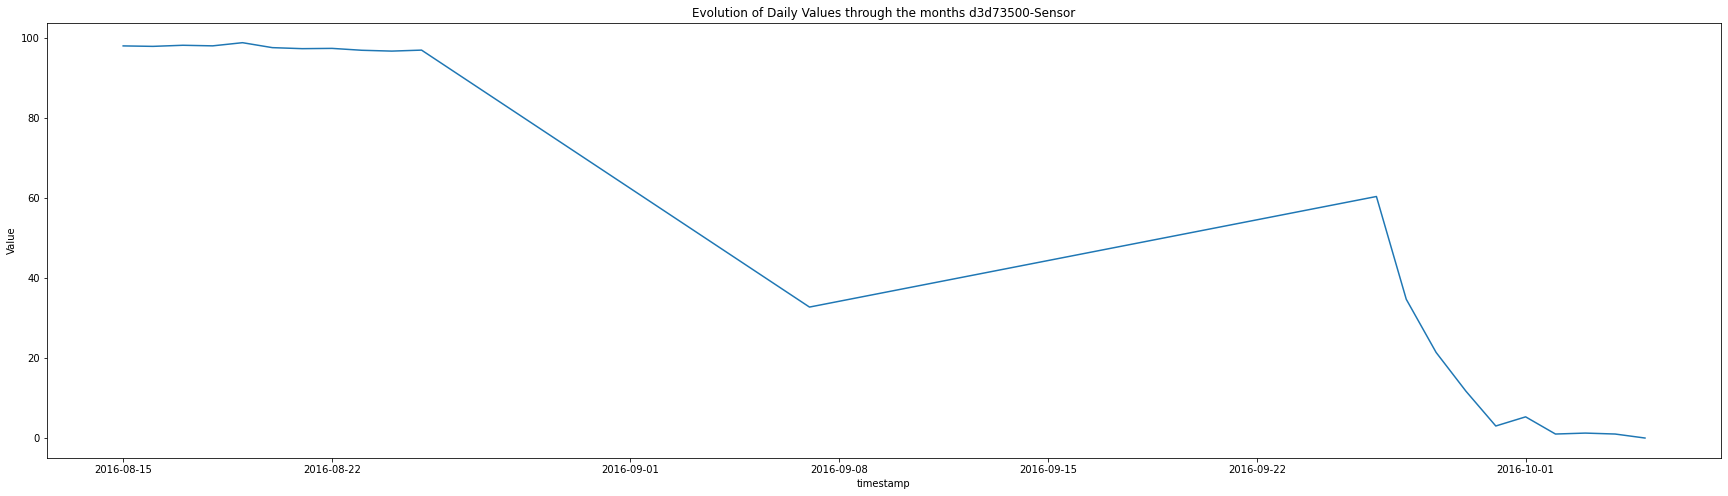

In [86]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d73500-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor.dropna(inplace=True)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d73500-Sensor')

### sensor d3d7d140

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d7d140-Sensor')

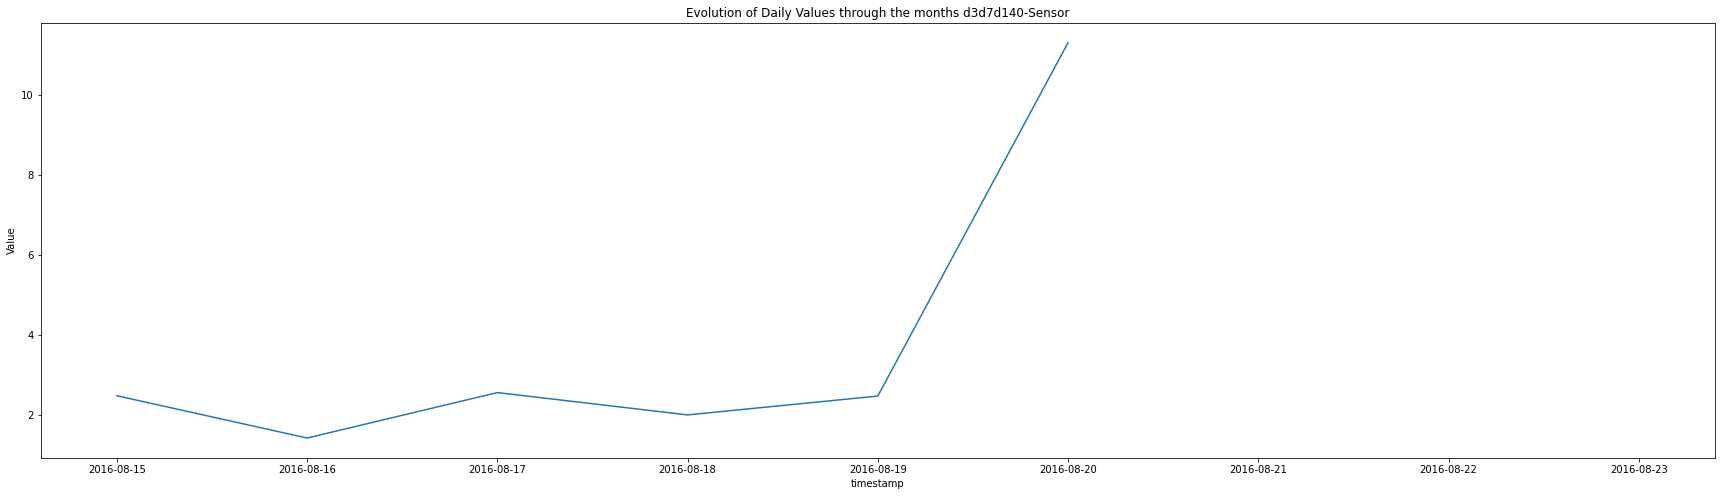

In [87]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d7d140-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d7d140-Sensor')

### sensor d3d909c0

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d909c0-Sensor')

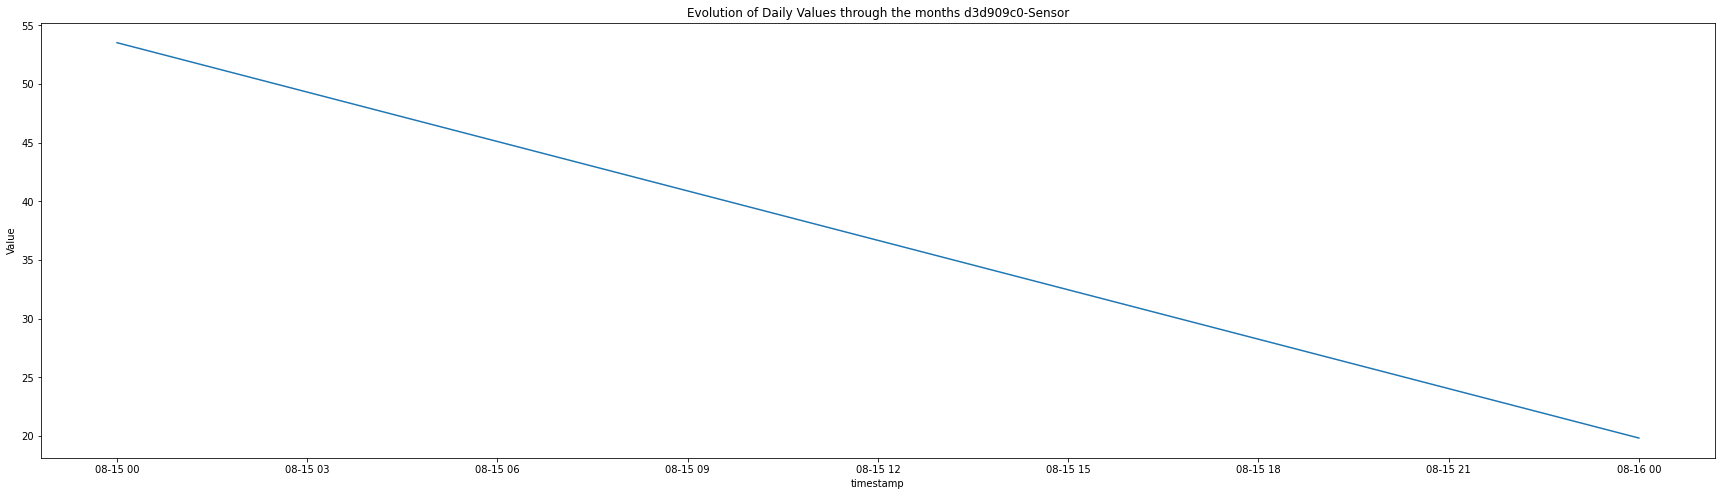

In [88]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d909c0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d909c0-Sensor')

### sensor d3d909c1

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3d909c1-Sensor')

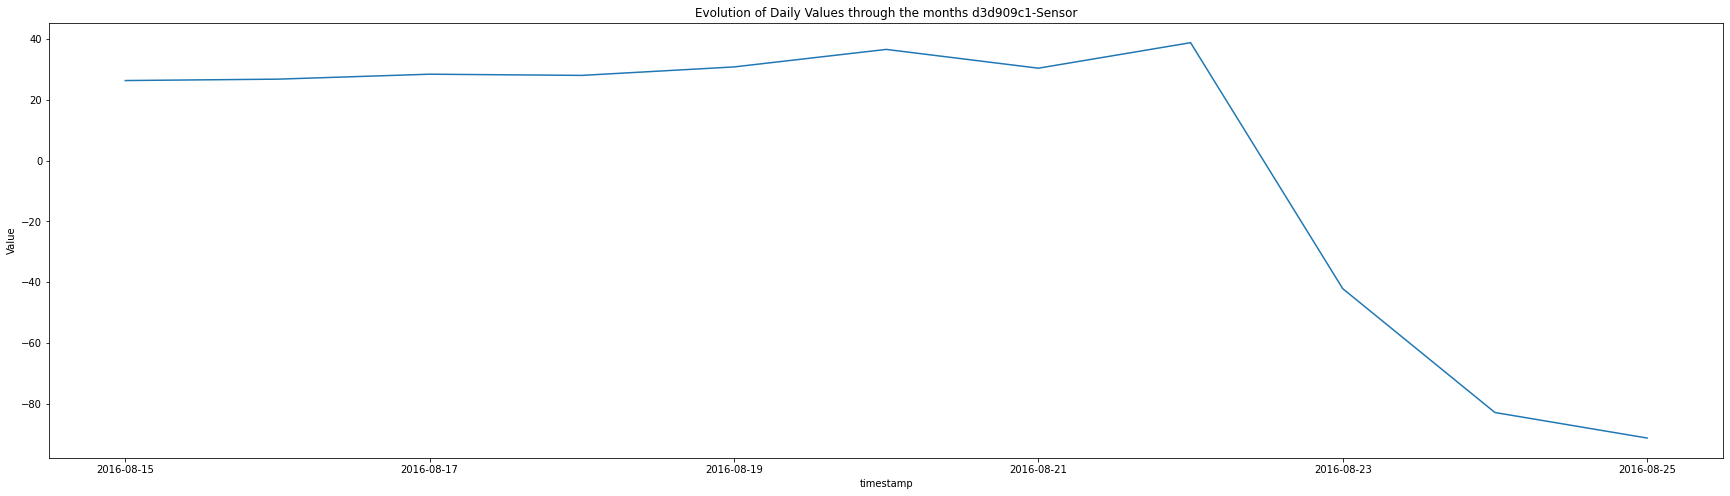

In [89]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3d909c1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3d909c1-Sensor')

### sensor d3db53b0

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3db53b0-Sensor')

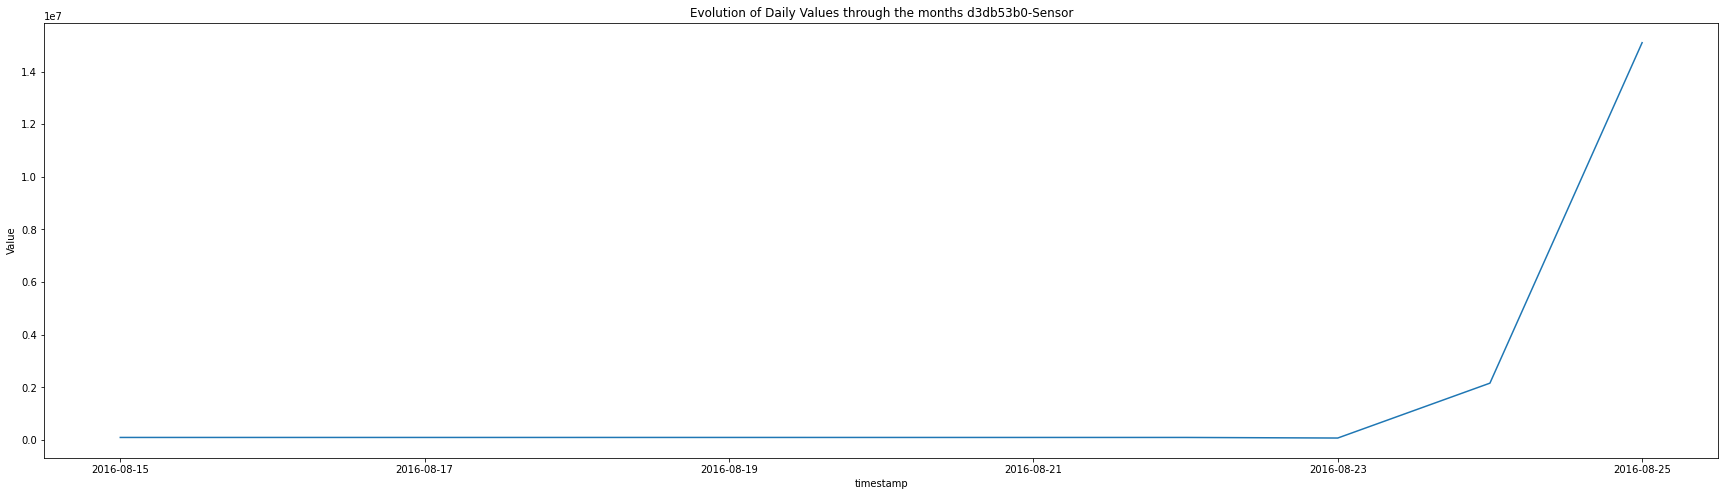

In [90]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3db53b0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3db53b0-Sensor')

### sensor d3db2ca0

Text(0.5, 1.0, 'Evolution of Daily Values through the months d3db2ca0-Sensor')

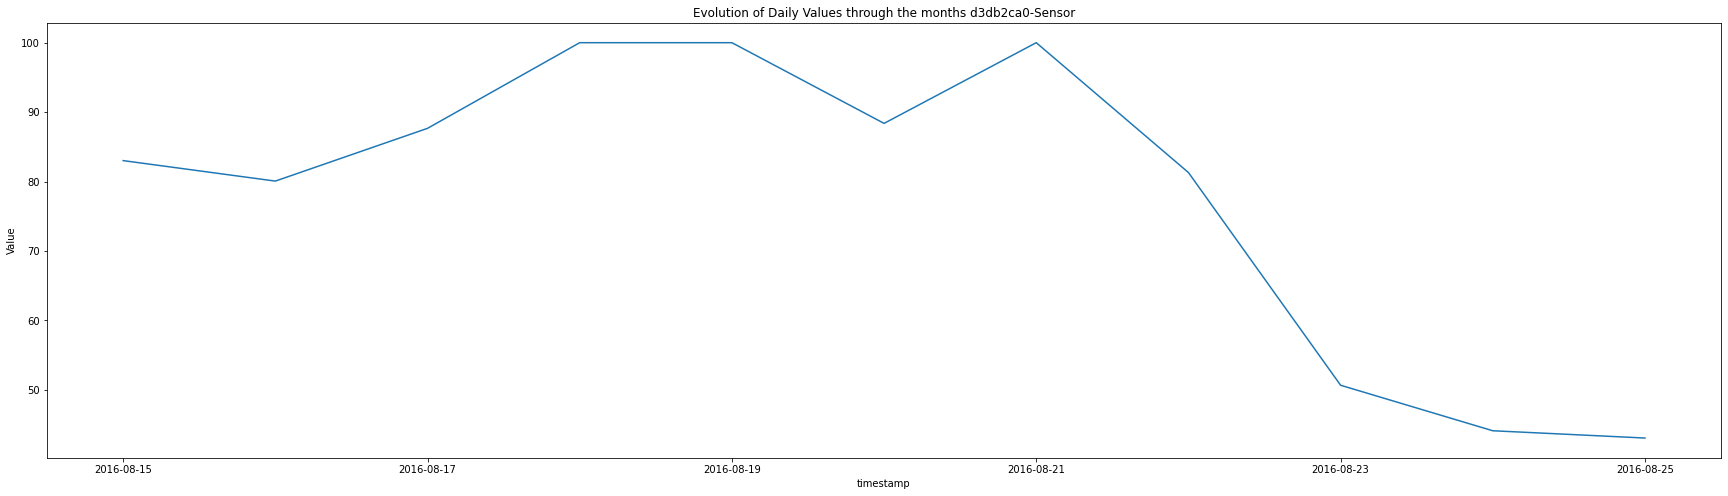

In [91]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('d3db2ca0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months d3db2ca0-Sensor')

### sensor e6678e90

Text(0.5, 1.0, 'Evolution of Daily Values through the months e6678e90-Sensor')

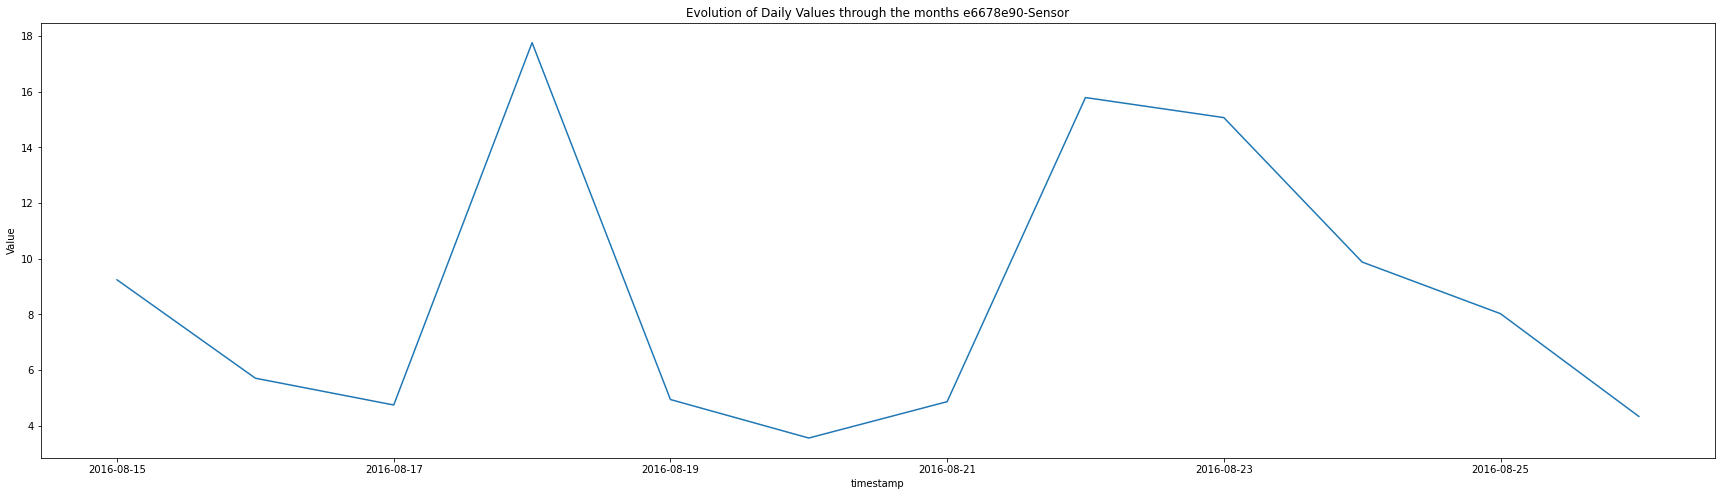

In [92]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('e6678e90-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months e6678e90-Sensor')

### sensor e6678e91

Text(0.5, 1.0, 'Evolution of Daily Values through the months e6678e91-Sensor')

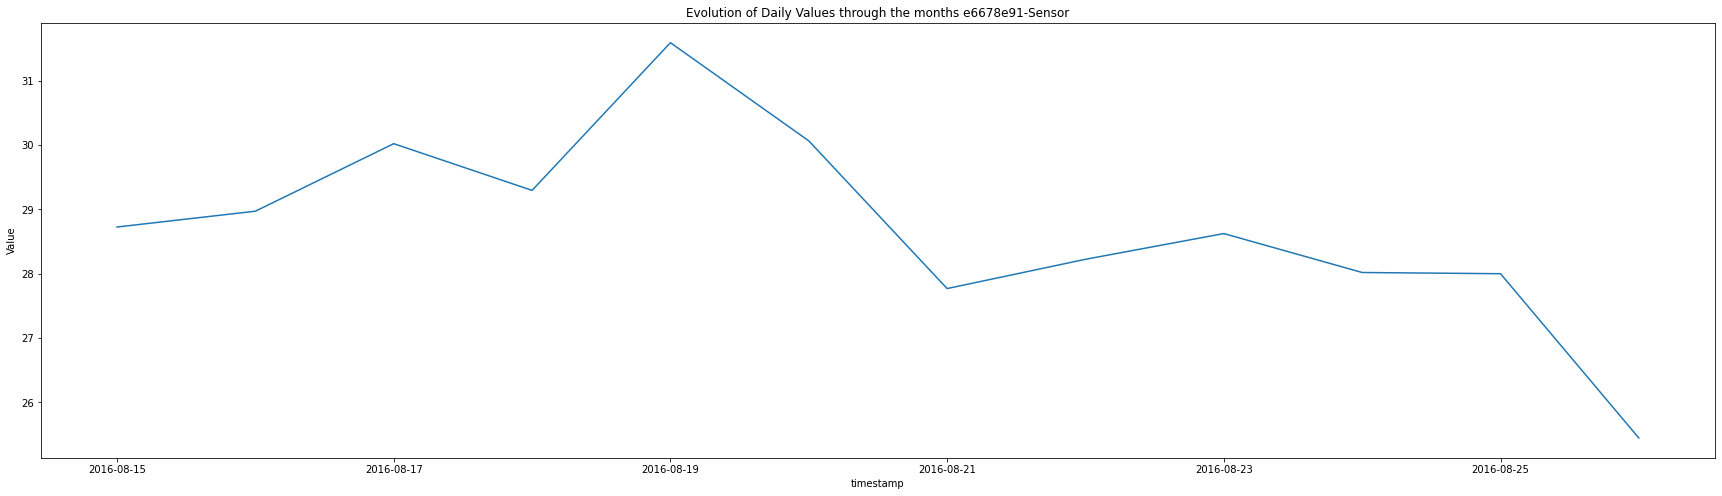

In [93]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('e6678e91-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months e6678e91-Sensor')

### sensor e66592c0

Text(0.5, 1.0, 'Evolution of Daily Values through the months e66592c0-Sensor')

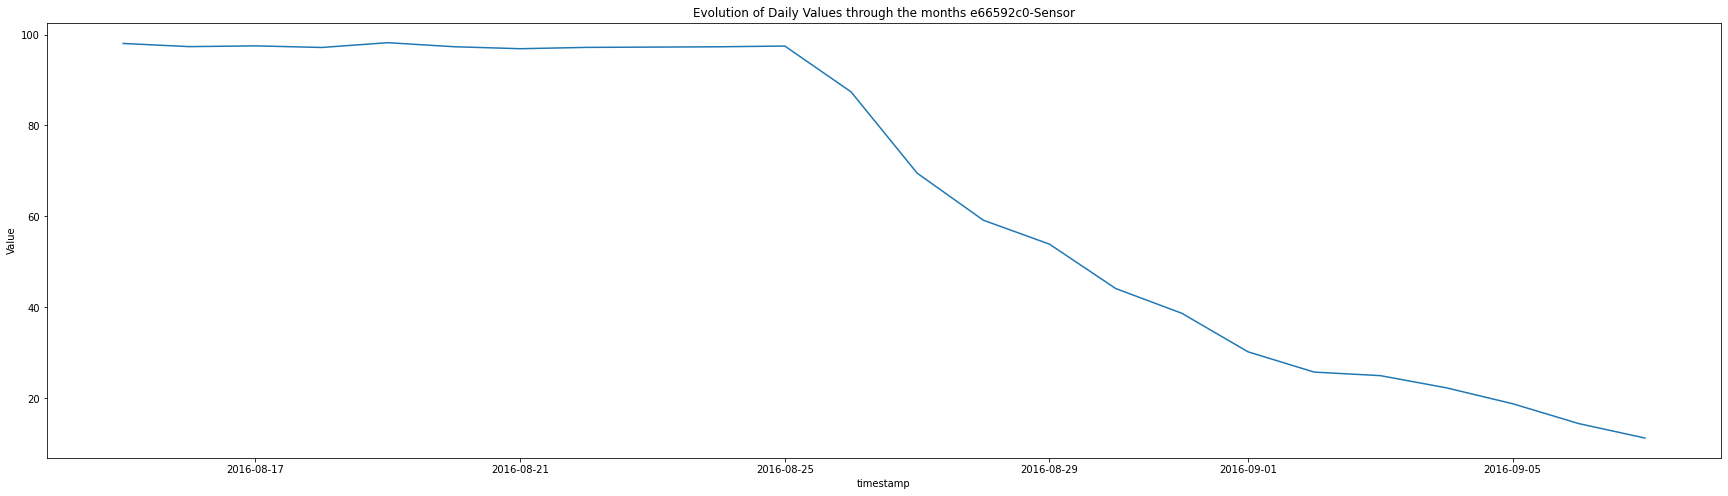

In [94]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('e66592c0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months e66592c0-Sensor')

### sensor e6691530

Text(0.5, 1.0, 'Evolution of Daily Values through the months e6691530-Sensor')

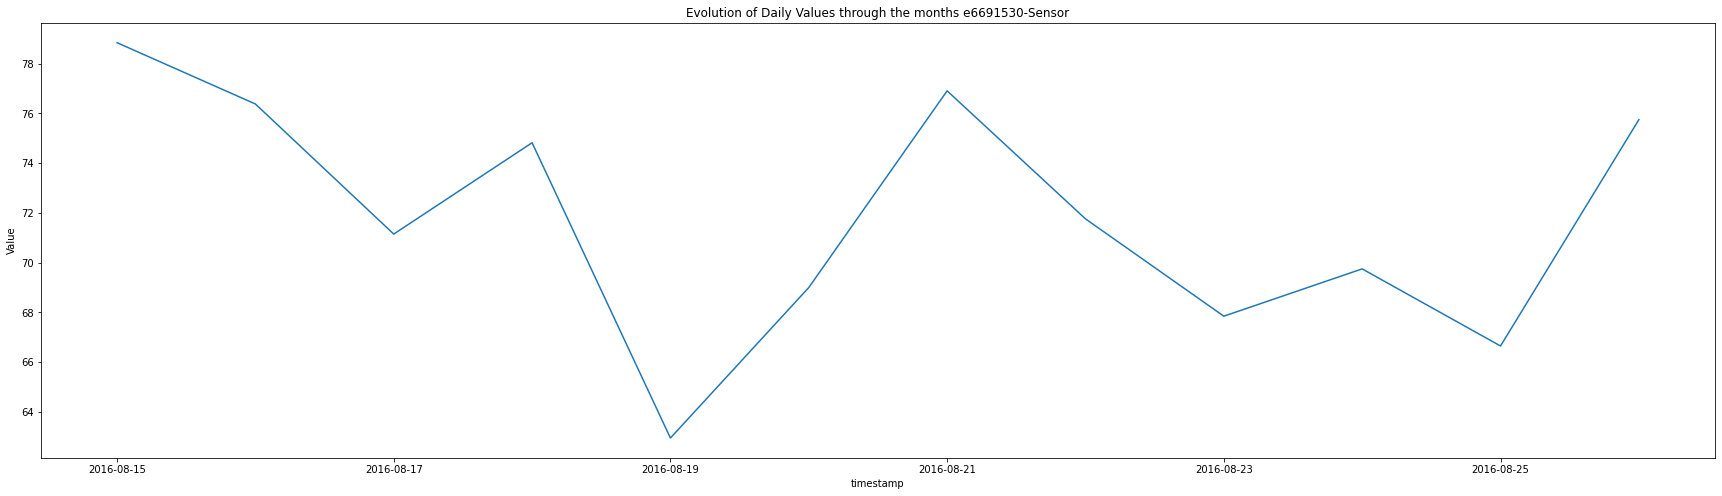

In [95]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('e6691530-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months e6691530-Sensor')

### sensor e66851e1

Text(0.5, 1.0, 'Evolution of Daily Values through the months e66851e1-Sensor')

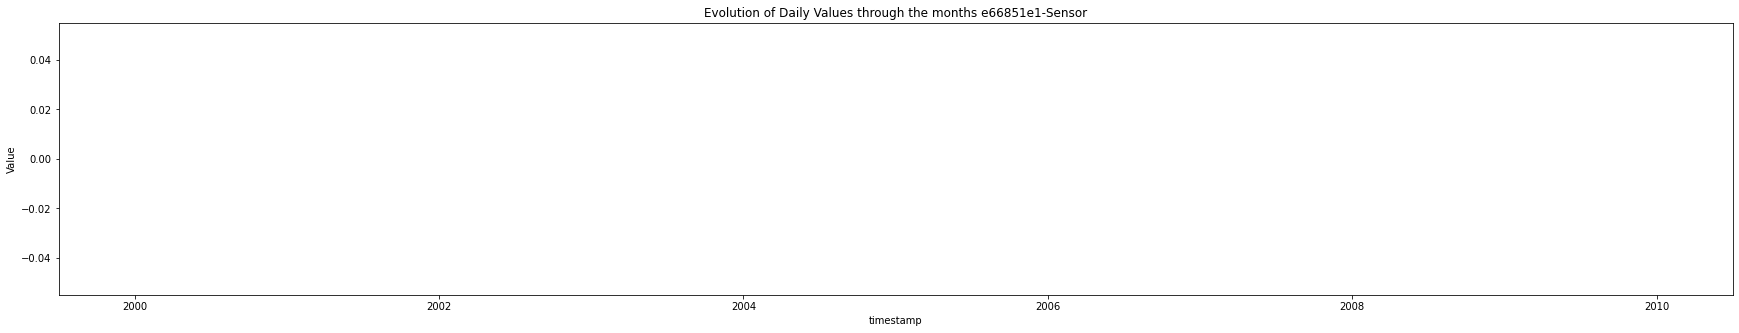

In [96]:
plt.figure(figsize=(30,5))
plt.subplot(1,1,1)
sensor = get_sensor('e66851e1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months e66851e1-Sensor')

### sensor e66851e0

Text(0.5, 1.0, 'Evolution of Daily Values through the months e66851e0-Sensor')

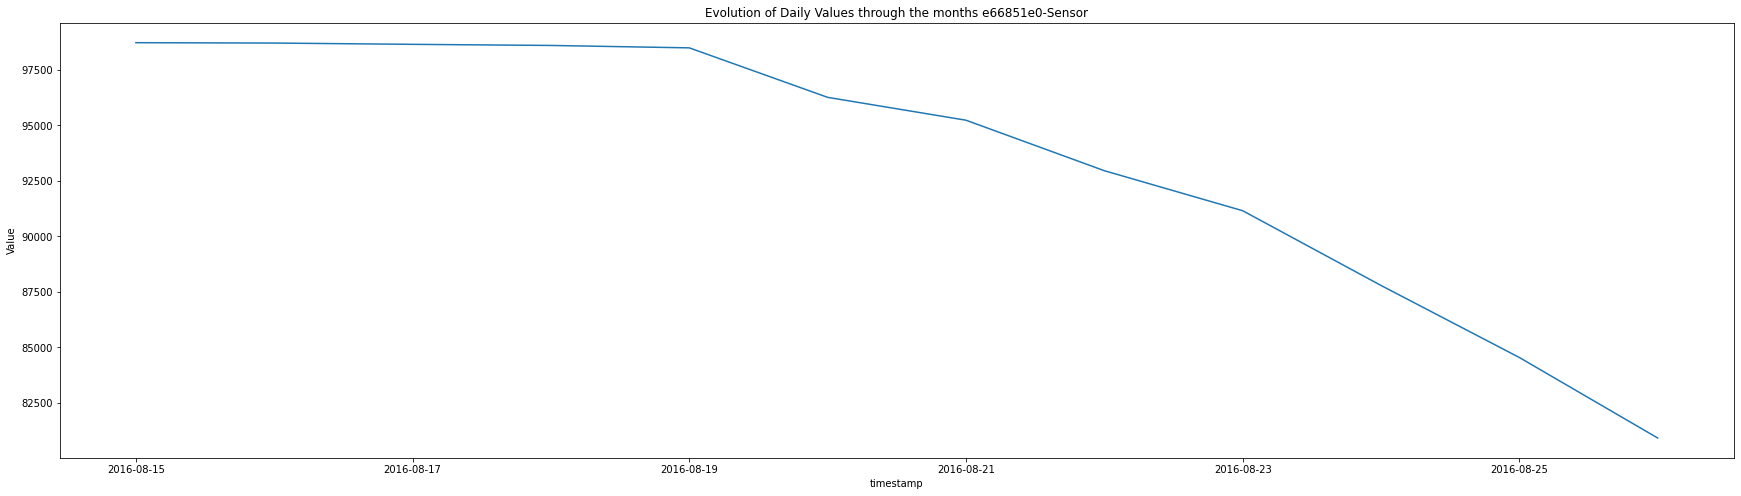

In [97]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('e66851e0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months e66851e0-Sensor')

### sensor c5e80c70

Text(0.5, 1.0, 'Evolution of Daily Values through the months c5e80c70-Sensor')

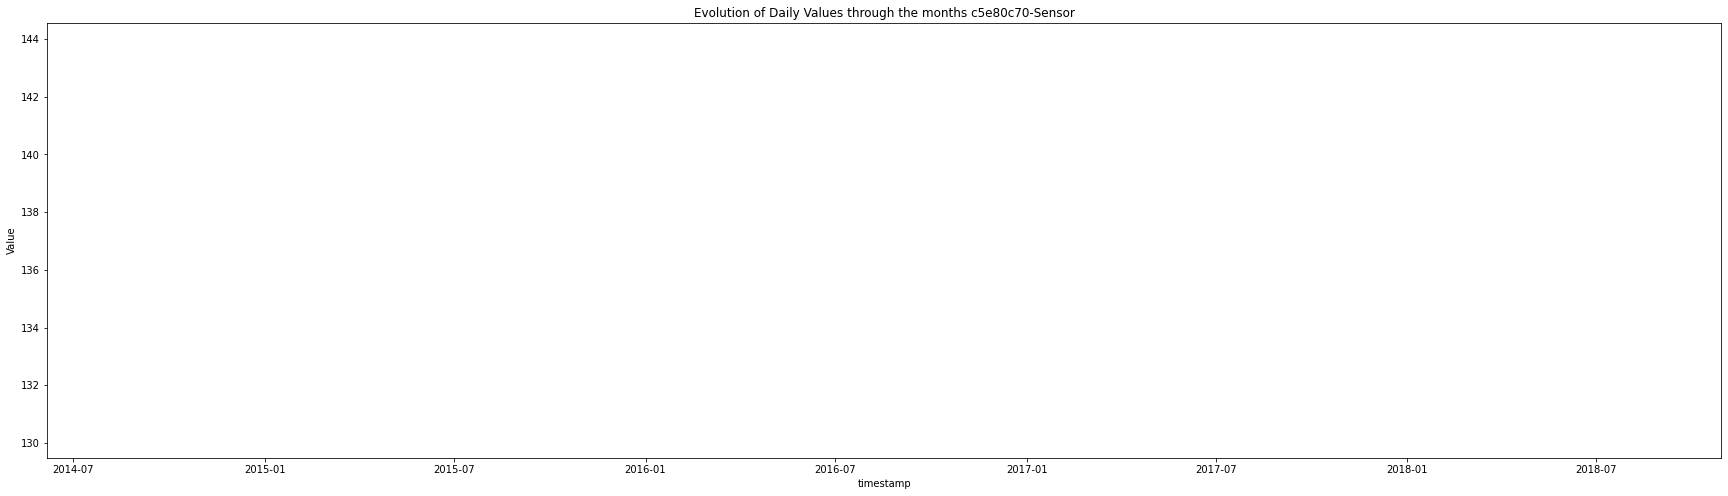

In [98]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('c5e80c70-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c5e80c70-Sensor')

### sensor c5e685d0

Text(0.5, 1.0, 'Evolution of Daily Values through the months c5e685d0-Sensor')

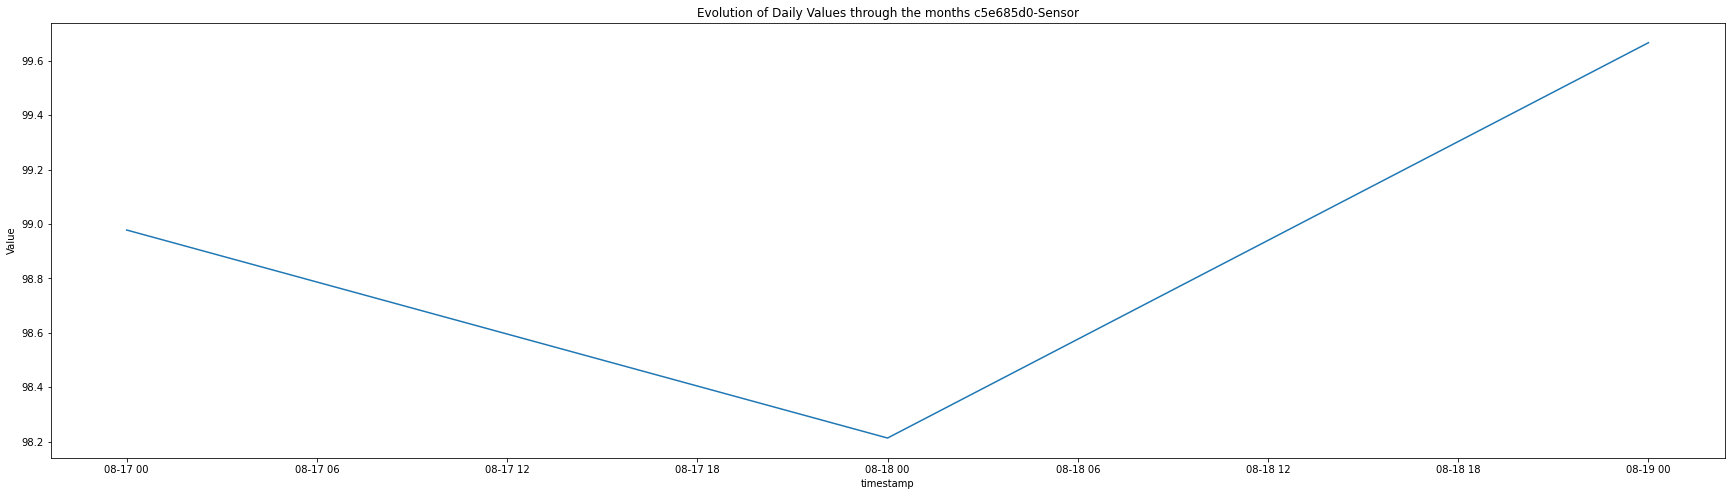

In [99]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('c5e685d0-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c5e685d0-Sensor')

### sensor c5e9ba20

Text(0.5, 1.0, 'Evolution of Daily Values through the months c5e9ba20-Sensor')

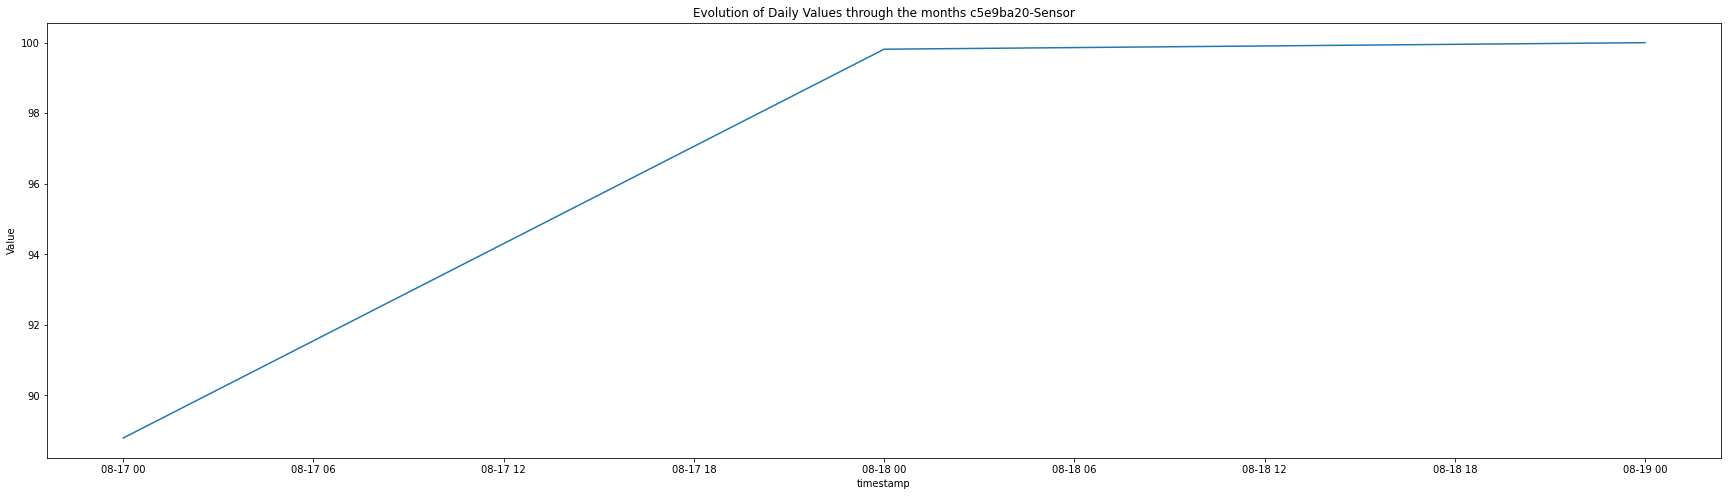

In [100]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('c5e9ba20-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c5e9ba20-Sensor')

### sensor c5e881a1

Text(0.5, 1.0, 'Evolution of Daily Values through the months c5e881a1-Sensor')

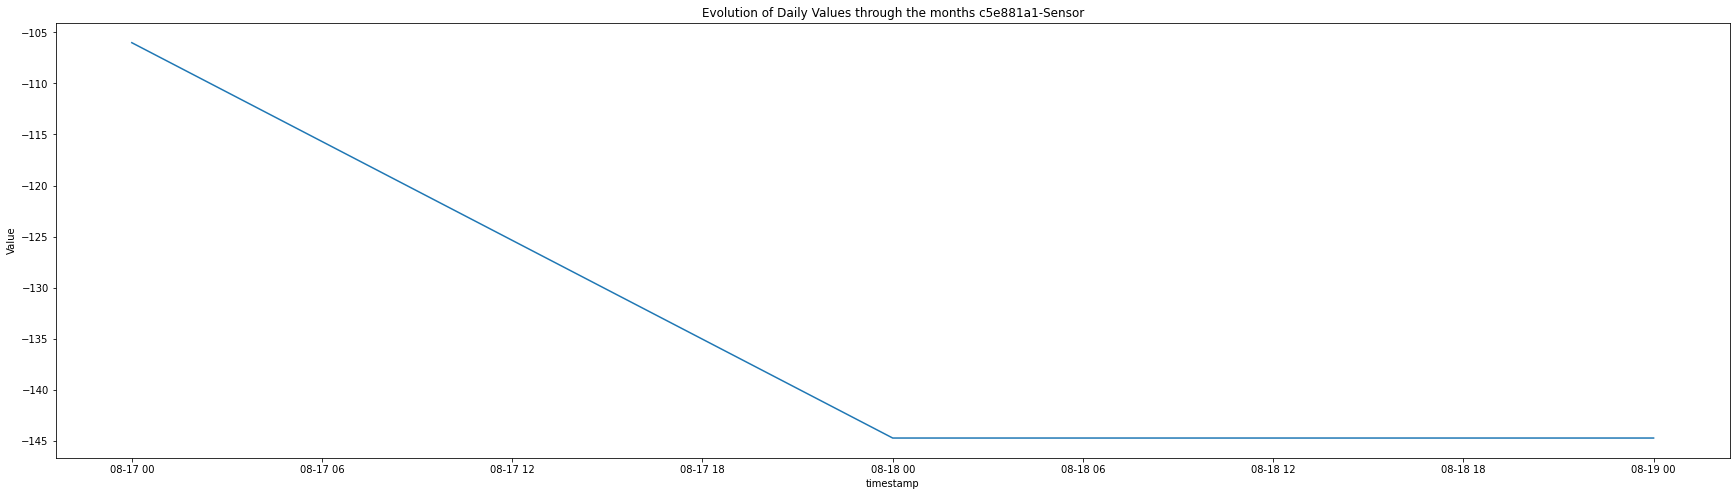

In [101]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('c5e881a1-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c5e881a1-Sensor')

### sensor c5e881a0

Text(0.5, 1.0, 'Evolution of Daily Values through the months c5e881a0-Sensor')

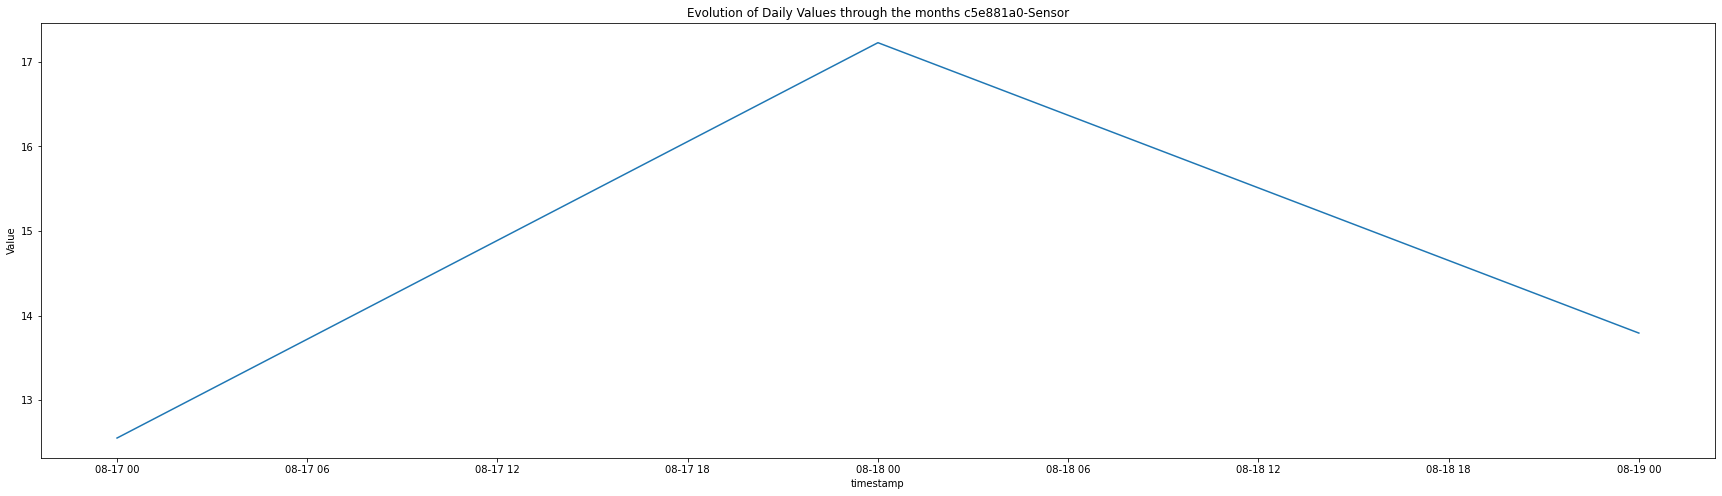

In [102]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('c5e881a0-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c5e881a0-Sensor')

In [103]:
sensor = get_sensor('c5e881a0-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
sensor

value
timestamp                           
2016-08-17 00:00:00+00:00  12.552044
2016-08-18 00:00:00+00:00  17.225652
2016-08-19 00:00:00+00:00  13.792833

### sensor c5e881a0

Text(0.5, 1.0, 'Evolution of Daily Values through the months c5e881a0-Sensor')

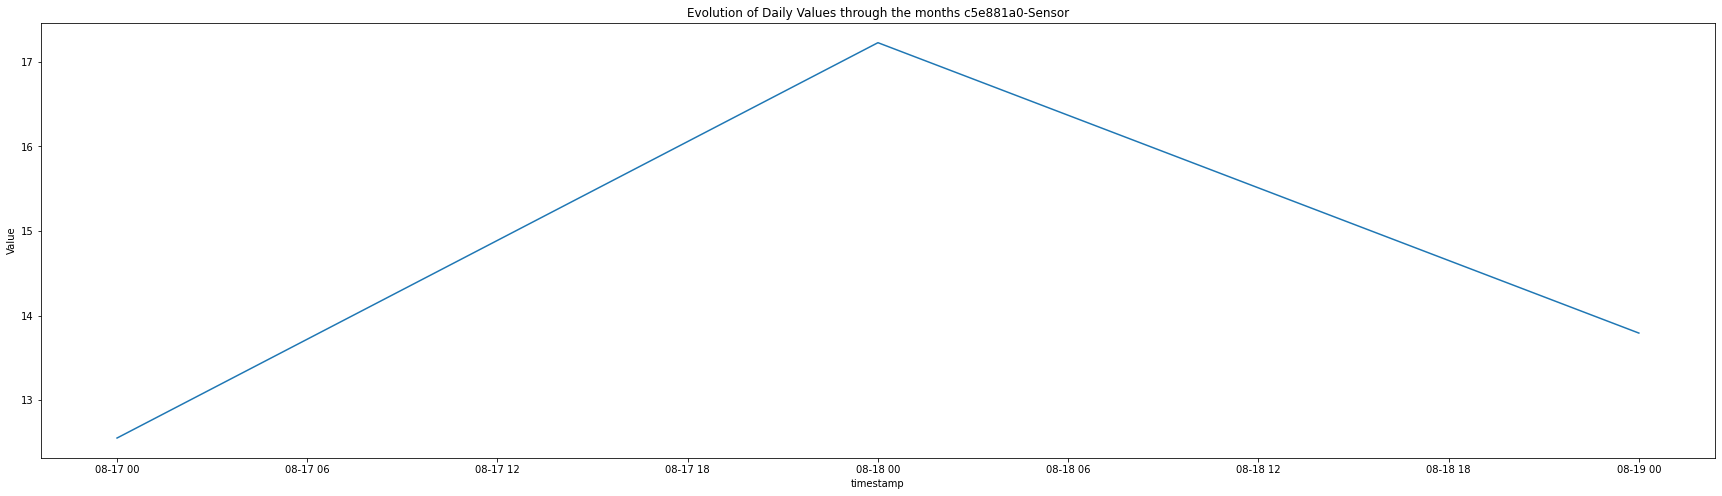

In [104]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('c5e881a0-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months c5e881a0-Sensor')

### sensor 1248ff60

Text(0.5, 1.0, 'Evolution of Daily Values through the months 1248ff60-Sensor')

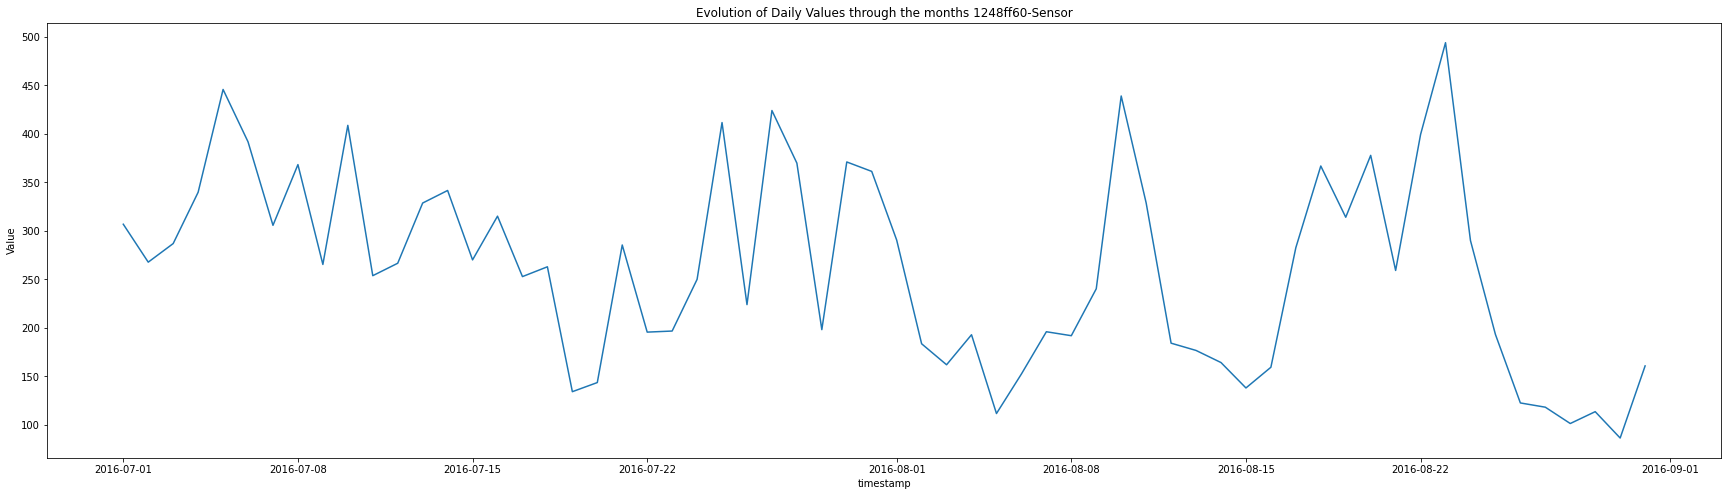

In [105]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
sensor = get_sensor('1248ff60-e707-11e6-89c8-314aa4f67f8c')
sensor = sensor_daily_sample(sensor)
custom_plot(x = sensor.index, y= sensor['value'])
plt.title('Evolution of Daily Values through the months 1248ff60-Sensor')

### 3.0 Descriptive Analysis One data frame at a time **

You have two data frames: `sensors` and `types` Merge each sensors with its type. (Hint: Use `pd.merge()`)

Question: What does this achieve? Why should we do this?

### Merge Dataframes

In [106]:
# Merge datatypes and sensors data
type_sensors = pd.merge(df_datatypes, df_sensors, on='data_type_id')
type_sensors

data_type_id         type     si_unit type_id  \
0   35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature     celcius     TCA   
1   35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature     celcius     TCA   
2   35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature     celcius     TCA   
3   35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature     celcius     TCA   
4   35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature     celcius     TCA   
..                                   ...          ...         ...     ...   
56  35dcdad2-8679-11e6-bda3-ef77801087ee      battery  percentage     BAT   
57  35dcdad2-8679-11e6-bda3-ef77801087ee      battery  percentage     BAT   
58  35dcdad2-8679-11e6-bda3-ef77801087ee      battery  percentage     BAT   
59  35dcdad2-8679-11e6-bda3-ef77801087ee      battery  percentage     BAT   
60  ed5edee0-e701-11e6-83c1-01ce06e6d17f         RSAM      counts    RSAM   

                               sensor_id description  data_frequency   status  \
0   763ca6f0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1   c15a6371-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
2   7644bd40-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
3   c15f9391-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
4   763bbc90-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
..                                   ...         ...             ...      ...   
56  7635f030-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
57  e66592c0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
58  d3d33d60-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
59  d3d73500-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
60  1248ff60-e707-11e6-89c8-314aa4f67f8c          \N         1800000  OFFLINE   

                  created_at                       updated_at  \
0  2016-08-03 04:39:25+00:00 2016-09-29 20:13:52.803000+00:00   
1  2016-08-07 00:51:40+00:00 2016-09-29 20:13:52.836000+00:00   
2  2016-08-03 22:09:40+00:00 2016-09-29 19:20:17.417000+00:00   
3  2016-08-10 04:20:22+00:00 2016-09-29 19:20:17.516000+00:00   
4  2016-08-03 21:50:32+00:00 2016-09-30 18:12:04.578000+00:00   
..                       ...                              ...   
56 2016-08-03 21:50:32+00:00 2016-10-07 07:43:04.976000+00:00   
57 2016-08-15 08:46:05+00:00 2016-09-29 20:13:52.876000+00:00   
58 2016-08-15 05:31:29+00:00 2016-10-07 07:43:04.977000+00:00   
59 2016-08-15 06:10:39+00:00 2016-10-05 12:42:18.933000+00:00   
60 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   

                                 node_id  
0   762b8ff0-8679-11e6-a353-2f6c041e2491  
1   c147ece0-8679-11e6-a353-2f6c041e2491  
2   76309900-8679-11e6-a353-2f6c041e2491  
3   c14ccee0-8679-11e6-a353-2f6c041e2491  
4   762c5340-8679-11e6-a353-2f6c041e2491  
..                                   ...  
56  762c5340-8679-11e6-a353-2f6c041e2491  
57  e662fab0-8679-11e6-a353-2f6c041e2491  
58  d3cb7530-8679-11e6-a353-2f6c041e2491  
59  d3cbc350-8679-11e6-a353-2f6c041e2491  
60  ede3ed60-e701-11e6-83c1-01ce06e6d17f  

[61 rows x 11 columns]

#### What does this achieve?

With this, we obtain a great view of information related to sensors, their types, unity in which each sensor produces data, and types of data obtain by each sensor. 

#### Why should we do this?


##### 3.2: How many sensors of each type are there?

In [107]:
# Check value counts of the sensors. There are 7 types of each sensors.
type_sensors['type_id'].value_counts()

TCA       10
GP_H2S    10
HUMA      10
BAT       10
GP_CO2    10
PA        10
RSAM       1
Name: type_id, dtype: int64

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

Now take the raw `data` data frame and merge it with all the `sensors` and their types.

In [108]:
s2 = pd.merge(df_sensors, df_datatypes, left_on='data_type_id', right_on='data_type_id')
s2

sensor_id description  data_frequency   status  \
0   c15a6370-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1   7636da90-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
2   76427351-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
3   763701a1-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
4   c15fbaa0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
..                                   ...         ...             ...      ...   
56  e6691530-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
57  d3d168a0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
58  d3d698c0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
59  d3db2ca0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
60  1248ff60-e707-11e6-89c8-314aa4f67f8c          \N         1800000  OFFLINE   

                  created_at                       updated_at  \
0  2016-08-07 00:51:40+00:00 2016-09-29 19:41:07.066000+00:00   
1  2016-08-03 21:50:32+00:00 2016-09-30 18:12:04.577000+00:00   
2  2016-08-03 22:09:40+00:00 2016-09-29 19:20:17.416000+00:00   
3  2016-08-03 04:39:25+00:00 2016-09-29 19:20:17.431000+00:00   
4  2016-08-10 04:20:22+00:00 2016-09-29 19:20:17.523000+00:00   
..                       ...                              ...   
56 2016-08-15 08:46:05+00:00 2016-09-29 20:13:52.877000+00:00   
57 2016-08-15 05:22:31+00:00 2016-09-30 18:12:04.582000+00:00   
58 2016-08-15 05:31:29+00:00 2016-09-30 18:12:04.584000+00:00   
59 2016-08-15 06:10:39+00:00 2016-09-30 18:12:04.584000+00:00   
60 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   

                            data_type_id  \
0   35dcdad0-8679-11e6-bda3-ef77801087ee   
1   35dcdad0-8679-11e6-bda3-ef77801087ee   
2   35dcdad0-8679-11e6-bda3-ef77801087ee   
3   35dcdad0-8679-11e6-bda3-ef77801087ee   
4   35dcdad0-8679-11e6-bda3-ef77801087ee   
..                                   ...   
56  35dcb3c2-8679-11e6-bda3-ef77801087ee   
57  35dcb3c2-8679-11e6-bda3-ef77801087ee   
58  35dcb3c2-8679-11e6-bda3-ef77801087ee   
59  35dcb3c2-8679-11e6-bda3-ef77801087ee   
60  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                 node_id                          type  \
0   c147ece0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
1   762c5340-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
2   76309900-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
3   762b8ff0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
4   c14ccee0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
..                                   ...                           ...   
56  e662fab0-8679-11e6-a353-2f6c041e2491                      humidity   
57  d3ca3cb0-8679-11e6-a353-2f6c041e2491                      humidity   
58  d3cb7530-8679-11e6-a353-2f6c041e2491                      humidity   
59  d3cbc350-8679-11e6-a353-2f6c041e2491                      humidity   
60  ede3ed60-e701-11e6-83c1-01ce06e6d17f                          RSAM   

              si_unit type_id  
0                 ppm  GP_CO2  
1                 ppm  GP_CO2  
2                 ppm  GP_CO2  
3                 ppm  GP_CO2  
4                 ppm  GP_CO2  
..                ...     ...  
56  relative humidity    HUMA  
57  relative humidity    HUMA  
58  relative humidity    HUMA  
59  relative humidity    HUMA  
60             counts    RSAM  

[61 rows x 11 columns]

In [109]:
full1 = pd.merge(df_datapoints, s2, on='sensor_id')
full1

data_point_id  value                 timestamp  \
0       764c5e60-8679-11e6-a353-2f6c041e2491   98.0 2016-08-03 04:39:25+00:00   
1       765251d0-8679-11e6-a353-2f6c041e2491   98.0 2016-08-03 04:47:41+00:00   
2       7655fb50-8679-11e6-a353-2f6c041e2491   98.0 2016-08-03 05:08:52+00:00   
3       7659cbe0-8679-11e6-a353-2f6c041e2491   98.0 2016-08-03 05:14:08+00:00   
4       765dea90-8679-11e6-a353-2f6c041e2491   96.0 2016-08-03 05:28:55+00:00   
...                                      ...    ...                       ...   
176529  39e16940-e707-11e6-89c8-314aa4f67f8c  125.0 2016-08-31 19:00:01+00:00   
176530  39e82000-e707-11e6-89c8-314aa4f67f8c  143.0 2016-08-31 19:50:00+00:00   
176531  39f08470-e707-11e6-89c8-314aa4f67f8c  175.0 2016-08-31 21:00:02+00:00   
176532  39f84ca0-e707-11e6-89c8-314aa4f67f8c  164.0 2016-08-31 21:50:00+00:00   
176533  39fd55b0-e707-11e6-89c8-314aa4f67f8c   89.0 2016-08-31 23:00:00+00:00   

                                   sensor_id description  data_frequency  \
0       7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000   
1       7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000   
2       7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000   
3       7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000   
4       7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000   
...                                      ...         ...             ...   
176529  1248ff60-e707-11e6-89c8-314aa4f67f8c          \N         1800000   
176530  1248ff60-e707-11e6-89c8-314aa4f67f8c          \N         1800000   
176531  1248ff60-e707-11e6-89c8-314aa4f67f8c          \N         1800000   
176532  1248ff60-e707-11e6-89c8-314aa4f67f8c          \N         1800000   
176533  1248ff60-e707-11e6-89c8-314aa4f67f8c          \N         1800000   

         status                created_at                       updated_at  \
0       OFFLINE 2016-08-03 04:39:25+00:00 2016-09-29 20:13:52.793000+00:00   
1       OFFLINE 2016-08-03 04:39:25+00:00 2016-09-29 20:13:52.793000+00:00   
2       OFFLINE 2016-08-03 04:39:25+00:00 2016-09-29 20:13:52.793000+00:00   
3       OFFLINE 2016-08-03 04:39:25+00:00 2016-09-29 20:13:52.793000+00:00   
4       OFFLINE 2016-08-03 04:39:25+00:00 2016-09-29 20:13:52.793000+00:00   
...         ...                       ...                              ...   
176529  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176530  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176531  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176532  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   
176533  OFFLINE 2016-07-01 00:00:31+00:00 2017-01-30 16:24:05.832000+00:00   

                                data_type_id  \
0       35dcdad2-8679-11e6-bda3-ef77801087ee   
1       35dcdad2-8679-11e6-bda3-ef77801087ee   
2       35dcdad2-8679-11e6-bda3-ef77801087ee   
3       35dcdad2-8679-11e6-bda3-ef77801087ee   
4       35dcdad2-8679-11e6-bda3-ef77801087ee   
...                                      ...   
176529  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176530  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176531  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176532  ed5edee0-e701-11e6-83c1-01ce06e6d17f   
176533  ed5edee0-e701-11e6-83c1-01ce06e6d17f   

                                     node_id     type     si_unit type_id  
0       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
1       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
2       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
3       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
4       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
...                                      ...      ...         ...     ...  
176529  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM  
176530  ede3ed60-e701-1

In [110]:
# Drop the unwanted data and double columns
full = full1.drop(['data_type_id','data_point_id', 'created_at', 'updated_at','description', 'status','data_frequency'], axis=1)
full

value                 timestamp                             sensor_id  \
0        98.0 2016-08-03 04:39:25+00:00  7635c920-8679-11e6-a353-2f6c041e2491   
1        98.0 2016-08-03 04:47:41+00:00  7635c920-8679-11e6-a353-2f6c041e2491   
2        98.0 2016-08-03 05:08:52+00:00  7635c920-8679-11e6-a353-2f6c041e2491   
3        98.0 2016-08-03 05:14:08+00:00  7635c920-8679-11e6-a353-2f6c041e2491   
4        96.0 2016-08-03 05:28:55+00:00  7635c920-8679-11e6-a353-2f6c041e2491   
...       ...                       ...                                   ...   
176529  125.0 2016-08-31 19:00:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176530  143.0 2016-08-31 19:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176531  175.0 2016-08-31 21:00:02+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176532  164.0 2016-08-31 21:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176533   89.0 2016-08-31 23:00:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   

                                     node_id     type     si_unit type_id  
0       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
1       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
2       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
3       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
4       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
...                                      ...      ...         ...     ...  
176529  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM  
176530  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM  
176531  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM  
176532  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM  
176533  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM  

[176534 rows x 7 columns]

In [111]:
full.isnull().sum()

value        113078
timestamp         0
sensor_id         0
node_id           0
type              0
si_unit           0
type_id           0
dtype: int64

In [112]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176534 entries, 0 to 176533
Data columns (total 7 columns):
value        63456 non-null float64
timestamp    176534 non-null datetime64[ns, UTC]
sensor_id    176534 non-null object
node_id      176534 non-null object
type         176534 non-null object
si_unit      176534 non-null object
type_id      176534 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 10.8+ MB


### 5.0 Time Series based analysis

Now, we are going to take this stitiched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

    Step 1: Take the `full` data frame and make the Time Stamp datetime format
    Step 2: Resample the dataset to the daily level. (One observation per date)
    Step 3: For the resampled data, calculate the daily mean, min and max values for each sensor.

##### 1. Take the `full` data frame, make the Time Stamp datetime format and the set timestamp as index.

In [113]:
full['timestamp'] =pd.to_datetime(full['timestamp'])
full.set_index('timestamp',inplace=True)
full

value                             sensor_id  \
timestamp                                                                
2016-08-03 04:39:25+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00   96.0  7635c920-8679-11e6-a353-2f6c041e2491   
...                          ...                                   ...   
2016-08-31 19:00:01+00:00  125.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 19:50:00+00:00  143.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 21:00:02+00:00  175.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 21:50:00+00:00  164.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 23:00:00+00:00   89.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   

                                                        node_id     type  \
timestamp                                                                  
2016-08-03 04:39:25+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 04:47:41+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:08:52+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:14:08+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:28:55+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
...                                                         ...      ...   
2016-08-31 19:00:01+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 19:50:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 21:00:02+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 21:50:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 23:00:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   

                              si_unit type_id  
timestamp                                      
2016-08-03 04:39:25+00:00  percentage     BAT  
2016-08-03 04:47:41+00:00  percentage     BAT  
2016-08-03 05:08:52+00:00  percentage     BAT  
2016-08-03 05:14:08+00:00  percentage     BAT  
2016-08-03 05:28:55+00:00  percentage     BAT  
...                               ...     ...  
2016-08-31 19:00:01+00:00      counts    RSAM  
2016-08-31 19:50:00+00:00      counts    RSAM  
2016-08-31 21:00:02+00:00      counts    RSAM  
2016-08-31 21:50:00+00:00      counts    RSAM  
2016-08-31 23:00:00+00:00      counts    RSAM  

[176534 rows x 6 columns]

#### 2: Resample the dataset to the daily level

In [114]:
full_day=full.resample('D').mean()
full_day

value
timestamp                            
2016-07-01 00:00:00+00:00  306.902098
2016-07-02 00:00:00+00:00  267.804196
2016-07-03 00:00:00+00:00  286.972028
2016-07-04 00:00:00+00:00  339.860140
2016-07-05 00:00:00+00:00  445.828571
...                               ...
2016-10-02 00:00:00+00:00   84.783231
2016-10-03 00:00:00+00:00   79.059548
2016-10-04 00:00:00+00:00   77.155172
2016-10-05 00:00:00+00:00   73.356674
2016-10-06 00:00:00+00:00   68.235294

[98 rows x 1 columns]

##### 2. For the resampled data, calculate the daily mean, min and max values for each sensor

In [115]:
group_full = full.groupby('sensor_id')
def get_sensor(sensor_id):
    sensor = group_full.get_group(sensor_id)
    sensor.reset_index(inplace=True)
    sensorIndex = sensor.set_index('timestamp', inplace=True)
    return sensor

#Daily Sample data:
def sensor_daily_sample(sensor):
    sensor_daily = sensor.resample('D').mean()
    return sensor_daily

def minMaxAvg(sensor):
    print("Average value for sensor 7635c920 is:", sensor['value'].mean())
    print("Maximum value for sensor 7635c920 is:", sensor['value'].max())
    print("Minimum value for sensor 7635c920 is: ", sensor['value'].min())

### Sensor 7635c920

In [116]:
sensor = get_sensor('7635c920-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 97.77762836299078
Maximum value for sensor 7635c920 is: 100.0
Minimum value for sensor 7635c920 is:  96.0


### Sensor 763b9580

In [117]:
sensor = get_sensor('763b9580-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 2.6829826896579996
Maximum value for sensor 7635c920 is: 32.961
Minimum value for sensor 7635c920 is:  0.19684313725490196


### Sensor 763ca6f0

In [118]:
sensor = get_sensor('763ca6f0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: -41.397120000938436
Maximum value for sensor 7635c920 is: 28.865
Minimum value for sensor 7635c920 is:  -142.11999999999992


### Sensor 763d9150

In [119]:
sensor = get_sensor('763d9150-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 5833197.5212401915
Maximum value for sensor 7635c920 is: 16756543.142857144
Minimum value for sensor 7635c920 is:  95379.25979999997


### Sensor 763701a1

In [120]:
sensor = get_sensor('763701a1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 209.37574999999998
Maximum value for sensor 7635c920 is: 405.2208333333333
Minimum value for sensor 7635c920 is:  13.530666666666667


### Sensor 764161e0

In [121]:
sensor = get_sensor('764161e0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 62.34363683947216
Maximum value for sensor 7635c920 is: 96.9
Minimum value for sensor 7635c920 is:  36.70212765957448


### Sensor 7635f030

In [122]:
sensor = get_sensor('7635f030-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 89.00109632170246
Maximum value for sensor 7635c920 is: 96.0
Minimum value for sensor 7635c920 is:  60.490566037735846


### Sensor 763d6a40

In [123]:
sensor = get_sensor('763d6a40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 156202.8716470904
Maximum value for sensor 7635c920 is: 806006.8170833341
Minimum value for sensor 7635c920 is:  71354.15571428572


### Sensor 763701a0

In [124]:
sensor = get_sensor('763701a0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 36.02943553768531
Maximum value for sensor 7635c920 is: 813.9509999999999
Minimum value for sensor 7635c920 is:  0.1474222222222222


### Sensor 7636da90

In [125]:
sensor = get_sensor('7636da90-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 411.2026699084253
Maximum value for sensor 7635c920 is: 1108.979
Minimum value for sensor 7635c920 is:  1.165304347826087


### Sensor 763bbc90

In [126]:
sensor = get_sensor('763bbc90-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: -76.00139698461395
Maximum value for sensor 7635c920 is: 78.082
Minimum value for sensor 7635c920 is:  -144.8345762711864


### Sensor 76402960

In [127]:
sensor = get_sensor('76402960-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 65.76835003293357
Maximum value for sensor 7635c920 is: 95.2
Minimum value for sensor 7635c920 is:  49.91296296296296


### Sensor 76413ad0

In [128]:
sensor = get_sensor('76413ad0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 97.05517260943091
Maximum value for sensor 7635c920 is: 99.0
Minimum value for sensor 7635c920 is:  93.88888888888889


### Sensor 7644bd40

In [129]:
sensor = get_sensor('7644bd40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: -48.35219356681327
Maximum value for sensor 7635c920 is: 26.793714285714284
Minimum value for sensor 7635c920 is:  -145.15999999999994


### Sensor 76427350

In [130]:
sensor = get_sensor('76427350-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 3.3039641914432964
Maximum value for sensor 7635c920 is: 31.76
Minimum value for sensor 7635c920 is:  0.18189795918367346


### Sensor 76427351

In [131]:
sensor = get_sensor('76427351-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 604.3976524216524
Maximum value for sensor 7635c920 is: 968.4891666666665
Minimum value for sensor 7635c920 is:  100.47719230769229


### Sensor 7645ceb0

In [132]:
sensor = get_sensor('7645ceb0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 77444.45954869698
Maximum value for sensor 7635c920 is: 99765.57
Minimum value for sensor 7635c920 is:  50832.72387755101


### Sensor 7645ceb1

In [133]:
sensor = get_sensor('7645ceb1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 42.128888876103936
Maximum value for sensor 7635c920 is: 95.3
Minimum value for sensor 7635c920 is:  0.0


### Sensor c159c730

In [134]:
sensor = get_sensor('c159c730-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 96.29455171331905
Maximum value for sensor 7635c920 is: 98.0
Minimum value for sensor 7635c920 is:  95.39583333333333


### Sensor c15c5f40

In [135]:
sensor = get_sensor('c15c5f40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 85.12072088936944
Maximum value for sensor 7635c920 is: 100.0
Minimum value for sensor 7635c920 is:  27.6


### Sensor c15a6370

In [136]:
sensor = get_sensor('c15a6370-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 241.23175
Maximum value for sensor 7635c920 is: 422.65
Minimum value for sensor 7635c920 is:  21.147000000000002


### Sensor c15a6372

In [137]:
sensor = get_sensor('c15a6372-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 2221666.045246475
Maximum value for sensor 7635c920 is: 15023627.635208333
Minimum value for sensor 7635c920 is:  68821.17804347826


### Sensor c15a6371

In [138]:
sensor = get_sensor('c15a6371-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: -39.043787432805296
Maximum value for sensor 7635c920 is: 36.13
Minimum value for sensor 7635c920 is:  -142.21


### Sensor c159ee40

In [139]:
sensor = get_sensor('c159ee40-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 7.943440723457085
Maximum value for sensor 7635c920 is: 32.687
Minimum value for sensor 7635c920 is:  0.2315227272727272


### Sensor c15fbaa0

In [140]:
sensor = get_sensor('c15fbaa0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 102.4555
Maximum value for sensor 7635c920 is: 190.563
Minimum value for sensor 7635c920 is:  14.347999999999999


### Sensor c15fbaa1

In [141]:
sensor = get_sensor('c15fbaa1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 7.427018333333335
Maximum value for sensor 7635c920 is: 32.494
Minimum value for sensor 7635c920 is:  0.5642999999999999


### Sensor c15ef750

In [142]:
sensor = get_sensor('c15ef750-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 95.24810606060606
Maximum value for sensor 7635c920 is: 98.0
Minimum value for sensor 7635c920 is:  93.28571428571429


### Sensor c15f9390

In [143]:
sensor = get_sensor('c15f9390-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 67184.33048741498
Maximum value for sensor 7635c920 is: 95503.76
Minimum value for sensor 7635c920 is:  63448.16062499999


### Sensor c15f9391

In [144]:
sensor = get_sensor('c15f9391-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: -124.92952380952374
Maximum value for sensor 7635c920 is: 24.86
Minimum value for sensor 7635c920 is:  -144.12


### Sensor c162c7e0

In [145]:
sensor = get_sensor('c162c7e0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 55.48806785714286
Maximum value for sensor 7635c920 is: 100.0
Minimum value for sensor 7635c920 is:  0.0


### Sensor d3cf6cd0

In [146]:
sensor = get_sensor('d3cf6cd0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: -44.98032720378252
Maximum value for sensor 7635c920 is: 29.215714285714277
Minimum value for sensor 7635c920 is:  -143.76000000000013


### Sensor d3cf6cd0

In [147]:
sensor = get_sensor('d3cf6cd0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: -44.98032720378252
Maximum value for sensor 7635c920 is: 29.215714285714277
Minimum value for sensor 7635c920 is:  -143.76000000000013


### Sensor d3cd7100

In [148]:
sensor = get_sensor('d3cd7100-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 90.62767216002185
Maximum value for sensor 7635c920 is: 95.75
Minimum value for sensor 7635c920 is:  40.132408575031526


### Sensor d3cea980

In [149]:
sensor = get_sensor('d3cea980-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 1.5952187158568139
Maximum value for sensor 7635c920 is: 2.2022999999999997
Minimum value for sensor 7635c920 is:  0.9430624999999998


### Sensor d3d0cc60

In [150]:
sensor = get_sensor('d3d0cc60-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 302361.3186688754
Maximum value for sensor 7635c920 is: 4250621.680000001
Minimum value for sensor 7635c920 is:  44961.959583333344


### Sensor d3d168a0

In [151]:
sensor = get_sensor('d3d168a0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 65.3689136977998
Maximum value for sensor 7635c920 is: 84.47297297297297
Minimum value for sensor 7635c920 is:  47.697916666666636


### Sensor d3d3b291

In [152]:
sensor = get_sensor('d3d3b291-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 141.23694826388885
Maximum value for sensor 7635c920 is: 322.20147222222215
Minimum value for sensor 7635c920 is:  12.360466666666667


### Sensor d3d33d60

In [153]:
sensor = get_sensor('d3d33d60-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 96.8093395877184
Maximum value for sensor 7635c920 is: 97.42857142857143
Minimum value for sensor 7635c920 is:  96.0


### Sensor d3d3b290

In [154]:
sensor = get_sensor('d3d3b290-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 0.6235857042824837
Maximum value for sensor 7635c920 is: 1.0914791666666666
Minimum value for sensor 7635c920 is:  0.1854444444444444


### Sensor d3d53930

In [155]:
sensor = get_sensor('d3d53930-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: -26.36815029914133
Maximum value for sensor 7635c920 is: 28.58514285714286
Minimum value for sensor 7635c920 is:  -144.88000000000008


### Sensor d3d56040

In [156]:
sensor = get_sensor('d3d56040-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 88286.39796188442
Maximum value for sensor 7635c920 is: 97142.78833333336
Minimum value for sensor 7635c920 is:  63426.629183673474


### Sensor d3d698c0

In [157]:
sensor = get_sensor('d3d698c0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 67.3064560873772
Maximum value for sensor 7635c920 is: 82.73333333333333
Minimum value for sensor 7635c920 is:  45.27916666666665


### Sensor d3d73500

In [158]:
sensor = get_sensor('d3d73500-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 56.65678269884316
Maximum value for sensor 7635c920 is: 98.83333333333333
Minimum value for sensor 7635c920 is:  0.0


### Sensor d3d7d140

In [159]:
sensor = get_sensor('d3d7d140-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 3.5701511175164558
Maximum value for sensor 7635c920 is: 11.303999999999998
Minimum value for sensor 7635c920 is:  1.4278260869565216


### Sensor d3d909c0

In [160]:
sensor = get_sensor('d3d909c0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 36.67373506493506
Maximum value for sensor 7635c920 is: 53.51974285714285
Minimum value for sensor 7635c920 is:  19.827727272727273


### Sensor d3d909c1

In [161]:
sensor = get_sensor('d3d909c1-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 2.7182231520113422
Maximum value for sensor 7635c920 is: 38.82599999999999
Minimum value for sensor 7635c920 is:  -91.35999999999999


### Sensor d3db53b0

In [162]:
sensor = get_sensor('d3db53b0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 1646175.5554603548
Maximum value for sensor 7635c920 is: 15095523.442250002
Minimum value for sensor 7635c920 is:  74894.36208333331


### Sensor d3db2ca0

In [163]:
sensor = get_sensor('d3db2ca0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor) 

Average value for sensor 7635c920 is: 78.0213700509915
Maximum value for sensor 7635c920 is: 100.0
Minimum value for sensor 7635c920 is:  43.0560975609756


### Sensor e6678e90

In [164]:
sensor = get_sensor('e6678e90-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor) 

Average value for sensor 7635c920 is: 8.655776591580745
Maximum value for sensor 7635c920 is: 17.764
Minimum value for sensor 7635c920 is:  3.5502222222222217


### Sensor e6678e91

In [165]:
sensor = get_sensor('e6678e91-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 28.728625385726815
Maximum value for sensor 7635c920 is: 31.588285714285707
Minimum value for sensor 7635c920 is:  25.4475


### Sensor e66592c0

In [166]:
sensor = get_sensor('e66592c0-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 65.49937015517426
Maximum value for sensor 7635c920 is: 98.2
Minimum value for sensor 7635c920 is:  11.244648318042813


### Sensor e6691530

In [167]:
sensor = get_sensor('e6691530-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 71.81444509518518
Maximum value for sensor 7635c920 is: 78.84838709677419
Minimum value for sensor 7635c920 is:  62.93714285714285


### Sensor e66851e1

In [168]:
sensor = get_sensor('e6691530-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 71.81444509518518
Maximum value for sensor 7635c920 is: 78.84838709677419
Minimum value for sensor 7635c920 is:  62.93714285714285


### Sensor e66851e0

In [169]:
sensor = get_sensor('e6691530-8679-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 71.81444509518518
Maximum value for sensor 7635c920 is: 78.84838709677419
Minimum value for sensor 7635c920 is:  62.93714285714285


### Sensor c5e80c70

In [170]:
sensor = get_sensor('c5e80c70-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 137.0206
Maximum value for sensor 7635c920 is: 137.0206
Minimum value for sensor 7635c920 is:  137.0206


### Sensor c5e685d0

In [171]:
sensor = get_sensor('c5e685d0-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 98.95240346729709
Maximum value for sensor 7635c920 is: 99.66666666666667
Minimum value for sensor 7635c920 is:  98.2127659574468


### Sensor c5e9ba20

In [172]:
sensor = get_sensor('c5e9ba20-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 96.20052009456265
Maximum value for sensor 7635c920 is: 100.0
Minimum value for sensor 7635c920 is:  88.78666666666666


### Sensor c5e881a1

In [173]:
sensor = get_sensor('c5e881a1-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: -131.81392592592593
Maximum value for sensor 7635c920 is: -106.02177777777779
Minimum value for sensor 7635c920 is:  -144.71


### Sensor c5e8a8b0

In [174]:
sensor = get_sensor('c5e8a8b0-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 176386.65739558704
Maximum value for sensor 7635c920 is: 406670.1682978722
Minimum value for sensor 7635c920 is:  51174.371666666666


### Sensor c5e881a0

In [175]:
sensor = get_sensor('c5e881a0-867a-11e6-a353-2f6c041e2491')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 14.523509983896938
Maximum value for sensor 7635c920 is: 17.22565217391304
Minimum value for sensor 7635c920 is:  12.55204444444444


### Sensor 1248ff60

In [176]:
sensor = get_sensor('1248ff60-e707-11e6-89c8-314aa4f67f8c')
sensor = sensor_daily_sample(sensor)
minMaxAvg(sensor)

Average value for sensor 7635c920 is: 261.93932963776837
Maximum value for sensor 7635c920 is: 494.041958041958
Minimum value for sensor 7635c920 is:  86.4965034965035


#### Resample to get daily averages. Then subset to select the rows you need.

In [177]:
full['type'].nunique()

7

##### 2. Battery - daily time series overview

In [178]:
data_bat = full.loc[full['type']=="battery"]
data_bat

value                             sensor_id  \
timestamp                                                                
2016-08-03 04:39:25+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00   96.0  7635c920-8679-11e6-a353-2f6c041e2491   
...                          ...                                   ...   
2016-08-19 03:35:09+00:00  100.0  c5e685d0-867a-11e6-a353-2f6c041e2491   
2016-08-19 04:05:08+00:00  100.0  c5e685d0-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:35:21+00:00  100.0  c5e685d0-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:05:17+00:00  100.0  c5e685d0-867a-11e6-a353-2f6c041e2491   
2016-08-19 02:35:06+00:00  100.0  c5e685d0-867a-11e6-a353-2f6c041e2491   

                                                        node_id     type  \
timestamp                                                                  
2016-08-03 04:39:25+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 04:47:41+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:08:52+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:14:08+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:28:55+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
...                                                         ...      ...   
2016-08-19 03:35:09+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  battery   
2016-08-19 04:05:08+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  battery   
2016-08-19 05:35:21+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  battery   
2016-08-19 05:05:17+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  battery   
2016-08-19 02:35:06+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  battery   

                              si_unit type_id  
timestamp                                      
2016-08-03 04:39:25+00:00  percentage     BAT  
2016-08-03 04:47:41+00:00  percentage     BAT  
2016-08-03 05:08:52+00:00  percentage     BAT  
2016-08-03 05:14:08+00:00  percentage     BAT  
2016-08-03 05:28:55+00:00  percentage     BAT  
...                               ...     ...  
2016-08-19 03:35:09+00:00  percentage     BAT  
2016-08-19 04:05:08+00:00  percentage     BAT  
2016-08-19 05:35:21+00:00  percentage     BAT  
2016-08-19 05:05:17+00:00  percentage     BAT  
2016-08-19 02:35:06+00:00  percentage     BAT  

[28234 rows x 6 columns]

In [179]:
data_bat_day= data_bat.resample('D')
data_bat_day_mean = data_bat_day.mean()
data_bat_day_mean

value
timestamp                           
2016-08-03 00:00:00+00:00  96.666667
2016-08-04 00:00:00+00:00  94.194444
2016-08-05 00:00:00+00:00  90.260870
2016-08-06 00:00:00+00:00  93.888889
2016-08-07 00:00:00+00:00  95.714286
...                              ...
2016-10-02 00:00:00+00:00  84.783231
2016-10-03 00:00:00+00:00  79.059548
2016-10-04 00:00:00+00:00  77.155172
2016-10-05 00:00:00+00:00  73.356674
2016-10-06 00:00:00+00:00  68.235294

[65 rows x 1 columns]

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


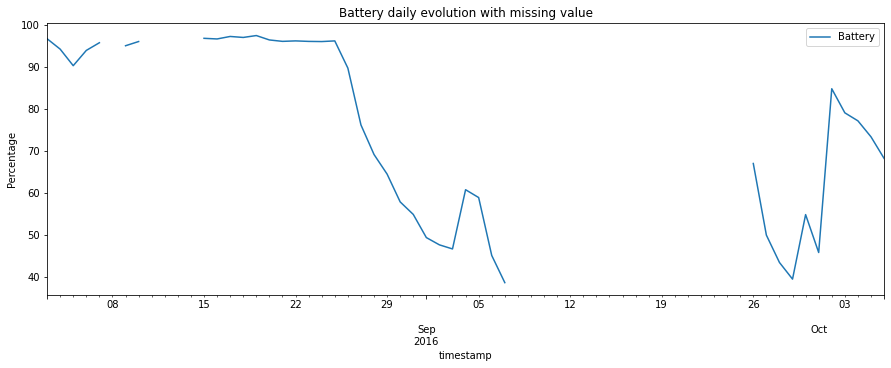

<Figure size 432x288 with 0 Axes>

In [180]:
timeserie = pd.Series(data_bat_day_mean.value, index=data_bat_day_mean.index)
timeserie.plot(figsize=(15,5), label='Battery')
plt.legend(loc='best')
plt.title('Battery daily evolution with missing value')
plt.ylabel('Percentage')
plt.show()

plt.savefig('Battery_daily_withna.png', bbox_inches='tight')

###### Without missing values

In [181]:
data_bat_day_mean.dropna(inplace=True)

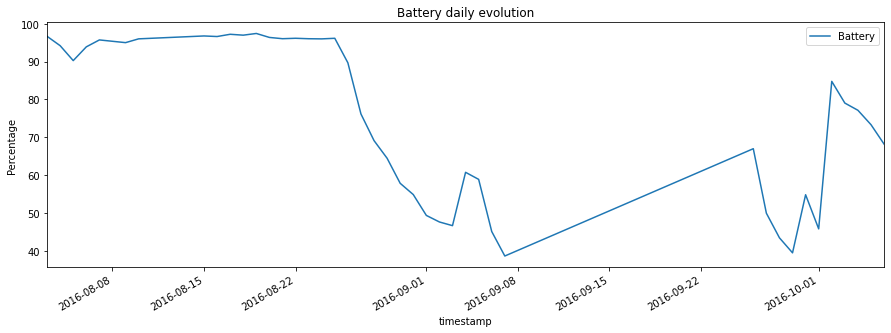

<Figure size 432x288 with 0 Axes>

In [182]:
timeserie = pd.Series(data_bat_day_mean.value, index=data_bat_day_mean.index)
timeserie.plot(figsize=(15,5), label='Battery')
plt.legend(loc='best')
plt.title('Battery daily evolution')
plt.ylabel('Percentage')
plt.show()

plt.savefig('Battery_daily.png', bbox_inches='tight')

In [183]:
data_bat_day = data_bat.reset_index()
data_bat_day.agg([pd.np.min, pd.np.max, pd.np.mean])

timestamp       value  \
amin           2016-08-03 04:39:25+00:00    0.000000   
amax           2016-10-06 07:32:51+00:00  100.000000   
mean 2016-09-09 07:06:53.422471936+00:00   62.301374   

                                 sensor_id  \
amin  7635c920-8679-11e6-a353-2f6c041e2491   
amax  e66592c0-8679-11e6-a353-2f6c041e2491   
mean                                   NaN   

                                   node_id     type     si_unit type_id  
amin  762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
amax  e662fab0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT  
mean                                   NaN      NaN         NaN     NaN

In [184]:
data_bat_day.describe()

value
count  28234.000000
mean      62.301374
std       30.607478
min        0.000000
25%       34.000000
50%       68.000000
75%       94.000000
max      100.000000

##### Plotting of Battery without resampling data 

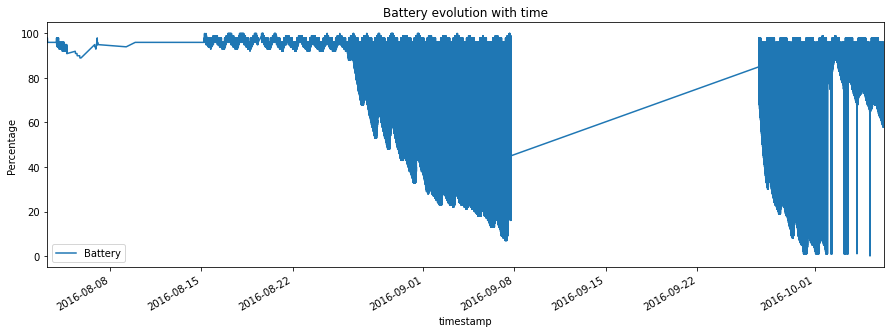

<Figure size 432x288 with 0 Axes>

In [185]:
timeserie = pd.Series(data_bat.value, index=data_bat.index)
timeserie.plot(figsize=(15,5), label='Battery')
plt.legend(loc='best')
plt.title('Battery evolution with time')
plt.ylabel('Percentage')
plt.show()

plt.savefig('Battery_daily1.png', bbox_inches='tight')

##### Hydrogen sulfide concentration - daily time series overview

In [186]:
data_hydrogen = full.loc[full['type']=="hydrogen sulfide concentration"]
data_hydrogen

value                             sensor_id  \
timestamp                                                                 
2016-08-03 04:39:25+00:00  33.198  763b9580-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00   3.922  763b9580-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00   2.114  763b9580-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00   1.893  763b9580-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00   1.814  763b9580-8679-11e6-a353-2f6c041e2491   
...                           ...                                   ...   
2016-08-19 03:35:09+00:00     NaN  c5e80c70-867a-11e6-a353-2f6c041e2491   
2016-08-19 03:05:10+00:00     NaN  c5e80c70-867a-11e6-a353-2f6c041e2491   
2016-08-19 04:05:08+00:00     NaN  c5e80c70-867a-11e6-a353-2f6c041e2491   
2016-08-19 04:35:13+00:00     NaN  c5e80c70-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:35:21+00:00     NaN  c5e80c70-867a-11e6-a353-2f6c041e2491   

                                                        node_id  \
timestamp                                                         
2016-08-03 04:39:25+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491   
...                                                         ...   
2016-08-19 03:35:09+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491   
2016-08-19 03:05:10+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491   
2016-08-19 04:05:08+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491   
2016-08-19 04:35:13+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:35:21+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491   

                                                     type si_unit type_id  
timestamp                                                                  
2016-08-03 04:39:25+00:00  hydrogen sulfide concentration     ppm  GP_H2S  
2016-08-03 04:47:41+00:00  hydrogen sulfide concentration     ppm  GP_H2S  
2016-08-03 05:08:52+00:00  hydrogen sulfide concentration     ppm  GP_H2S  
2016-08-03 05:14:08+00:00  hydrogen sulfide concentration     ppm  GP_H2S  
2016-08-03 05:28:55+00:00  hydrogen sulfide concentration     ppm  GP_H2S  
...                                                   ...     ...     ...  
2016-08-19 03:35:09+00:00  hydrogen sulfide concentration     ppm  GP_H2S  
2016-08-19 03:05:10+00:00  hydrogen sulfide concentration     ppm  GP_H2S  
2016-08-19 04:05:08+00:00  hydrogen sulfide concentration     ppm  GP_H2S  
2016-08-19 04:35:13+00:00  hydrogen sulfide concentration     ppm  GP_H2S  
2016-08-19 05:35:21+00:00  hydrogen sulfide concentration     ppm  GP_H2S  

[27626 rows x 6 columns]

In [187]:
data_hydrogen_day= data_hydrogen.resample('D')
data_hydrogen_day_mean = data_hydrogen_day.mean()
data_hydrogen_day_mean.isnull().sum()

value    35
dtype: int64

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


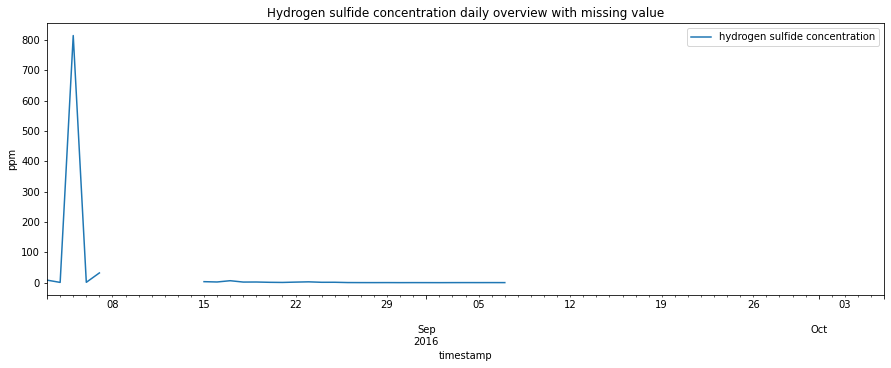

<Figure size 432x288 with 0 Axes>

In [188]:
timeserie = pd.Series(data_hydrogen_day_mean.value, index=data_hydrogen_day_mean.index)
timeserie.plot(figsize=(15,5), label='hydrogen sulfide concentration')
plt.legend(loc='best')
plt.title('Hydrogen sulfide concentration daily overview with missing value')
plt.ylabel('ppm')
plt.show()

plt.savefig('Hydrogen_Sulfide_daily_withna.png', bbox_inches='tight')

###### Without missing values

In [189]:
data_hydrogen_day_mean.dropna(inplace=True)

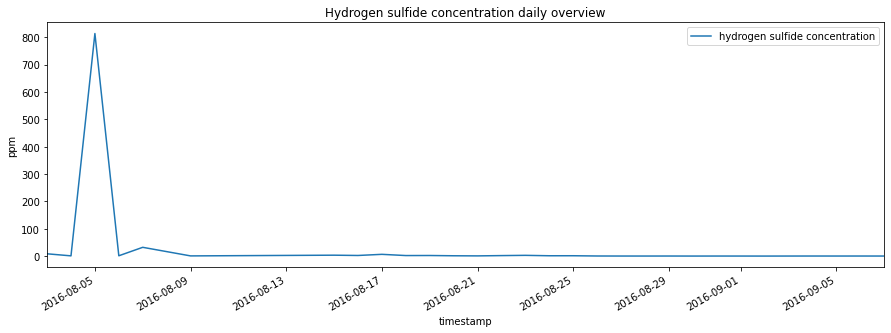

<Figure size 432x288 with 0 Axes>

In [190]:
timeserie = pd.Series(data_hydrogen_day_mean.value, index=data_hydrogen_day_mean.index)
timeserie.plot(figsize=(15,5), label='hydrogen sulfide concentration')
plt.legend(loc='best')
plt.title('Hydrogen sulfide concentration daily overview')
plt.ylabel('ppm')
plt.show()

plt.savefig('Hydrogen_Sulfide_daily.png', bbox_inches='tight')

In [191]:
data_hydrogen_day = data_hydrogen.reset_index()

In [192]:
data_hydrogen_day.agg([pd.np.min, pd.np.max, pd.np.mean])

timestamp       value  \
amin           2016-08-03 04:39:25+00:00    0.047000   
amax           2016-10-06 07:32:51+00:00  972.670000   
mean 2016-09-09 08:10:51.770185472+00:00    4.299373   

                                 sensor_id  \
amin  763701a0-8679-11e6-a353-2f6c041e2491   
amax  e6678e90-8679-11e6-a353-2f6c041e2491   
mean                                   NaN   

                                   node_id                            type  \
amin  762b8ff0-8679-11e6-a353-2f6c041e2491  hydrogen sulfide concentration   
amax  e662fab0-8679-11e6-a353-2f6c041e2491  hydrogen sulfide concentration   
mean                                   NaN                             NaN   

     si_unit type_id  
amin     ppm  GP_H2S  
amax     ppm  GP_H2S  
mean     NaN     NaN

In [193]:
data_hydrogen_day.describe()

value
count  4957.000000
mean      4.299373
std      49.655837
min       0.047000
25%       0.212000
50%       0.355000
75%       0.873000
max     972.670000

##### Plotting of Hydrogen sulfide concentration without resampling data 

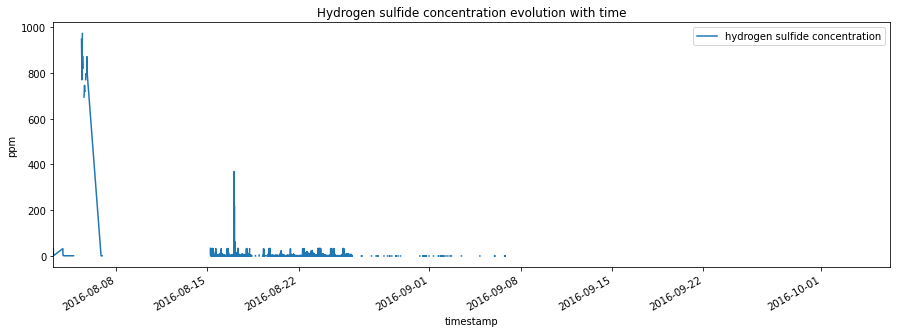

<Figure size 432x288 with 0 Axes>

In [194]:
timeserie = pd.Series(data_hydrogen.value, index=data_hydrogen.index)
timeserie.plot(figsize=(15,5), label='hydrogen sulfide concentration')
plt.legend(loc='best')
plt.title('Hydrogen sulfide concentration evolution with time')
plt.ylabel('ppm')
plt.show()

plt.savefig('Hydrogen_Sulfide_daily1.png', bbox_inches='tight')

###### Without missing values

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


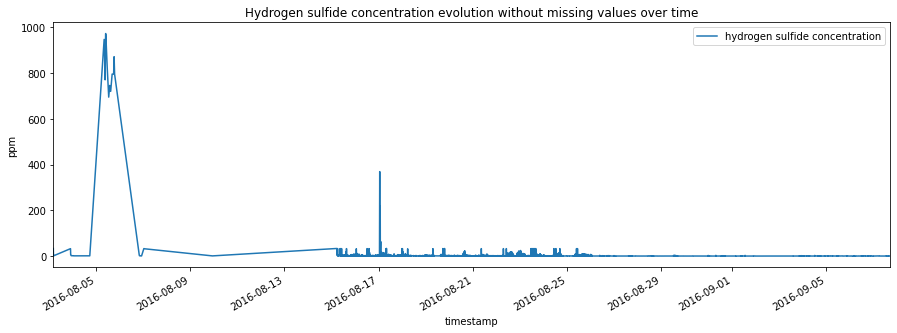

<Figure size 432x288 with 0 Axes>

In [195]:
data_hydrogen.dropna(inplace=True)
timeserie = pd.Series(data_hydrogen.value, index=data_hydrogen.index)
timeserie.plot(figsize=(15,5), label='hydrogen sulfide concentration')
plt.legend(loc='best')
plt.title('Hydrogen sulfide concentration evolution without missing values over time')
plt.ylabel('ppm')
plt.show()

plt.savefig('Hydrogen_Sulfide_daily11.png', bbox_inches='tight')

##### Temperature - daily time series overview

In [196]:
data_temp = full.loc[full['type']=="temperature"]
data_temp 

value                             sensor_id  \
timestamp                                                                 
2016-08-03 04:39:25+00:00   29.30  763ca6f0-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00   29.94  763ca6f0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00   28.61  763ca6f0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00   28.24  763ca6f0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00   28.57  763ca6f0-8679-11e6-a353-2f6c041e2491   
...                           ...                                   ...   
2016-08-19 02:35:06+00:00 -144.71  c5e881a1-867a-11e6-a353-2f6c041e2491   
2016-08-19 04:35:13+00:00 -144.71  c5e881a1-867a-11e6-a353-2f6c041e2491   
2016-08-19 03:35:09+00:00 -144.71  c5e881a1-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:05:17+00:00 -144.71  c5e881a1-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:35:21+00:00 -144.71  c5e881a1-867a-11e6-a353-2f6c041e2491   

                                                        node_id         type  \
timestamp                                                                      
2016-08-03 04:39:25+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature   
2016-08-03 04:47:41+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature   
2016-08-03 05:08:52+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature   
2016-08-03 05:14:08+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature   
2016-08-03 05:28:55+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature   
...                                                         ...          ...   
2016-08-19 02:35:06+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  temperature   
2016-08-19 04:35:13+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  temperature   
2016-08-19 03:35:09+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  temperature   
2016-08-19 05:05:17+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  temperature   
2016-08-19 05:35:21+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  temperature   

                           si_unit type_id  
timestamp                                   
2016-08-03 04:39:25+00:00  celcius     TCA  
2016-08-03 04:47:41+00:00  celcius     TCA  
2016-08-03 05:08:52+00:00  celcius     TCA  
2016-08-03 05:14:08+00:00  celcius     TCA  
2016-08-03 05:28:55+00:00  celcius     TCA  
...                            ...     ...  
2016-08-19 02:35:06+00:00  celcius     TCA  
2016-08-19 04:35:13+00:00  celcius     TCA  
2016-08-19 03:35:09+00:00  celcius     TCA  
2016-08-19 05:05:17+00:00  celcius     TCA  
2016-08-19 05:35:21+00:00  celcius     TCA  

[28037 rows x 6 columns]

In [197]:
data_temp_day= data_temp.resample('D')
data_temp_day_mean = data_temp_day.mean()
data_temp_day_mean.isnull().sum()

value    35
dtype: int64

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


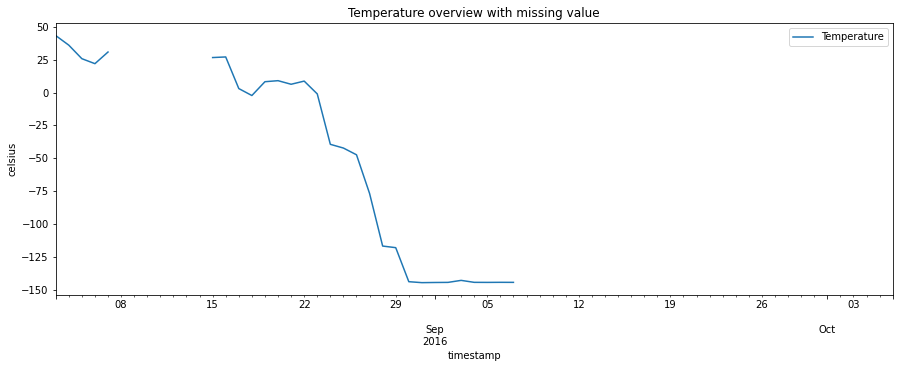

<Figure size 432x288 with 0 Axes>

In [198]:
ts = pd.Series(data_temp_day_mean.value, index=data_temp_day_mean.index)
ts.plot(figsize=(15,5), label='Temperature')
plt.legend(loc='best')
plt.title('Temperature overview with missing value')
plt.ylabel('celsius')
plt.show()

#plt.figure.savefig('Vol_Temperature.png')
plt.savefig('Vol_Temperature_withna.png', bbox_inches='tight')

###### Without missing values

In [199]:
data_temp_day_mean.dropna(inplace=True)

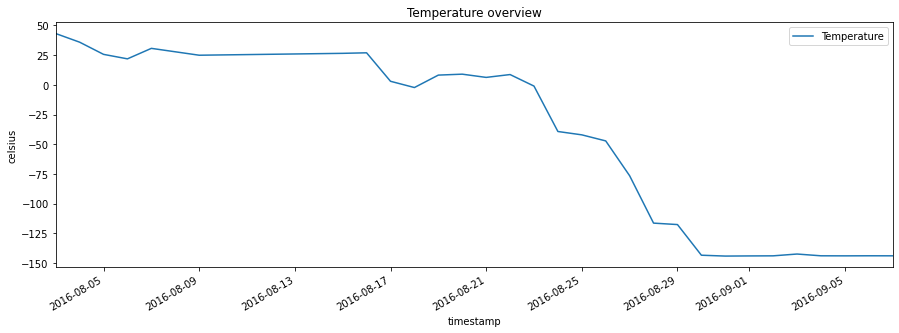

<Figure size 432x288 with 0 Axes>

In [200]:
ts = pd.Series(data_temp_day_mean.value, index=data_temp_day_mean.index)
ts.plot(figsize=(15,5), label='Temperature')
plt.legend(loc='best')
plt.title('Temperature overview')
plt.ylabel('celsius')
plt.show()

#plt.figure.savefig('Vol_Temperature.png')
plt.savefig('Vol_Temperature.png', bbox_inches='tight')

In [201]:
data_temp_day = data_temp.reset_index()

In [202]:
data_temp_day.agg([pd.np.min, pd.np.max, pd.np.mean])

timestamp       value  \
amin           2016-08-03 04:39:25+00:00 -152.970000   
amax           2016-10-06 07:32:51+00:00  175.930000   
mean 2016-09-09 07:55:52.340984576+00:00  -53.169744   

                                 sensor_id  \
amin  763bbc90-8679-11e6-a353-2f6c041e2491   
amax  e6678e91-8679-11e6-a353-2f6c041e2491   
mean                                   NaN   

                                   node_id         type  si_unit type_id  
amin  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
amax  e662fab0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
mean                                   NaN          NaN      NaN     NaN

In [203]:
data_temp_day.describe()

value
count  6674.000000
mean    -53.169744
std      85.079717
min    -152.970000
25%    -144.120000
50%      22.000000
75%      26.230000
max     175.930000

##### Plotting of Temperature without resampling data 

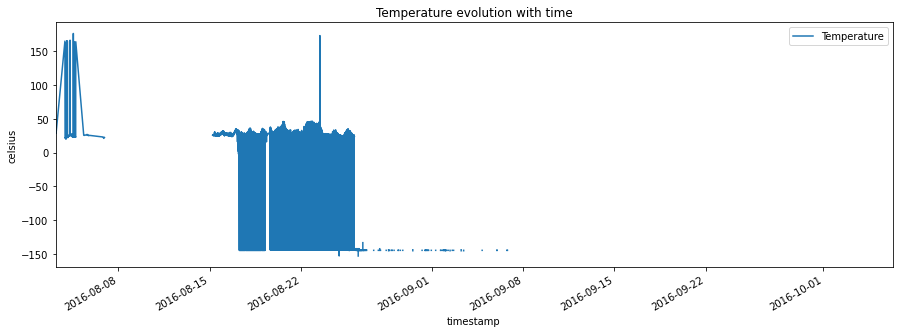

<Figure size 432x288 with 0 Axes>

In [204]:
ts = pd.Series(data_temp.value, index=data_temp.index)
ts.plot(figsize=(15,5), label='Temperature')
plt.legend(loc='best')
plt.title('Temperature evolution with time')
plt.ylabel('celsius')
plt.show()

#plt.figure.savefig('Vol_Temperature.png')
plt.savefig('Vol_Temperature1.png', bbox_inches='tight')

###### Without missing values

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


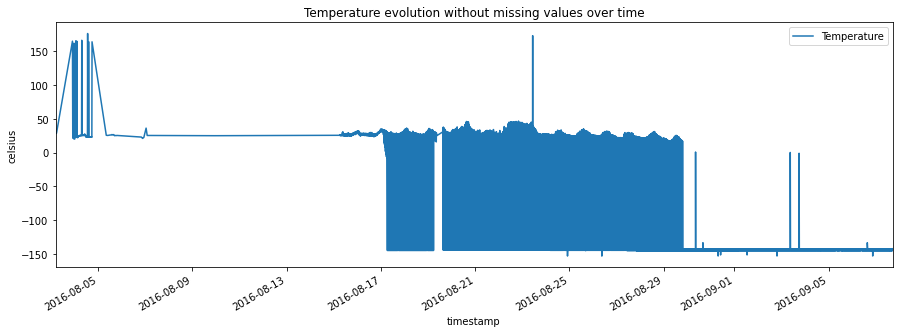

<Figure size 432x288 with 0 Axes>

In [205]:
data_temp.dropna(inplace=True)
ts = pd.Series(data_temp.value, index=data_temp.index)
ts.plot(figsize=(15,5), label='Temperature')
plt.legend(loc='best')
plt.title('Temperature evolution without missing values over time')
plt.ylabel('celsius')
plt.show()

#plt.figure.savefig('Vol_Temperature.png')
plt.savefig('Vol_Temperature11.png', bbox_inches='tight')

##### Pressure - daily time series overview

In [206]:
data_pres = full.loc[full['type']=="pressure"]
data_pres 

value                             sensor_id  \
timestamp                                                                   
2016-08-03 04:39:25+00:00  96893.11  763d9150-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00  96903.37  763d9150-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00  96921.45  763d9150-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00  96930.84  763d9150-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00  96914.33  763d9150-8679-11e6-a353-2f6c041e2491   
...                             ...                                   ...   
2016-08-19 04:05:08+00:00  51170.67  c5e8a8b0-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:05:17+00:00  51192.88  c5e8a8b0-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:35:21+00:00  51209.02  c5e8a8b0-867a-11e6-a353-2f6c041e2491   
2016-08-19 02:35:06+00:00  51166.64  c5e8a8b0-867a-11e6-a353-2f6c041e2491   
2016-08-19 04:35:13+00:00  51194.89  c5e8a8b0-867a-11e6-a353-2f6c041e2491   

                                                        node_id      type  \
timestamp                                                                   
2016-08-03 04:39:25+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  pressure   
2016-08-03 04:47:41+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  pressure   
2016-08-03 05:08:52+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  pressure   
2016-08-03 05:14:08+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  pressure   
2016-08-03 05:28:55+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  pressure   
...                                                         ...       ...   
2016-08-19 04:05:08+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  pressure   
2016-08-19 05:05:17+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  pressure   
2016-08-19 05:35:21+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  pressure   
2016-08-19 02:35:06+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  pressure   
2016-08-19 04:35:13+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  pressure   

                          si_unit type_id  
timestamp                                  
2016-08-03 04:39:25+00:00  pascal      PA  
2016-08-03 04:47:41+00:00  pascal      PA  
2016-08-03 05:08:52+00:00  pascal      PA  
2016-08-03 05:14:08+00:00  pascal      PA  
2016-08-03 05:28:55+00:00  pascal      PA  
...                           ...     ...  
2016-08-19 04:05:08+00:00  pascal      PA  
2016-08-19 05:05:17+00:00  pascal      PA  
2016-08-19 05:35:21+00:00  pascal      PA  
2016-08-19 02:35:06+00:00  pascal      PA  
2016-08-19 04:35:13+00:00  pascal      PA  

[28067 rows x 6 columns]

In [207]:
data_pres_day= data_pres.resample('D')
data_pres_day_mean = data_pres_day.mean()
data_pres_day_mean.isnull().sum()

value    35
dtype: int64

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


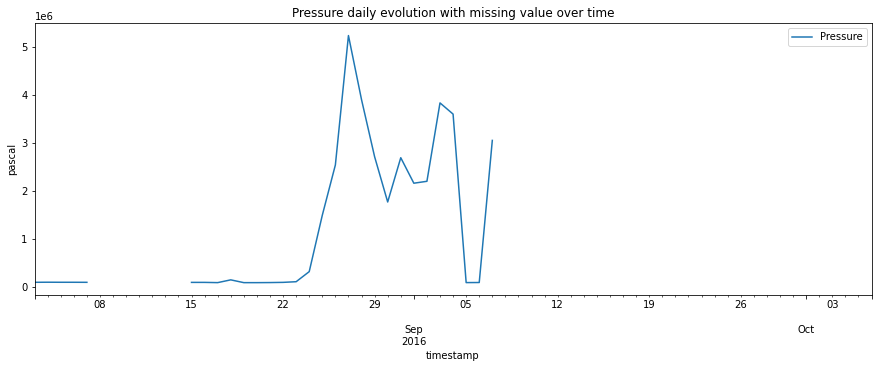

<Figure size 432x288 with 0 Axes>

In [208]:
timeserie = pd.Series(data_pres_day_mean.value, index=data_pres_day_mean.index)
timeserie.plot(figsize=(15,5), label='Pressure')
plt.legend(loc='best')
plt.title('Pressure daily evolution with missing value over time')
plt.ylabel('pascal')
plt.show()

plt.savefig('Pressure_daily_withna.png', bbox_inches='tight')

###### Without missing values

In [209]:
data_pres_day_mean.dropna(inplace=True)
data_pres_day = data_pres.reset_index()

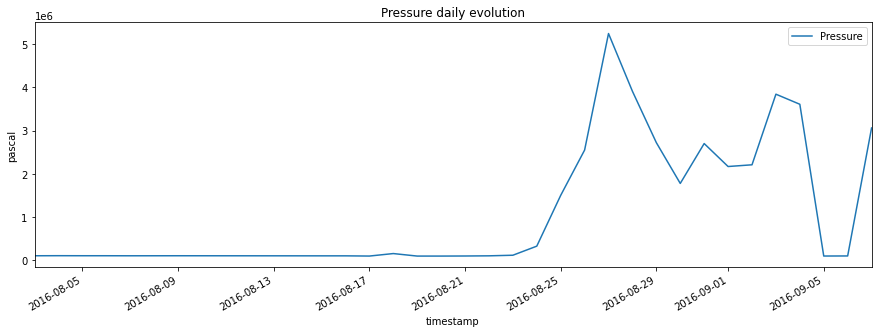

<Figure size 432x288 with 0 Axes>

In [210]:
timeserie = pd.Series(data_pres_day_mean.value, index=data_pres_day_mean.index)
timeserie.plot(figsize=(15,5), label='Pressure')
plt.legend(loc='best')
plt.title('Pressure daily evolution')
plt.ylabel('pascal')
plt.show()

plt.savefig('Pressure_daily.png', bbox_inches='tight')

In [211]:
data_pres_day.agg([pd.np.min, pd.np.max, pd.np.mean])

timestamp         value  \
amin           2016-08-03 04:39:25+00:00  4.523300e+02   
amax           2016-10-06 07:32:51+00:00  1.677295e+07   
mean 2016-09-09 07:58:12.096345856+00:00  1.361693e+06   

                                 sensor_id  \
amin  763d6a40-8679-11e6-a353-2f6c041e2491   
amax  e66851e0-8679-11e6-a353-2f6c041e2491   
mean                                   NaN   

                                   node_id      type si_unit type_id  
amin  762b8ff0-8679-11e6-a353-2f6c041e2491  pressure  pascal      PA  
amax  e662fab0-8679-11e6-a353-2f6c041e2491  pressure  pascal      PA  
mean                                   NaN       NaN     NaN     NaN

##### Plotting of Pressure without resampling data 

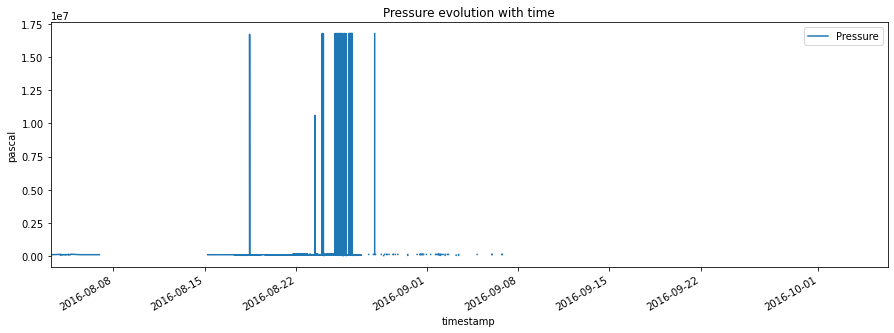

<Figure size 432x288 with 0 Axes>

In [212]:
timeserie = pd.Series(data_pres.value, index=data_pres.index)
timeserie.plot(figsize=(15,5), label='Pressure')
plt.legend(loc='best')
plt.title('Pressure evolution with time')
plt.ylabel('pascal')
plt.show()

plt.savefig('Pressure1.png', bbox_inches='tight')

###### Without missing values

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


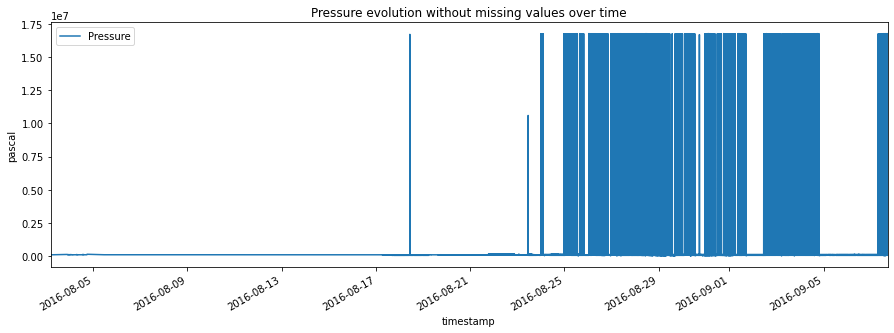

<Figure size 432x288 with 0 Axes>

In [213]:
data_pres.dropna(inplace=True)
timeserie = pd.Series(data_pres.value, index=data_pres.index)
timeserie.plot(figsize=(15,5), label='Pressure')
plt.legend(loc='best')
plt.title('Pressure evolution without missing values over time')
plt.ylabel('pascal')
plt.show()

plt.savefig('Pressure11.png', bbox_inches='tight')

##### Carbon dioxide concentration - daily time series overview

In [214]:
data_carb = full.loc[full['type']=="carbon dioxide concentration"]
data_carb 

value                             sensor_id  \
timestamp                                                                  
2016-08-03 04:39:25+00:00  459.736  763701a1-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00  459.344  763701a1-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00  358.964  763701a1-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00  384.476  763701a1-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00  384.378  763701a1-8679-11e6-a353-2f6c041e2491   
...                            ...                                   ...   
2016-08-19 02:35:06+00:00    4.839  c5e881a0-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:05:17+00:00    4.359  c5e881a0-867a-11e6-a353-2f6c041e2491   
2016-08-19 03:05:10+00:00   19.880  c5e881a0-867a-11e6-a353-2f6c041e2491   
2016-08-19 03:35:09+00:00    3.108  c5e881a0-867a-11e6-a353-2f6c041e2491   
2016-08-19 04:05:08+00:00   19.880  c5e881a0-867a-11e6-a353-2f6c041e2491   

                                                        node_id  \
timestamp                                                         
2016-08-03 04:39:25+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491   
...                                                         ...   
2016-08-19 02:35:06+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:05:17+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491   
2016-08-19 03:05:10+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491   
2016-08-19 03:35:09+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491   
2016-08-19 04:05:08+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491   

                                                   type si_unit type_id  
timestamp                                                                
2016-08-03 04:39:25+00:00  carbon dioxide concentration     ppm  GP_CO2  
2016-08-03 04:47:41+00:00  carbon dioxide concentration     ppm  GP_CO2  
2016-08-03 05:08:52+00:00  carbon dioxide concentration     ppm  GP_CO2  
2016-08-03 05:14:08+00:00  carbon dioxide concentration     ppm  GP_CO2  
2016-08-03 05:28:55+00:00  carbon dioxide concentration     ppm  GP_CO2  
...                                                 ...     ...     ...  
2016-08-19 02:35:06+00:00  carbon dioxide concentration     ppm  GP_CO2  
2016-08-19 05:05:17+00:00  carbon dioxide concentration     ppm  GP_CO2  
2016-08-19 03:05:10+00:00  carbon dioxide concentration     ppm  GP_CO2  
2016-08-19 03:35:09+00:00  carbon dioxide concentration     ppm  GP_CO2  
2016-08-19 04:05:08+00:00  carbon dioxide concentration     ppm  GP_CO2  

[27689 rows x 6 columns]

In [215]:
data_carb_day= data_carb.resample('D')
data_carb_day_mean = data_carb_day.mean()
data_carb_day_mean.isnull().sum()

value    36
dtype: int64

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


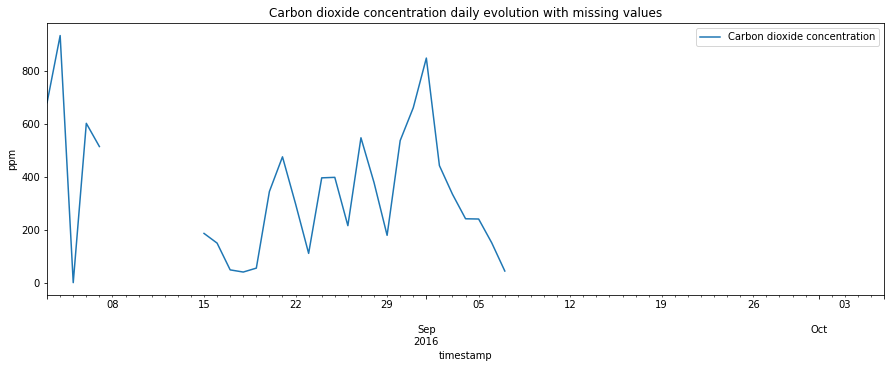

<Figure size 432x288 with 0 Axes>

In [216]:
timeserie = pd.Series(data_carb_day_mean.value, index=data_carb_day_mean.index)
timeserie.plot(figsize=(15,5), label='Carbon dioxide concentration')
plt.legend(loc='best')
plt.title('Carbon dioxide concentration daily evolution with missing values')
plt.ylabel('ppm')
plt.show()

plt.savefig('Carbon_dioxide_daily_withna.png', bbox_inches='tight')

###### Without missing values

In [217]:
data_carb_day_mean.dropna(inplace=True)
data_carb_day = data_carb.reset_index()

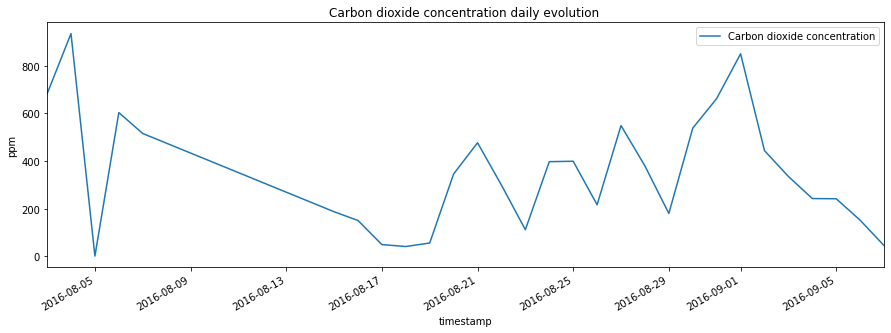

<Figure size 432x288 with 0 Axes>

In [218]:
timeserie = pd.Series(data_carb_day_mean.value, index=data_carb_day_mean.index)
timeserie.plot(figsize=(15,5), label='Carbon dioxide concentration')
plt.legend(loc='best')
plt.title('Carbon dioxide concentration daily evolution ')
plt.ylabel('ppm')
plt.show()

plt.savefig('Carbon_dioxide_daily.png', bbox_inches='tight')

In [219]:
data_carb_day.agg([pd.np.min, pd.np.max, pd.np.mean])

timestamp        value  \
amin           2016-08-03 04:39:25+00:00     0.810000   
amax           2016-10-06 07:32:51+00:00  2744.429000   
mean 2016-09-09 08:10:10.541412096+00:00   330.252234   

                                 sensor_id  \
amin  7636da90-8679-11e6-a353-2f6c041e2491   
amax  e66851e1-8679-11e6-a353-2f6c041e2491   
mean                                   NaN   

                                   node_id                          type  \
amin  762b8ff0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
amax  e662fab0-8679-11e6-a353-2f6c041e2491  carbon dioxide concentration   
mean                                   NaN                           NaN   

     si_unit type_id  
amin     ppm  GP_CO2  
amax     ppm  GP_CO2  
mean     NaN     NaN

##### Plotting of Carbon dioxide concentration without resampling data 

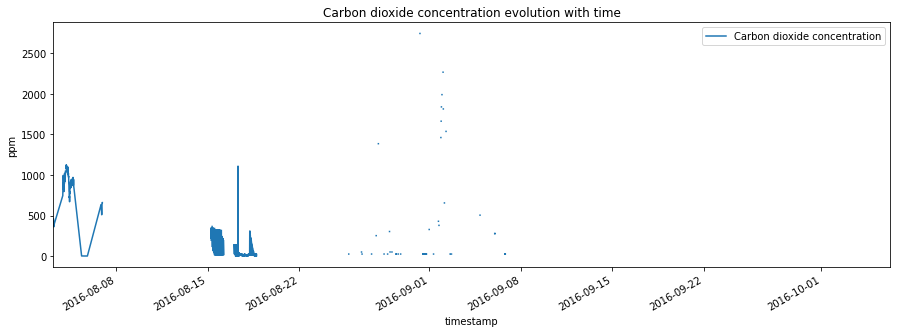

<Figure size 432x288 with 0 Axes>

In [220]:
timeserie = pd.Series(data_carb.value, index=data_carb.index)
timeserie.plot(figsize=(15,5), label='Carbon dioxide concentration')
plt.legend(loc='best')
plt.title('Carbon dioxide concentration evolution with time')
plt.ylabel('ppm')
plt.show()

plt.savefig('Carbon_dioxide_daily1.png', bbox_inches='tight')

###### Without missing values

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


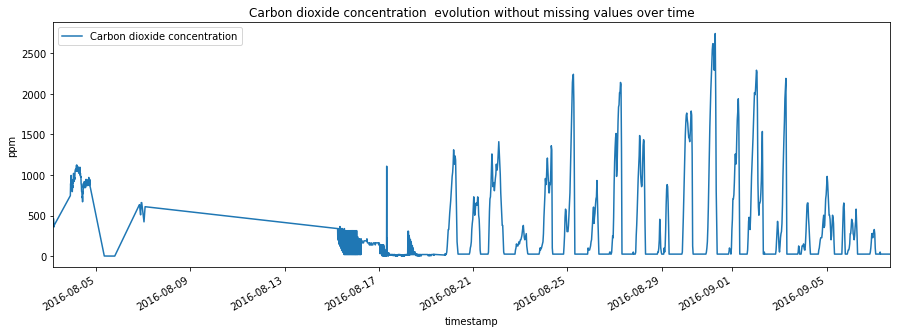

<Figure size 432x288 with 0 Axes>

In [221]:
data_carb.dropna(inplace=True)
timeserie = pd.Series(data_carb.value, index=data_carb.index)
timeserie.plot(figsize=(15,5), label='Carbon dioxide concentration')
plt.legend(loc='best')
plt.title('Carbon dioxide concentration  evolution without missing values over time')
plt.ylabel('ppm')
plt.show()

plt.savefig('Carbon_dioxide_daily11.png', bbox_inches='tight')

##### Humidity - daily time series overview

In [222]:
data_HUMA = full.loc[full['type']=="humidity"]
data_HUMA 

value                             sensor_id  \
timestamp                                                                
2016-08-03 04:39:25+00:00   64.9  764161e0-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00   63.5  764161e0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00   68.0  764161e0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00   69.7  764161e0-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00   68.4  764161e0-8679-11e6-a353-2f6c041e2491   
...                          ...                                   ...   
2016-08-19 04:05:08+00:00  100.0  c5e9ba20-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:35:21+00:00  100.0  c5e9ba20-867a-11e6-a353-2f6c041e2491   
2016-08-19 05:05:17+00:00  100.0  c5e9ba20-867a-11e6-a353-2f6c041e2491   
2016-08-19 02:35:06+00:00  100.0  c5e9ba20-867a-11e6-a353-2f6c041e2491   
2016-08-19 03:05:10+00:00  100.0  c5e9ba20-867a-11e6-a353-2f6c041e2491   

                                                        node_id      type  \
timestamp                                                                   
2016-08-03 04:39:25+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  humidity   
2016-08-03 04:47:41+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  humidity   
2016-08-03 05:08:52+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  humidity   
2016-08-03 05:14:08+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  humidity   
2016-08-03 05:28:55+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  humidity   
...                                                         ...       ...   
2016-08-19 04:05:08+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  humidity   
2016-08-19 05:35:21+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  humidity   
2016-08-19 05:05:17+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  humidity   
2016-08-19 02:35:06+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  humidity   
2016-08-19 03:05:10+00:00  c5e39fa0-867a-11e6-a353-2f6c041e2491  humidity   

                                     si_unit type_id  
timestamp                                             
2016-08-03 04:39:25+00:00  relative humidity    HUMA  
2016-08-03 04:47:41+00:00  relative humidity    HUMA  
2016-08-03 05:08:52+00:00  relative humidity    HUMA  
2016-08-03 05:14:08+00:00  relative humidity    HUMA  
2016-08-03 05:28:55+00:00  relative humidity    HUMA  
...                                      ...     ...  
2016-08-19 04:05:08+00:00  relative humidity    HUMA  
2016-08-19 05:35:21+00:00  relative humidity    HUMA  
2016-08-19 05:05:17+00:00  relative humidity    HUMA  
2016-08-19 02:35:06+00:00  relative humidity    HUMA  
2016-08-19 03:05:10+00:00  relative humidity    HUMA  

[28065 rows x 6 columns]

In [223]:
data_HUMA_day= data_HUMA.resample('D')
data_HUMA_day_mean = data_HUMA_day.mean()
data_HUMA_day_mean.isnull().sum()

value    35
dtype: int64

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


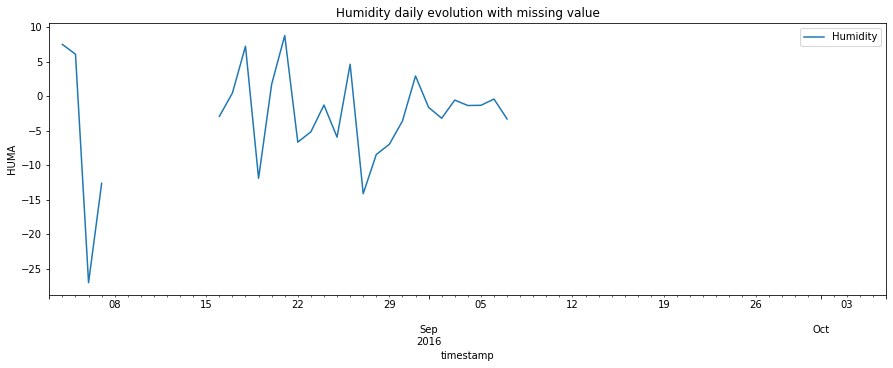

<Figure size 432x288 with 0 Axes>

In [224]:
timeserie = pd.Series(data_HUMA_day_mean.value, index=data_HUMA_day_mean.index)
timeserie.diff().plot(figsize=(15,5), label='Humidity')
plt.legend(loc='best')
plt.title('Humidity daily evolution with missing value')
plt.ylabel('HUMA')
plt.show()

plt.savefig('Humidity_daily.png', bbox_inches='tight')

###### Without missing values

In [225]:
data_HUMA_day_mean.dropna(inplace=True)
data_HUMA_day = data_HUMA.reset_index()

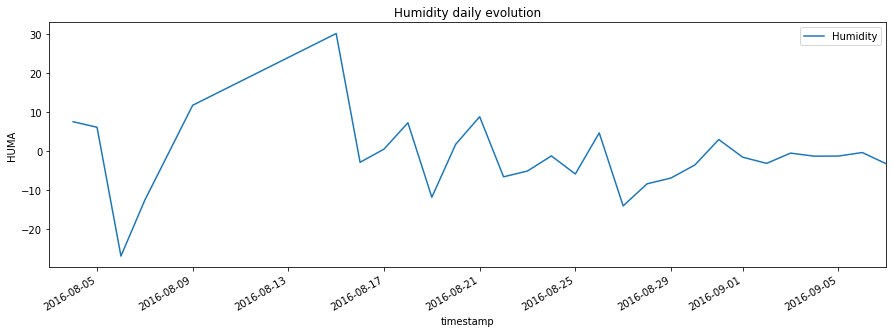

<Figure size 432x288 with 0 Axes>

In [226]:
timeserie = pd.Series(data_HUMA_day_mean.value, index=data_HUMA_day_mean.index)
timeserie.diff().plot(figsize=(15,5), label='Humidity')
plt.legend(loc='best')
plt.title('Humidity daily evolution')
plt.ylabel('HUMA')
plt.show()

plt.savefig('Humidity_daily.png', bbox_inches='tight')

In [227]:
data_HUMA_day.agg([pd.np.min, pd.np.max, pd.np.mean])

timestamp      value  \
amin           2016-08-03 04:39:25+00:00    0.00000   
amax           2016-10-06 07:32:51+00:00  100.00000   
mean 2016-09-09 08:20:39.681777152+00:00   63.15602   

                                 sensor_id  \
amin  76402960-8679-11e6-a353-2f6c041e2491   
amax  e6691530-8679-11e6-a353-2f6c041e2491   
mean                                   NaN   

                                   node_id      type            si_unit  \
amin  762b8ff0-8679-11e6-a353-2f6c041e2491  humidity  relative humidity   
amax  e662fab0-8679-11e6-a353-2f6c041e2491  humidity  relative humidity   
mean                                   NaN       NaN                NaN   

     type_id  
amin    HUMA  
amax    HUMA  
mean     NaN

##### Plotting of Humidity without resampling data 

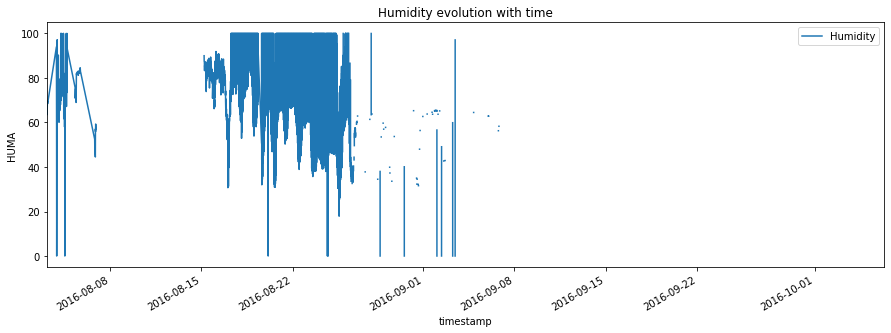

<Figure size 432x288 with 0 Axes>

In [228]:
timeserie = pd.Series(data_HUMA.value, index=data_HUMA.index)
timeserie.plot(figsize=(15,5), label='Humidity')
plt.legend(loc='best')
plt.title('Humidity evolution with time')
plt.ylabel('HUMA')
plt.show()

plt.savefig('Humidity_daily1.png', bbox_inches='tight')

###### Without missing values

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


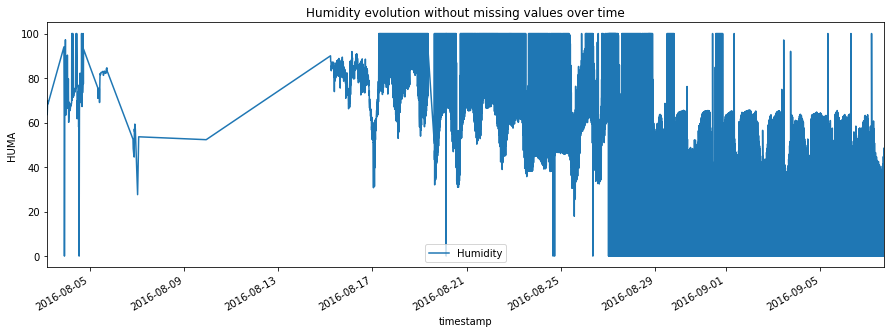

<Figure size 432x288 with 0 Axes>

In [229]:
data_HUMA.dropna(inplace=True)
timeserie = pd.Series(data_HUMA.value, index=data_HUMA.index)
timeserie.plot(figsize=(15,5), label='Humidity')
plt.legend(loc='best')
plt.title('Humidity evolution without missing values over time')
plt.ylabel('HUMA')
plt.show()

plt.savefig('Humidity_daily11.png', bbox_inches='tight')

##### RSAM - daily time series overview

In [230]:
data_RSAM = full.loc[full['type']=="RSAM"]
data_RSAM 

value                             sensor_id  \
timestamp                                                                
2016-07-01 00:00:31+00:00  455.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-07-01 00:10:02+00:00  213.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-07-01 00:40:00+00:00  429.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-07-01 00:20:00+00:00  225.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-07-01 00:30:01+00:00  321.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
...                          ...                                   ...   
2016-08-31 19:00:01+00:00  125.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 19:50:00+00:00  143.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 21:00:02+00:00  175.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 21:50:00+00:00  164.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 23:00:00+00:00   89.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   

                                                        node_id  type si_unit  \
timestamp                                                                       
2016-07-01 00:00:31+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-07-01 00:10:02+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-07-01 00:40:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-07-01 00:20:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-07-01 00:30:01+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
...                                                         ...   ...     ...   
2016-08-31 19:00:01+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-08-31 19:50:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-08-31 21:00:02+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-08-31 21:50:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   
2016-08-31 23:00:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts   

                          type_id  
timestamp                          
2016-07-01 00:00:31+00:00    RSAM  
2016-07-01 00:10:02+00:00    RSAM  
2016-07-01 00:40:00+00:00    RSAM  
2016-07-01 00:20:00+00:00    RSAM  
2016-07-01 00:30:01+00:00    RSAM  
...                           ...  
2016-08-31 19:00:01+00:00    RSAM  
2016-08-31 19:50:00+00:00    RSAM  
2016-08-31 21:00:02+00:00    RSAM  
2016-08-31 21:50:00+00:00    RSAM  
2016-08-31 23:00:00+00:00    RSAM  

[8816 rows x 6 columns]

In [231]:
data_RSAM_day= data_RSAM.resample('D')
data_RSAM_day_mean = data_RSAM_day.mean()
data_RSAM_day_mean.isnull().sum()

value    0
dtype: int64

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


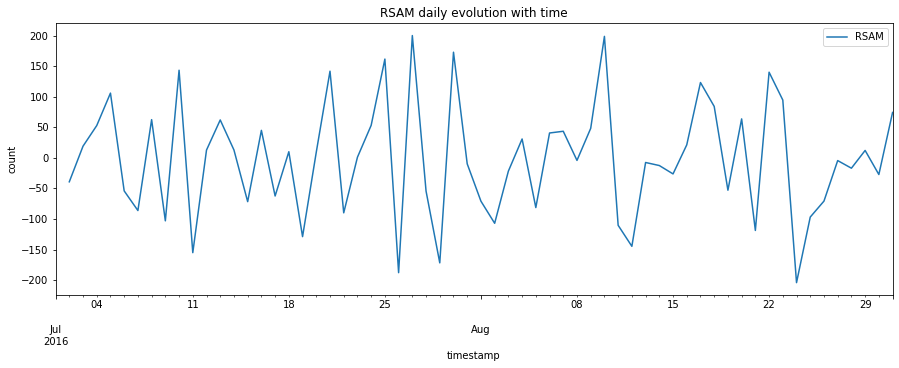

<Figure size 432x288 with 0 Axes>

In [232]:
timeserie = pd.Series(data_RSAM_day_mean.value, index=data_RSAM_day_mean.index)
timeserie.diff().plot(figsize=(15,5), label='RSAM')
plt.legend(loc='best')
plt.title('RSAM daily evolution with time')
plt.ylabel('count')
plt.show()

plt.savefig('RSAM_daily.png', bbox_inches='tight')

In [233]:
data_RSAM_day = data_RSAM.reset_index() 

In [234]:
data_RSAM_day.agg([pd.np.min, pd.np.max, pd.np.mean])

timestamp        value  \
amin           2016-07-01 00:00:31+00:00    67.000000   
amax           2016-08-31 23:40:01+00:00  1170.000000   
mean 2016-08-01 00:59:19.800134400+00:00   261.940903   

                                 sensor_id  \
amin  1248ff60-e707-11e6-89c8-314aa4f67f8c   
amax  1248ff60-e707-11e6-89c8-314aa4f67f8c   
mean                                   NaN   

                                   node_id  type si_unit type_id  
amin  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts    RSAM  
amax  ede3ed60-e701-11e6-83c1-01ce06e6d17f  RSAM  counts    RSAM  
mean                                   NaN   NaN     NaN     NaN

##### Plotting of RSAM without resampling data 

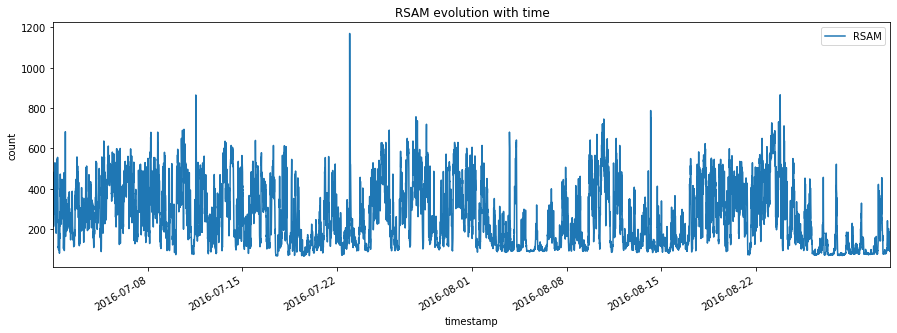

<Figure size 432x288 with 0 Axes>

In [235]:
timeserie = pd.Series(data_RSAM.value, index=data_RSAM.index)
timeserie.plot(figsize=(15,5), label='RSAM')
plt.legend(loc='best')
plt.title('RSAM evolution with time')
plt.ylabel('count')
plt.show()

plt.savefig('RSAM_daily1.png', bbox_inches='tight')

**To sum up the result in table, we have:**

In [236]:
full['type_id'].unique()

array(['BAT', 'GP_H2S', 'TCA', 'PA', 'GP_CO2', 'HUMA', 'RSAM'],
      dtype=object)

In [237]:
#full=full.reset_index()

In [238]:
#import datetime
#import dateutil.parser
#full['date'] = datetime.date.strftime(full['timestamp'], '%d-%m-%Y')

In [239]:
#pd.pivot_table(full, index=['sensor_id', 'type_id','timestamp'], values= "value", aggfunc= [np.mean, min, max])

### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/Corr_plot.JPG" width=450>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their name id's

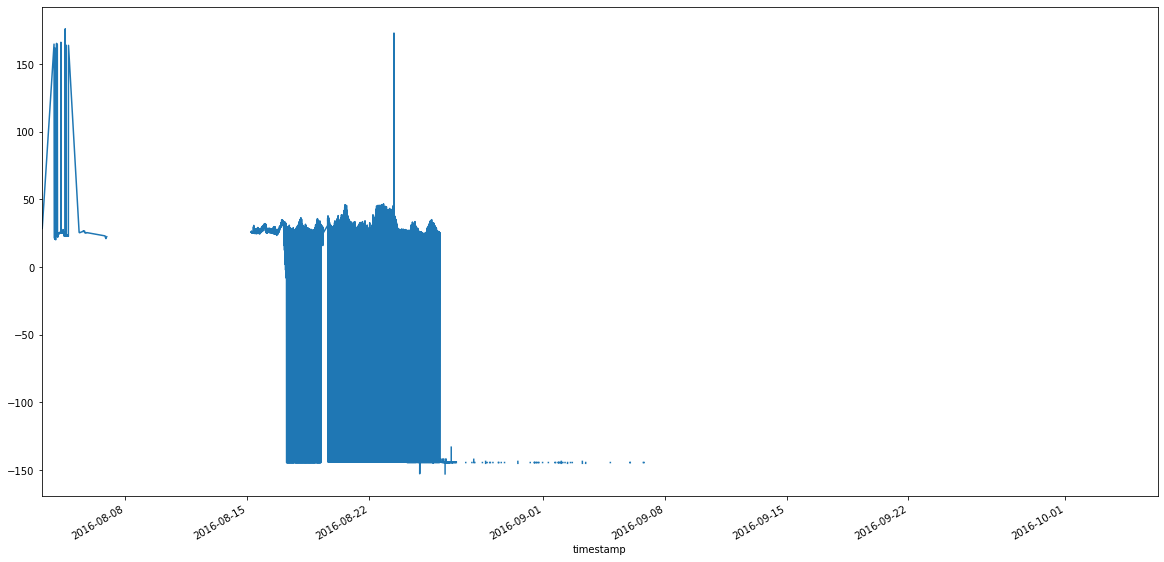

In [240]:
criteria = full.type_id == 'TCA'
plt.figure(figsize=(20,10))
full[criteria]['value'].plot()

In [241]:
temp_sensors = [s for s in full[full.type_id =='TCA']['sensor_id']]
set(temp_sensors)                            # Just to drop duplicated sensors
different_sensors = list(set(temp_sensors))       # convert the result to a list
different_sensors

['d3d53930-8679-11e6-a353-2f6c041e2491',
 'e6678e91-8679-11e6-a353-2f6c041e2491',
 'c15f9391-8679-11e6-a353-2f6c041e2491',
 'd3cf6cd0-8679-11e6-a353-2f6c041e2491',
 '7644bd40-8679-11e6-a353-2f6c041e2491',
 'c5e881a1-867a-11e6-a353-2f6c041e2491',
 '763bbc90-8679-11e6-a353-2f6c041e2491',
 'c15a6371-8679-11e6-a353-2f6c041e2491',
 '763ca6f0-8679-11e6-a353-2f6c041e2491',
 'd3d909c1-8679-11e6-a353-2f6c041e2491']

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Use the following trick to do this is to plot one line at a time, over and over in a loop

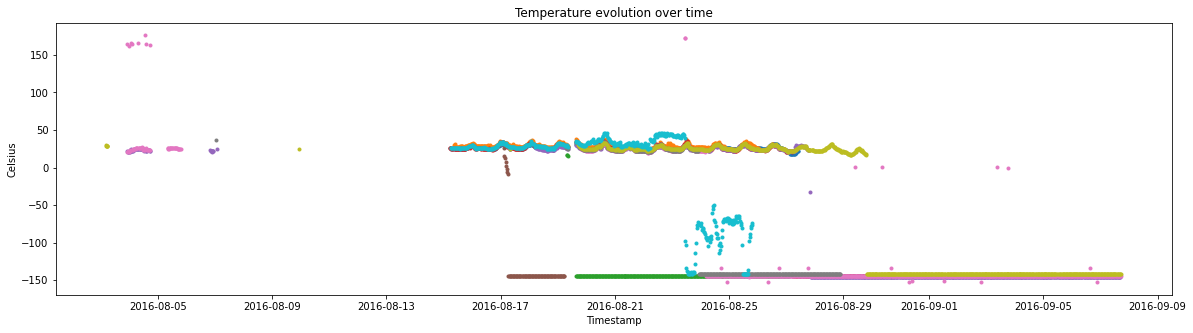

In [242]:
plt.figure(figsize=(20,5))

for s in different_sensors:
    sub_df = full[full['sensor_id']==s]
    plt.plot(sub_df.index, sub_df['value'],'.')
plt.title('Temperature evolution over time')
plt.xlabel('Timestamp')
plt.ylabel('Celsius')
plt.show()

This plot is fine, but all the lines are too close together. We cannot see how each sensor is behaving. For that, we can try drawing "Subplots." In these plots, each sensor gets its own plot (called a 'panel').


**Creating Subplots - Each sensor gets its own panel**

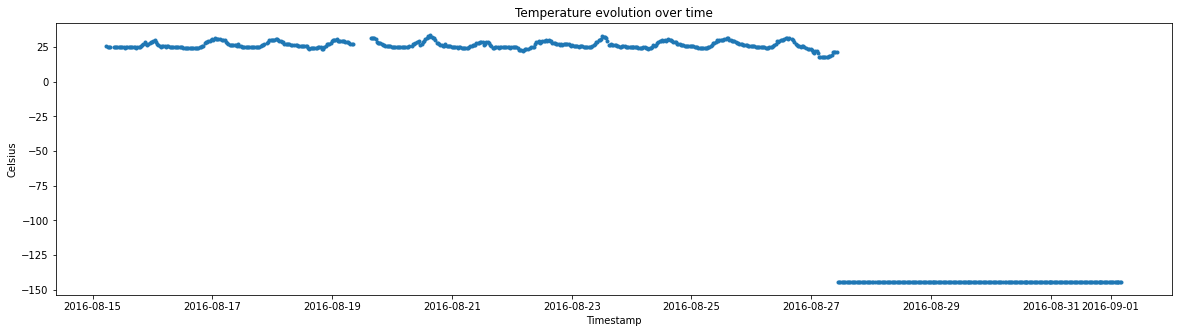

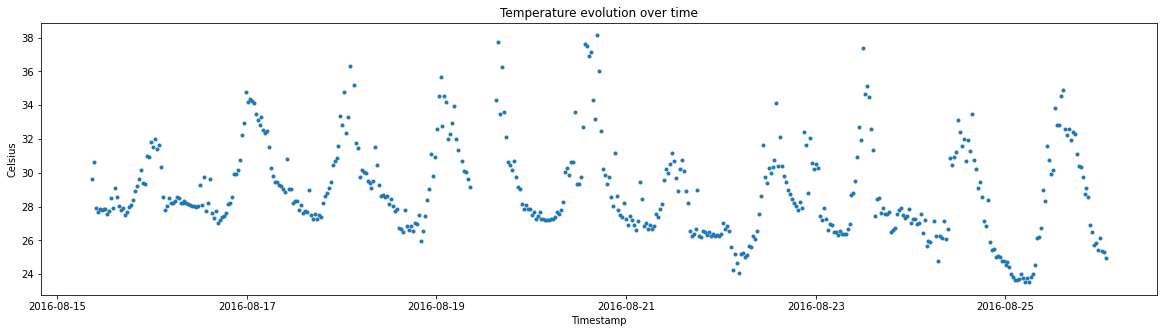

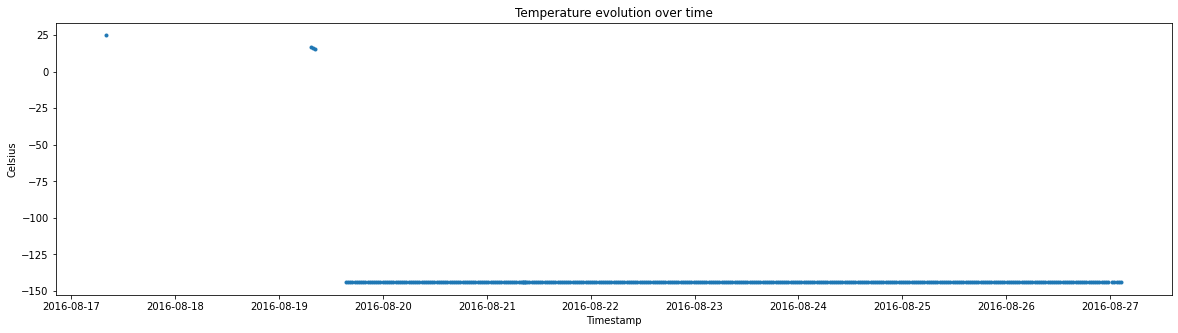

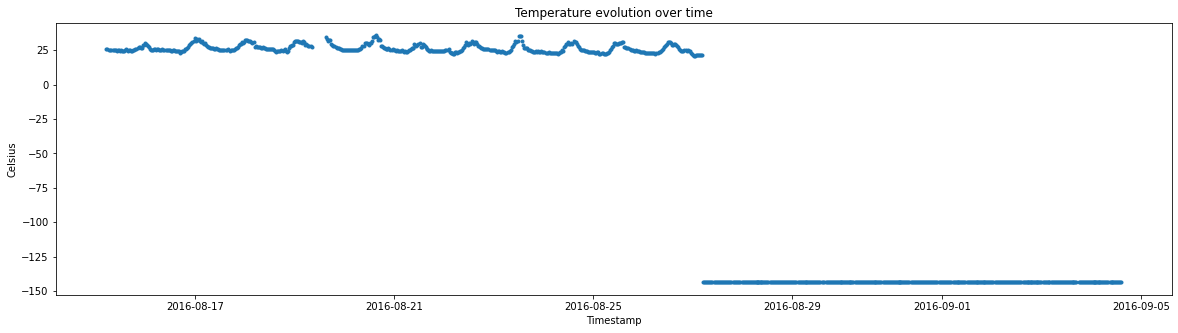

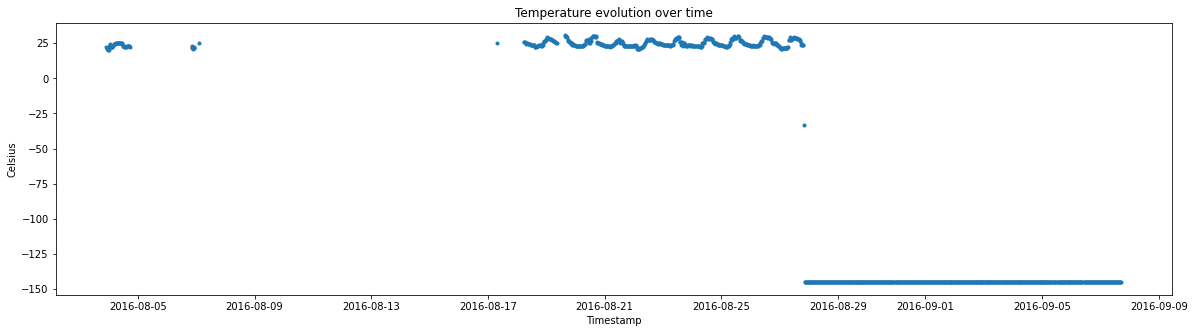

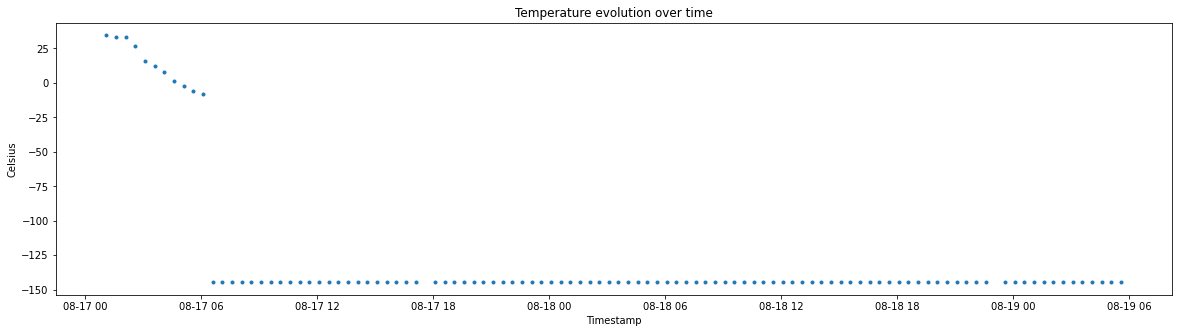

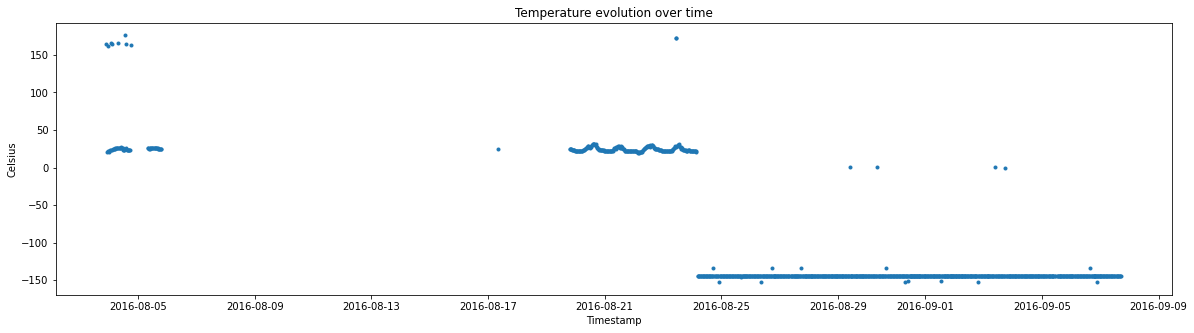

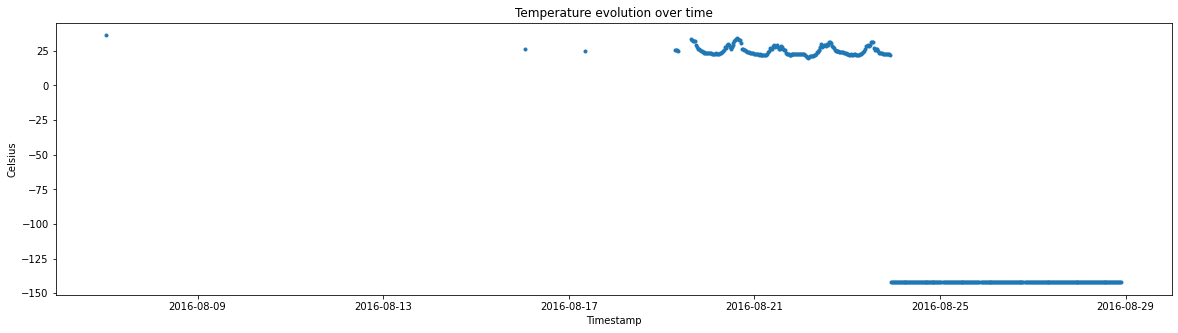

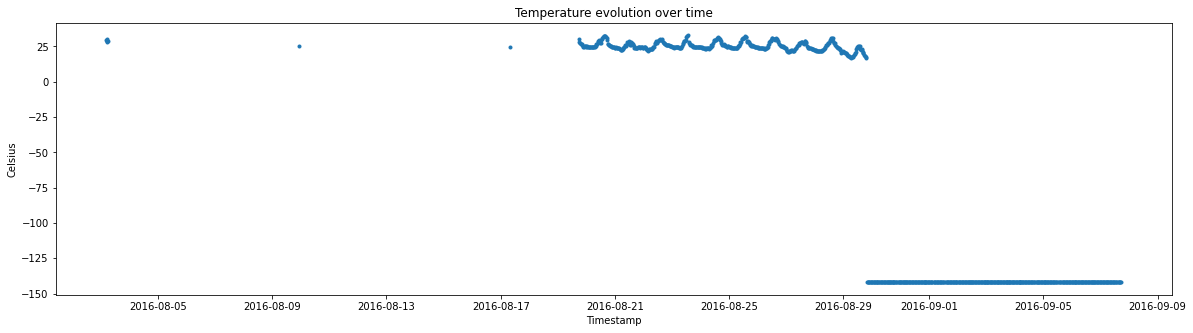

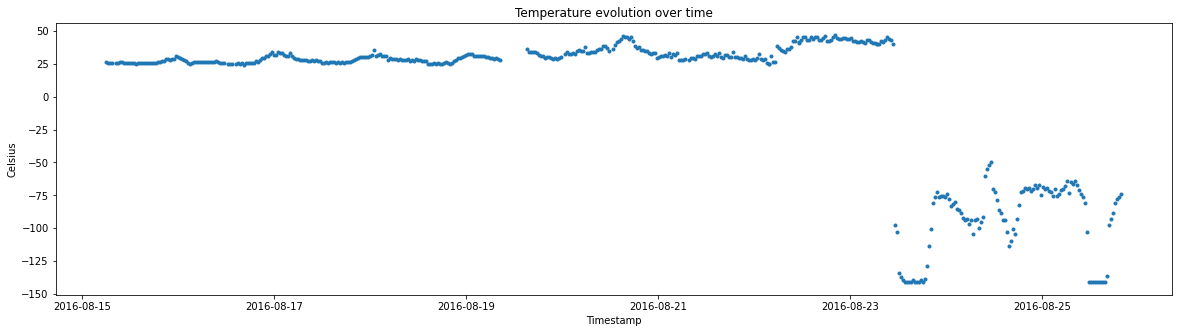

In [243]:
i=0
for s in different_sensors:
    sub_df = full[full['sensor_id']==s]
    plt.figure(figsize=(20,5))
    plt.plot(sub_df.index, sub_df['value'], '.')
    plt.title('Temperature evolution over time')
    plt.xlabel('Timestamp')
    plt.ylabel('Celsius')
    plt.show()
    i =i+1

Question: Based on the plots being made, comment on the readings made by the temperature sensors.

#### Task: Clean Up Sensor Data

In [244]:
full_dropna = full.dropna()
full_dropna

value                             sensor_id  \
timestamp                                                                
2016-08-03 04:39:25+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00   96.0  7635c920-8679-11e6-a353-2f6c041e2491   
...                          ...                                   ...   
2016-08-31 19:00:01+00:00  125.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 19:50:00+00:00  143.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 21:00:02+00:00  175.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 21:50:00+00:00  164.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 23:00:00+00:00   89.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   

                                                        node_id     type  \
timestamp                                                                  
2016-08-03 04:39:25+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 04:47:41+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:08:52+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:14:08+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:28:55+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
...                                                         ...      ...   
2016-08-31 19:00:01+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 19:50:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 21:00:02+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 21:50:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 23:00:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   

                              si_unit type_id  
timestamp                                      
2016-08-03 04:39:25+00:00  percentage     BAT  
2016-08-03 04:47:41+00:00  percentage     BAT  
2016-08-03 05:08:52+00:00  percentage     BAT  
2016-08-03 05:14:08+00:00  percentage     BAT  
2016-08-03 05:28:55+00:00  percentage     BAT  
...                               ...     ...  
2016-08-31 19:00:01+00:00      counts    RSAM  
2016-08-31 19:50:00+00:00      counts    RSAM  
2016-08-31 21:00:02+00:00      counts    RSAM  
2016-08-31 21:50:00+00:00      counts    RSAM  
2016-08-31 23:00:00+00:00      counts    RSAM  

[63456 rows x 6 columns]

In [245]:
full_dropna

value                             sensor_id  \
timestamp                                                                
2016-08-03 04:39:25+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 04:47:41+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:08:52+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:14:08+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2016-08-03 05:28:55+00:00   96.0  7635c920-8679-11e6-a353-2f6c041e2491   
...                          ...                                   ...   
2016-08-31 19:00:01+00:00  125.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 19:50:00+00:00  143.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 21:00:02+00:00  175.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 21:50:00+00:00  164.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
2016-08-31 23:00:00+00:00   89.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   

                                                        node_id     type  \
timestamp                                                                  
2016-08-03 04:39:25+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 04:47:41+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:08:52+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:14:08+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
2016-08-03 05:28:55+00:00  762b8ff0-8679-11e6-a353-2f6c041e2491  battery   
...                                                         ...      ...   
2016-08-31 19:00:01+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 19:50:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 21:00:02+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 21:50:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   
2016-08-31 23:00:00+00:00  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM   

                              si_unit type_id  
timestamp                                      
2016-08-03 04:39:25+00:00  percentage     BAT  
2016-08-03 04:47:41+00:00  percentage     BAT  
2016-08-03 05:08:52+00:00  percentage     BAT  
2016-08-03 05:14:08+00:00  percentage     BAT  
2016-08-03 05:28:55+00:00  percentage     BAT  
...                               ...     ...  
2016-08-31 19:00:01+00:00      counts    RSAM  
2016-08-31 19:50:00+00:00      counts    RSAM  
2016-08-31 21:00:02+00:00      counts    RSAM  
2016-08-31 21:50:00+00:00      counts    RSAM  
2016-08-31 23:00:00+00:00      counts    RSAM  

[63456 rows x 6 columns]

## Task: Creating a reshaped Data Frame of just Temperature sensors

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [246]:
# df.pivot(index='patient', columns='obs', values='score')

In [247]:
temp_sensors = [s for s in full[full.type_id =='TCA']['sensor_id']]
temp_df = full[full['sensor_id'].isin(temp_sensors)]
temp_df= temp_df.reset_index()
temp_piv = temp_df.pivot_table(index ='timestamp', columns='sensor_id', values='value')
temp_piv

sensor_id                  763bbc90-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-08-03 04:39:25+00:00                                   NaN   
2016-08-03 04:47:41+00:00                                   NaN   
2016-08-03 05:08:52+00:00                                   NaN   
2016-08-03 05:14:08+00:00                                   NaN   
2016-08-03 05:28:55+00:00                                   NaN   
...                                                         ...   
2016-09-07 16:26:01+00:00                               -144.58   
2016-09-07 16:41:09+00:00                                   NaN   
2016-09-07 16:52:30+00:00                                   NaN   
2016-09-07 16:56:01+00:00                               -144.58   
2016-09-07 17:11:09+00:00                                   NaN   

sensor_id                  763ca6f0-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-08-03 04:39:25+00:00                                 29.30   
2016-08-03 04:47:41+00:00                                 29.94   
2016-08-03 05:08:52+00:00                                 28.61   
2016-08-03 05:14:08+00:00                                 28.24   
2016-08-03 05:28:55+00:00                                 28.57   
...                                                         ...   
2016-09-07 16:26:01+00:00                                   NaN   
2016-09-07 16:41:09+00:00                               -142.12   
2016-09-07 16:52:30+00:00                                   NaN   
2016-09-07 16:56:01+00:00                                   NaN   
2016-09-07 17:11:09+00:00                               -142.12   

sensor_id                  7644bd40-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-08-03 04:39:25+00:00                                   NaN   
2016-08-03 04:47:41+00:00                                   NaN   
2016-08-03 05:08:52+00:00                                   NaN   
2016-08-03 05:14:08+00:00                                   NaN   
2016-08-03 05:28:55+00:00                                   NaN   
...                                                         ...   
2016-09-07 16:26:01+00:00                                   NaN   
2016-09-07 16:41:09+00:00                                   NaN   
2016-09-07 16:52:30+00:00                               -145.16   
2016-09-07 16:56:01+00:00                                   NaN   
2016-09-07 17:11:09+00:00                                   NaN   

sensor_id                  c15a6371-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-08-03 04:39:25+00:00                                   NaN   
2016-08-03 04:47:41+00:00                                   NaN   
2016-08-03 05:08:52+00:00                                   NaN   
2016-08-03 05:14:08+00:00                                   NaN   
2016-08-03 05:28:55+00:00                                   NaN   
...                                                         ...   
2016-09-07 16:26:01+00:00                                   NaN   
2016-09-07 16:41:09+00:00                                   NaN   
2016-09-07 16:52:30+00:00                                   NaN   
2016-09-07 16:56:01+00:00                                   NaN   
2016-09-07 17:11:09+00:00                                   NaN   

sensor_id                  c15f9391-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-08-03 04:39:25+00:00                                   NaN   
2016-08-03 04:47:41+00:00                                   NaN   
2016-08-03 05:08:52+00:00                                   NaN   
2016-08-03 05:14:08+00:00                                   NaN   
2016-08-03 05:28:55+00:00                                   NaN   
...                                        

Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [248]:
pd.concat(g for _, g in temp_df.groupby(['timestamp', 'sensor_id']) if len(g) > 1)

timestamp   value                             sensor_id  \
7841 2016-08-20 20:46:05+00:00   25.64  d3cf6cd0-8679-11e6-a353-2f6c041e2491   
7844 2016-08-20 20:46:05+00:00   25.64  d3cf6cd0-8679-11e6-a353-2f6c041e2491   
7308 2016-08-21 08:21:30+00:00 -144.12  c15f9391-8679-11e6-a353-2f6c041e2491   
7310 2016-08-21 08:21:30+00:00 -144.12  c15f9391-8679-11e6-a353-2f6c041e2491   
7306 2016-08-21 08:51:26+00:00 -144.12  c15f9391-8679-11e6-a353-2f6c041e2491   
...                        ...     ...                                   ...   
5528 2016-10-05 16:37:33+00:00     NaN  763bbc90-8679-11e6-a353-2f6c041e2491   
5701 2016-10-06 04:25:36+00:00     NaN  763bbc90-8679-11e6-a353-2f6c041e2491   
5702 2016-10-06 04:25:36+00:00     NaN  763bbc90-8679-11e6-a353-2f6c041e2491   
5708 2016-10-06 04:49:53+00:00     NaN  763bbc90-8679-11e6-a353-2f6c041e2491   
5713 2016-10-06 04:49:53+00:00     NaN  763bbc90-8679-11e6-a353-2f6c041e2491   

                                   node_id         type  si_unit type_id  
7841  d3ca3cb0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
7844  d3ca3cb0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
7308  c14ccee0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
7310  c14ccee0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
7306  c14ccee0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
...                                    ...          ...      ...     ...  
5528  762c5340-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
5701  762c5340-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
5702  762c5340-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
5708  762c5340-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
5713  762c5340-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  

[1050 rows x 7 columns]

**Task: Drop all the rows where timestamp and sensor_id are duplicated**

In [249]:
tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
# Hint: Look at https://segment.com/blog/5-advanced-testing-techniques-in-go/

In [250]:
tdf.head()

timestamp  value                             sensor_id  \
0 2016-08-03 04:39:25+00:00  29.30  763ca6f0-8679-11e6-a353-2f6c041e2491   
1 2016-08-03 04:47:41+00:00  29.94  763ca6f0-8679-11e6-a353-2f6c041e2491   
2 2016-08-03 05:08:52+00:00  28.61  763ca6f0-8679-11e6-a353-2f6c041e2491   
3 2016-08-03 05:14:08+00:00  28.24  763ca6f0-8679-11e6-a353-2f6c041e2491   
4 2016-08-03 05:28:55+00:00  28.57  763ca6f0-8679-11e6-a353-2f6c041e2491   

                                node_id         type  si_unit type_id  
0  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
1  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
2  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
3  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA  
4  762b8ff0-8679-11e6-a353-2f6c041e2491  temperature  celcius     TCA

In [251]:
temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')
#temp_df_cor

In [252]:
daily_temp_cor_df = temp_df_cor.resample('D').mean()
daily_temp_cor_df

sensor_id                  763bbc90-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-08-03 00:00:00+00:00                             78.082000   
2016-08-04 00:00:00+00:00                             48.245556   
2016-08-05 00:00:00+00:00                             25.652609   
2016-08-06 00:00:00+00:00                                   NaN   
2016-08-07 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  763ca6f0-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-08-03 00:00:00+00:00                                28.865   
2016-08-04 00:00:00+00:00                                   NaN   
2016-08-05 00:00:00+00:00                                   NaN   
2016-08-06 00:00:00+00:00                                   NaN   
2016-08-07 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  7644bd40-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-08-03 00:00:00+00:00                             21.067500   
2016-08-04 00:00:00+00:00                             23.583611   
2016-08-05 00:00:00+00:00                                   NaN   
2016-08-06 00:00:00+00:00                             21.874444   
2016-08-07 00:00:00+00:00                             25.280000   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  c15a6371-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-08-03 00:00:00+00:00                                   NaN   
2016-08-04 00:00:00+00:00                                   NaN   
2016-08-05 00:00:00+00:00                                   NaN   
2016-08-06 00:00:00+00:00                                   NaN   
2016-08-07 00:00:00+00:00                                 36.13   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  c15f9391-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-08-03 00:00:00+00:00                                   NaN   
2016-08-04 00:00:00+00:00                                   NaN   
2016-08-05 00:00:00+00:00                                   NaN   
2016-08-06 00:00:00+00:00                                   NaN   
2016-08-07 00:00:00+00:00                                   NaN   
...                                        

Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [253]:
corr_df = daily_temp_cor_df.corr()
corr_df

sensor_id                             763bbc90-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              1.000000   
763ca6f0-8679-11e6-a353-2f6c041e2491                              0.604068   
7644bd40-8679-11e6-a353-2f6c041e2491                              0.726736   
c15a6371-8679-11e6-a353-2f6c041e2491                              0.994261   
c15f9391-8679-11e6-a353-2f6c041e2491                              0.308354   
c5e881a1-867a-11e6-a353-2f6c041e2491                              1.000000   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.732838   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.677272   
d3d909c1-8679-11e6-a353-2f6c041e2491                              0.872380   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.652321   

sensor_id                             763ca6f0-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.604068   
763ca6f0-8679-11e6-a353-2f6c041e2491                              1.000000   
7644bd40-8679-11e6-a353-2f6c041e2491                              0.862264   
c15a6371-8679-11e6-a353-2f6c041e2491                              0.147197   
c15f9391-8679-11e6-a353-2f6c041e2491                             -0.360202   
c5e881a1-867a-11e6-a353-2f6c041e2491                             -1.000000   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.773070   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.731762   
d3d909c1-8679-11e6-a353-2f6c041e2491                             -0.289171   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.066722   

sensor_id                             7644bd40-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.726736   
763ca6f0-8679-11e6-a353-2f6c041e2491                              0.862264   
7644bd40-8679-11e6-a353-2f6c041e2491                              1.000000   
c15a6371-8679-11e6-a353-2f6c041e2491                              0.415333   
c15f9391-8679-11e6-a353-2f6c041e2491                              0.119104   
c5e881a1-867a-11e6-a353-2f6c041e2491                             -0.295498   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.956649   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.976520   
d3d909c1-8679-11e6-a353-2f6c041e2491                             -0.129649   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.323607   

sensor_id                             c15a6371-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.994261   
763ca6f0-8679-11e6-a353-2f6c041e2491                              0.147197   
7644bd40-8679-11e6-a353-2f6c041e2491                              0.415333   
c15a6371-8679-11e6-a353-2f6c041e2491                              1.000000   
c15f9391-8679-11e6-a353-2f6c041e2491                              0.317385   
c5e881a1-867a-11e6-a353-2f6c041e2491                             -1.000000   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.534663   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.507379   
d3d909c1-8679-11e6-a353-2f6c041e2491                              0.906632   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.643251   

sensor_id                             c15f9391-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.308354   
763ca6f0-8679-11e6

In [254]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

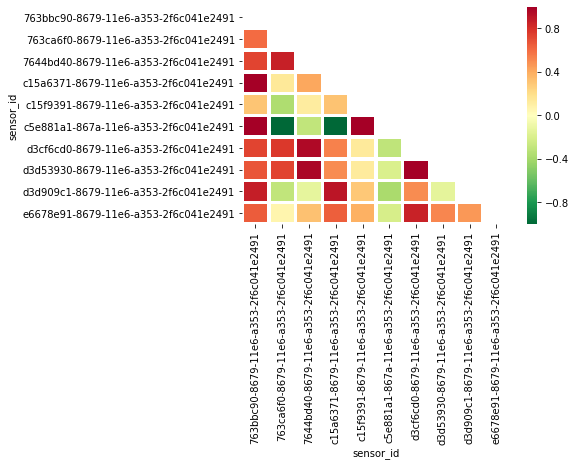

In [255]:
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [256]:
full2 = full.reset_index().drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')

In [257]:
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')
full_wide

sensor_id                  1248ff60-e707-11e6-89c8-314aa4f67f8c  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                 455.0   
2016-07-01 00:10:02+00:00                                 213.0   
2016-07-01 00:20:00+00:00                                 225.0   
2016-07-01 00:30:01+00:00                                 321.0   
2016-07-01 00:40:00+00:00                                 429.0   
...                                                         ...   
2016-10-06 07:08:04+00:00                                   NaN   
2016-10-06 07:12:12+00:00                                   NaN   
2016-10-06 07:20:18+00:00                                   NaN   
2016-10-06 07:25:56+00:00                                   NaN   
2016-10-06 07:32:51+00:00                                   NaN   

sensor_id                  7635c920-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                   NaN   
2016-07-01 00:10:02+00:00                                   NaN   
2016-07-01 00:20:00+00:00                                   NaN   
2016-07-01 00:30:01+00:00                                   NaN   
2016-07-01 00:40:00+00:00                                   NaN   
...                                                         ...   
2016-10-06 07:08:04+00:00                                   NaN   
2016-10-06 07:12:12+00:00                                   NaN   
2016-10-06 07:20:18+00:00                                   NaN   
2016-10-06 07:25:56+00:00                                   NaN   
2016-10-06 07:32:51+00:00                                   NaN   

sensor_id                  7635f030-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                   NaN   
2016-07-01 00:10:02+00:00                                   NaN   
2016-07-01 00:20:00+00:00                                   NaN   
2016-07-01 00:30:01+00:00                                   NaN   
2016-07-01 00:40:00+00:00                                   NaN   
...                                                         ...   
2016-10-06 07:08:04+00:00                                  64.0   
2016-10-06 07:12:12+00:00                                  65.0   
2016-10-06 07:20:18+00:00                                  66.0   
2016-10-06 07:25:56+00:00                                   NaN   
2016-10-06 07:32:51+00:00                                  65.0   

sensor_id                  7636da90-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                   NaN   
2016-07-01 00:10:02+00:00                                   NaN   
2016-07-01 00:20:00+00:00                                   NaN   
2016-07-01 00:30:01+00:00                                   NaN   
2016-07-01 00:40:00+00:00                                   NaN   
...                                                         ...   
2016-10-06 07:08:04+00:00                                   NaN   
2016-10-06 07:12:12+00:00                                   NaN   
2016-10-06 07:20:18+00:00                                   NaN   
2016-10-06 07:25:56+00:00                                   NaN   
2016-10-06 07:32:51+00:00                                   NaN   

sensor_id                  763701a0-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:31+00:00                                   NaN   
2016-07-01 00:10:02+00:00                                   NaN   
2016-07-01 00:20:00+00:00                                   NaN   
2016-07-01 00:30:01+00:00                                   NaN   
2016-07-01 00:40:00+00:00                                   NaN   
...                                        

In [258]:
daily_all_sensors = full_wide.resample('D').mean()

In [259]:
daily_all_sensors

sensor_id                  1248ff60-e707-11e6-89c8-314aa4f67f8c  \
timestamp                                                         
2016-07-01 00:00:00+00:00                            306.902098   
2016-07-02 00:00:00+00:00                            267.804196   
2016-07-03 00:00:00+00:00                            286.972028   
2016-07-04 00:00:00+00:00                            339.860140   
2016-07-05 00:00:00+00:00                            445.828571   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  7635c920-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  7635f030-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                             83.110236   
2016-10-03 00:00:00+00:00                             78.088710   
2016-10-04 00:00:00+00:00                             72.263014   
2016-10-05 00:00:00+00:00                             67.166197   
2016-10-06 00:00:00+00:00                             60.514286   

sensor_id                  7636da90-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  763701a0-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                        

**Trying to building a Linear Model**

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [260]:
df_nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

In [261]:
full.reset_index(inplace=True)

In [262]:
fullnode = pd.merge(full, df_nodes, on='node_id')
fullnode 

timestamp  value                             sensor_id  \
0      2016-08-03 04:39:25+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
1      2016-08-03 04:47:41+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2      2016-08-03 05:08:52+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
3      2016-08-03 05:14:08+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
4      2016-08-03 05:28:55+00:00   96.0  7635c920-8679-11e6-a353-2f6c041e2491   
...                          ...    ...                                   ...   
176529 2016-08-31 19:00:01+00:00  125.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176530 2016-08-31 19:50:00+00:00  143.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176531 2016-08-31 21:00:02+00:00  175.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176532 2016-08-31 21:50:00+00:00  164.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176533 2016-08-31 23:00:00+00:00   89.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   

                                     node_id     type     si_unit type_id  \
0       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT   
1       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT   
2       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT   
3       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT   
4       762b8ff0-8679-11e6-a353-2f6c041e2491  battery  percentage     BAT   
...                                      ...      ...         ...     ...   
176529  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM   
176530  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM   
176531  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM   
176532  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM   
176533  ede3ed60-e701-11e6-83c1-01ce06e6d17f     RSAM      counts    RSAM   

        name description location   status                       created_at  \
0        N10          \N       \N  OFFLINE        2016-08-03 04:39:25+00:00   
1        N10          \N       \N  OFFLINE        2016-08-03 04:39:25+00:00   
2        N10          \N       \N  OFFLINE        2016-08-03 04:39:25+00:00   
3        N10          \N       \N  OFFLINE        2016-08-03 04:39:25+00:00   
4        N10          \N       \N  OFFLINE        2016-08-03 04:39:25+00:00   
...      ...         ...      ...      ...                              ...   
176529  RSAM          \N       \N  OFFLINE 1970-01-17 23:35:31.231000+00:00   
176530  RSAM          \N       \N  OFFLINE 1970-01-17 23:35:31.231000+00:00   
176531  RSAM          \N       \N  OFFLINE 1970-01-17 23:35:31.231000+00:00   
176532  RSAM          \N       \N  OFFLINE 1970-01-17 23:35:31.231000+00:00   
176533  RSAM          \N       \N  OFFLINE 1970-01-17 23:35:31.231000+00:00   

                             updated_at                            volcano_id  
0      2016-09-29 19:20:17.431000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
1      2016-09-29 19:20:17.431000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
2      2016-09-29 19:20:17.431000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
3      2016-09-29 19:20:17.431000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
4      2016-09-29 19:20:17.431000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
...                                 ...                                   ...  
176529 2017-01-30 16:24:05.867000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
176530 2017-01-30 16:24:05.867000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
176531 2017-01-30 16:24:05.867000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
176532 2017-01-30 16:24:05.867000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  
176533 2017-01-30 16:24:05.867000+00:00  35dc3e90-8679-11e6-bda3-ef77801087ee  

[176534 rows x 14 columns]

In [263]:
fullnode = fullnode.drop(['created_at', 'updated_at','description', 'location','status','node_id'], axis=1)
fullnode

timestamp  value                             sensor_id  \
0      2016-08-03 04:39:25+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
1      2016-08-03 04:47:41+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
2      2016-08-03 05:08:52+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
3      2016-08-03 05:14:08+00:00   98.0  7635c920-8679-11e6-a353-2f6c041e2491   
4      2016-08-03 05:28:55+00:00   96.0  7635c920-8679-11e6-a353-2f6c041e2491   
...                          ...    ...                                   ...   
176529 2016-08-31 19:00:01+00:00  125.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176530 2016-08-31 19:50:00+00:00  143.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176531 2016-08-31 21:00:02+00:00  175.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176532 2016-08-31 21:50:00+00:00  164.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176533 2016-08-31 23:00:00+00:00   89.0  1248ff60-e707-11e6-89c8-314aa4f67f8c   

           type     si_unit type_id  name  \
0       battery  percentage     BAT   N10   
1       battery  percentage     BAT   N10   
2       battery  percentage     BAT   N10   
3       battery  percentage     BAT   N10   
4       battery  percentage     BAT   N10   
...         ...         ...     ...   ...   
176529     RSAM      counts    RSAM  RSAM   
176530     RSAM      counts    RSAM  RSAM   
176531     RSAM      counts    RSAM  RSAM   
176532     RSAM      counts    RSAM  RSAM   
176533     RSAM      counts    RSAM  RSAM   

                                  volcano_id  
0       35dc3e90-8679-11e6-bda3-ef77801087ee  
1       35dc3e90-8679-11e6-bda3-ef77801087ee  
2       35dc3e90-8679-11e6-bda3-ef77801087ee  
3       35dc3e90-8679-11e6-bda3-ef77801087ee  
4       35dc3e90-8679-11e6-bda3-ef77801087ee  
...                                      ...  
176529  35dc3e90-8679-11e6-bda3-ef77801087ee  
176530  35dc3e90-8679-11e6-bda3-ef77801087ee  
176531  35dc3e90-8679-11e6-bda3-ef77801087ee  
176532  35dc3e90-8679-11e6-bda3-ef77801087ee  
176533  35dc3e90-8679-11e6-bda3-ef77801087ee  

[176534 rows x 8 columns]

In [264]:
fullnode.columns, fullnode.index

(Index(['timestamp', 'value', 'sensor_id', 'type', 'si_unit', 'type_id', 'name',
        'volcano_id'],
       dtype='object'),
 Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             176524, 176525, 176526, 176527, 176528, 176529, 176530, 176531,
             176532, 176533],
            dtype='int64', length=176534))

In [265]:
fullnode.set_index('timestamp', inplace=True)

In [266]:
fullnode.resample('D').mean()

value
timestamp                            
2016-07-01 00:00:00+00:00  306.902098
2016-07-02 00:00:00+00:00  267.804196
2016-07-03 00:00:00+00:00  286.972028
2016-07-04 00:00:00+00:00  339.860140
2016-07-05 00:00:00+00:00  445.828571
...                               ...
2016-10-02 00:00:00+00:00   84.783231
2016-10-03 00:00:00+00:00   79.059548
2016-10-04 00:00:00+00:00   77.155172
2016-10-05 00:00:00+00:00   73.356674
2016-10-06 00:00:00+00:00   68.235294

[98 rows x 1 columns]

In [267]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')


In [268]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [269]:
fn_wide.head()

type                       name   RSAM  battery  carbon dioxide concentration  \
timestamp                                                                       
2016-07-01 00:00:31+00:00  RSAM  455.0      NaN                           NaN   
2016-07-01 00:10:02+00:00  RSAM  213.0      NaN                           NaN   
2016-07-01 00:20:00+00:00  RSAM  225.0      NaN                           NaN   
2016-07-01 00:30:01+00:00  RSAM  321.0      NaN                           NaN   
2016-07-01 00:40:00+00:00  RSAM  429.0      NaN                           NaN   

type                       humidity  hydrogen sulfide concentration  pressure  \
timestamp                                                                       
2016-07-01 00:00:31+00:00       NaN                             NaN       NaN   
2016-07-01 00:10:02+00:00       NaN                             NaN       NaN   
2016-07-01 00:20:00+00:00       NaN                             NaN       NaN   
2016-07-01 00:30:01+00:00       NaN                             NaN       NaN   
2016-07-01 00:40:00+00:00       NaN                             NaN       NaN   

type                       temperature  
timestamp                               
2016-07-01 00:00:31+00:00          NaN  
2016-07-01 00:10:02+00:00          NaN  
2016-07-01 00:20:00+00:00          NaN  
2016-07-01 00:30:01+00:00          NaN  
2016-07-01 00:40:00+00:00          NaN

Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [270]:
lmfn = fn_wide.resample('D').mean()

In [271]:
lmfn.fillna(lmfn.mean(), inplace=True)

In [272]:
lmfn

type                             RSAM    battery  \
timestamp                                          
2016-07-01 00:00:00+00:00  306.902098  75.430055   
2016-07-02 00:00:00+00:00  267.804196  75.430055   
2016-07-03 00:00:00+00:00  286.972028  75.430055   
2016-07-04 00:00:00+00:00  339.860140  75.430055   
2016-07-05 00:00:00+00:00  445.828571  75.430055   
...                               ...        ...   
2016-10-02 00:00:00+00:00  261.939330  84.808642   
2016-10-03 00:00:00+00:00  261.939330  79.055556   
2016-10-04 00:00:00+00:00  261.939330  77.174946   
2016-10-05 00:00:00+00:00  261.939330  73.323789   
2016-10-06 00:00:00+00:00  261.939330  68.311111   

type                       carbon dioxide concentration   humidity  \
timestamp                                                            
2016-07-01 00:00:00+00:00                     346.82341  58.820877   
2016-07-02 00:00:00+00:00                     346.82341  58.820877   
2016-07-03 00:00:00+00:00                     346.82341  58.820877   
2016-07-04 00:00:00+00:00                     346.82341  58.820877   
2016-07-05 00:00:00+00:00                     346.82341  58.820877   
...                                                 ...        ...   
2016-10-02 00:00:00+00:00                     346.82341  58.820877   
2016-10-03 00:00:00+00:00                     346.82341  58.820877   
2016-10-04 00:00:00+00:00                     346.82341  58.820877   
2016-10-05 00:00:00+00:00                     346.82341  58.820877   
2016-10-06 00:00:00+00:00                     346.82341  58.820877   

type                       hydrogen sulfide concentration      pressure  \
timestamp                                                                 
2016-07-01 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-02 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-03 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-04 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-05 00:00:00+00:00                       29.616125  1.255737e+06   
...                                                   ...           ...   
2016-10-02 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-03 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-04 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-05 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-06 00:00:00+00:00                       29.616125  1.255737e+06   

type                       temperature  
timestamp                               
2016-07-01 00:00:00+00:00   -48.848781  
2016-07-02 00:00:00+00:00   -48.848781  
2016-07-03 00:00:00+00:00   -48.848781  
2016-07-04 00:00:00+00:00   -48.848781  
2016-07-05 00:00:00+00:00   -48.848781  
...                                ...  
2016-10-02 00:00:00+00:00   -48.848781  
2016-10-03 00:00:00+00:00   -48.848781  
2016-10-04 00:00:00+00:00   -48.848781  
2016-10-05 00:00:00+00:00   -48.848781  
2016-10-06 00:00:00+00:00   -48.848781  

[98 rows x 7 columns]

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [323]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn.linear_model          import SGDRegressor
from xgboost                       import XGBRegressor,plot_importance
from sklearn.model_selection       import train_test_split
from sklearn.metrics               import f1_score,log_loss
from sklearn.preprocessing         import StandardScaler
from sklearn                       import linear_model
from sklearn.model_selection       import cross_val_score

In [324]:
train.columns

Index(['RSAM', 'battery', 'carbon dioxide concentration', 'humidity',
       'hydrogen sulfide concentration', 'pressure', 'temperature'],
      dtype='object', name='type')

In [332]:
X = lmfn.drop(['battery'], axis = 1) # X are the input (or independent) variables
y = lmfn['battery'].values # Y is output (or dependent) variable

#Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
y_test

array([75.43005484, 75.43005484, 75.43005484, 75.43005484, 47.20572917,
       75.43005484, 75.43005484, 75.43005484, 95.99299065, 75.43005484,
       54.92278954, 75.43005484, 68.31111111, 75.43005484, 75.43005484,
       75.43005484, 75.43005484, 55.10011507, 38.74251969, 75.43005484,
       75.43005484, 75.43005484, 75.43005484, 75.43005484, 75.43005484,
       75.43005484, 79.05555556, 73.32378855, 75.43005484, 39.82105263])

In [333]:
# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [335]:
pred = regr.predict(X_test)
print("Score:", regr.score(X_test, y_test))

Score: 0.41070857269057914


In [341]:
#Scale X varibles
scaler = StandardScaler() 
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

y_scaler = StandardScaler()
y_train_scaler = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaler = y_scaler.fit_transform(y_test.reshape(-1, 1))

In [342]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
KR = make_pipeline(RobustScaler(), KernelRidge(
         alpha= 0.9826,
         kernel= 'polynomial',
         degree= 3,
         coef0= 3.5
        ))      
KR.fit(X_train_scaler,y_train_scaler)                                   # Fit the model 

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('kernelridge',
                 KernelRidge(alpha=0.9826, coef0=3.5, degree=3, gamma=None,
                             kernel='polynomial', kernel_params=None))],
         verbose=False)

In [344]:
pred = KR.predict(X_test_scaler) # To computer the predicted model on test data
scaler_pred= y_scaler.inverse_transform(pred.flatten())
scaler_pred2 = [np.round(val, 2) for val in scaler_pred]
scaler_pred2

[109.26,
 101.81,
 96.95,
 109.68,
 -171.1,
 96.93,
 98.55,
 98.11,
 46.73,
 98.88,
 98.55,
 98.55,
 98.55,
 104.07,
 108.23,
 98.74,
 97.03,
 -151.7,
 45.54,
 97.99,
 98.55,
 113.06,
 105.6,
 97.43,
 98.55,
 96.93,
 98.55,
 98.55,
 98.55,
 98.55]

In [346]:
scale_y_test= y_scaler.inverse_transform(y_test_scaler.flatten())

In [349]:
# Let us have a lot at the score:
pred_score = KR.score(X_test_scaler,y_test)  # Find out the score
print("Score: ", pred_score)

# print the rmse
rmse1 = np.sqrt(((scaler_pred - scale_y_test)**2).mean())
print("RMSE: %.5f" % rmse1)

Score:  -35.264217778656
RMSE: 61.79122
